In [42]:
import random
import numpy as np
import pandas as pd
import warnings as wr
from collections import Counter
from itertools import combinations

import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score,recall_score, f1_score, roc_auc_score, confusion_matrix,ConfusionMatrixDisplay, roc_curve, precision_recall_curve, auc

# <span style="color:blue">ΕΙΣΑΓΩΓΗ ΚΑΙ ΕΠΕΞΕΡΓΑΣΙΑ ΤΟΥ ΑΡΧΕΙΟΥ


In [43]:
# Αναγνώριση του αρχείου και εισαγωγή του στο πρόγραμμα
df = pd.read_csv('data/student-por.csv')

df.head() 

type(df)

print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


# <span style="color:blue">ΣΥΝΟΠΤΙΚΗ ΠΑΡΟΥΣΙΑΣΗ ΤΩΝ ΔΕΔΟΜΕΝΩΝ


In [44]:
len(df)

649

In [45]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [46]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [47]:
df.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.051093    1.175766    0.924834    1.284380    1.446259   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    2.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  649.000000  649.000000  649.000000  649.000000  
mean     3.659476   11.399076   11.570108   11.906009  
std      4.640759    2.745265    2.913639    3.230656  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000   10.000000   10.000000   10.000000  
50%      2.000000   11.000000   11.000000   12.000000  
75%      6.000000   13.000000   13.000000   14.000000  
max     32.000000   19.000000   19.000000   19.000000

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [49]:
print(df.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [50]:
df['sex'].replace({'M': 0, 'F': 1}, inplace=True)
df['school'].replace({'GP': 0, 'MS': 1}, inplace=True)
df['address'].replace({'U': 0, 'R': 1}, inplace=True)
df['famsize'].replace({'LE3': 0, 'GT3': 1}, inplace=True)
df['Pstatus'].replace({'T': 0, 'A': 1}, inplace=True)
df['Mjob'].replace({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4}, inplace=True)
df['Fjob'].replace({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4}, inplace=True)
df['reason'].replace({'course': 0, 'reputation': 1, 'home': 2, 'other': 3}, inplace=True)
df['guardian'].replace({'mother': 0, 'father': 1, 'other': 2}, inplace=True)
df['schoolsup'].replace({'yes': 1, 'no': 0}, inplace=True)
df['famsup'].replace({'yes': 1, 'no': 0}, inplace=True)
df['paid'].replace({'yes': 1, 'no': 0}, inplace=True)
df['activities'].replace({'yes': 1, 'no': 0}, inplace=True)
df['nursery'].replace({'yes': 1, 'no': 0}, inplace=True)
df['higher'].replace({'yes': 1, 'no': 0}, inplace=True)
df['internet'].replace({'yes': 1, 'no': 0}, inplace=True)
df['romantic'].replace({'yes': 1, 'no': 0}, inplace=True)

In [51]:
df['G3'] = df['G3'].apply(lambda x: 1 if x > 10 else 0)

In [52]:
print(df.dtypes)

school        int64
sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object


# <span style="color:blue">ΣΥΝΟΠΤΙΚΗ ΠΑΡΟΥΣΙΑΣΗ ΤΩΝ ΔΕΔΟΜΕΝΩΝ


In [53]:
len(df)

649

In [54]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [55]:
df.describe()

school         sex         age     address     famsize     Pstatus  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     0.348228    0.590139   16.744222    0.303544    0.704160    0.123267   
std      0.476776    0.492187    1.218138    0.460143    0.456771    0.328996   
min      0.000000    0.000000   15.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   16.000000    0.000000    0.000000    0.000000   
50%      0.000000    1.000000   17.000000    0.000000    1.000000    0.000000   
75%      1.000000    1.000000   18.000000    1.000000    1.000000    0.000000   
max      1.000000    1.000000   22.000000    1.000000    1.000000    1.000000   

             Medu        Fedu        Mjob        Fjob  ...      famrel  \
count  649.000000  649.000000  649.000000  649.000000  ...  649.000000   
mean     2.514638    2.306626    2.707242    3.049307  ...    3.930663   
std      1.134552    1.099931    1.348511    1.218696  ...    0.955717   
min      0.000000    0.000000    0.000000    0.000000  ...    1.000000   
25%      2.000000    1.000000    2.000000    2.000000  ...    4.000000   
50%      2.000000    2.000000    3.000000    4.000000  ...    4.000000   
75%      4.000000    3.000000    4.000000    4.000000  ...    5.000000   
max      4.000000    4.000000    4.000000    4.000000  ...    5.000000   

         freetime       goout        Dalc        Walc      health    absences  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.180277    3.184900    1.502311    2.280431    3.536210    3.659476   
std      1.051093    1.175766    0.924834    1.284380    1.446259    4.640759   
min      1.000000    1.000000    1.000000    1.000000    1.000000    0.000000   
25%      3.000000    2.000000    1.000000    1.000000    2.000000    0.000000   
50%      3.000000    3.000000    1.000000    2.000000    4.000000    2.000000   
75%      4.000000    4.000000    2.000000    3.000000    5.000000    6.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000   32.000000   

               G1          G2          G3  
count  649.000000  649.000000  649.000000  
mean    11.399076   11.570108    0.696456  
std      2.745265    2.913639    0.460143  
min      0.000000    0.000000    0.000000  
25%     10.000000   10.000000    0.000000  
50%     11.000000   11.000000    1.000000  
75%     13.000000   13.000000    1.000000  
max     19.000000   19.000000    1.000000  

[8 rows x 33 columns]

In [56]:
df.groupby("G3", observed=True).describe().T

G3                     0           1
school count  197.000000  452.000000
       mean     0.568528    0.252212
       std      0.496544    0.434764
       min      0.000000    0.000000
       25%      0.000000    0.000000
...                  ...         ...
G2     min      0.000000    9.000000
       25%      8.000000   11.000000
       50%      9.000000   13.000000
       75%     10.000000   14.000000
       max     13.000000   19.000000

[256 rows x 2 columns]

# <span style="color:BLUE">ΔΗΜΙΟΥΡΓΙΑ ΙΔΙΟΥ ΣΤΥΛ ΚΑΙ ΜΕΓΕΘΟΥΣ ΓΡΑΦΙΚΩΝ

In [57]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [58]:
style.use('fivethirtyeight')  

plt.rcParams['figure.figsize'] = (16, 10)

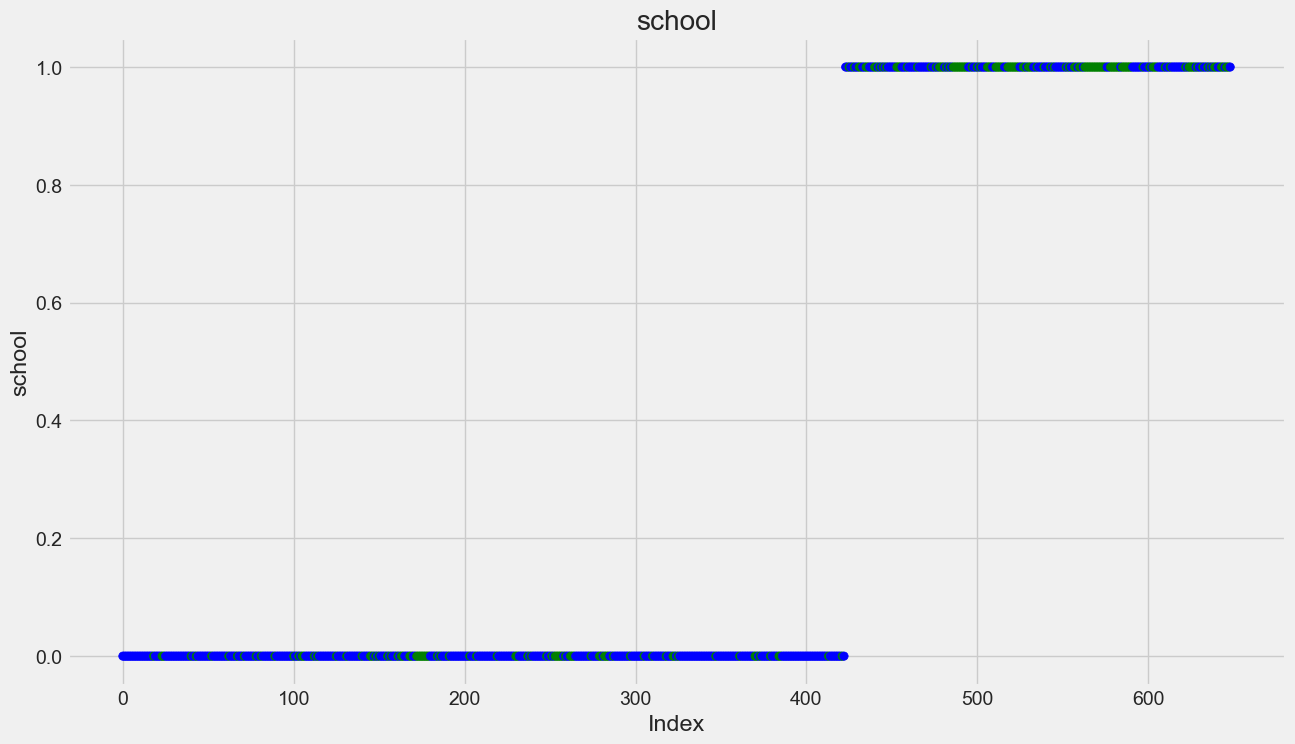

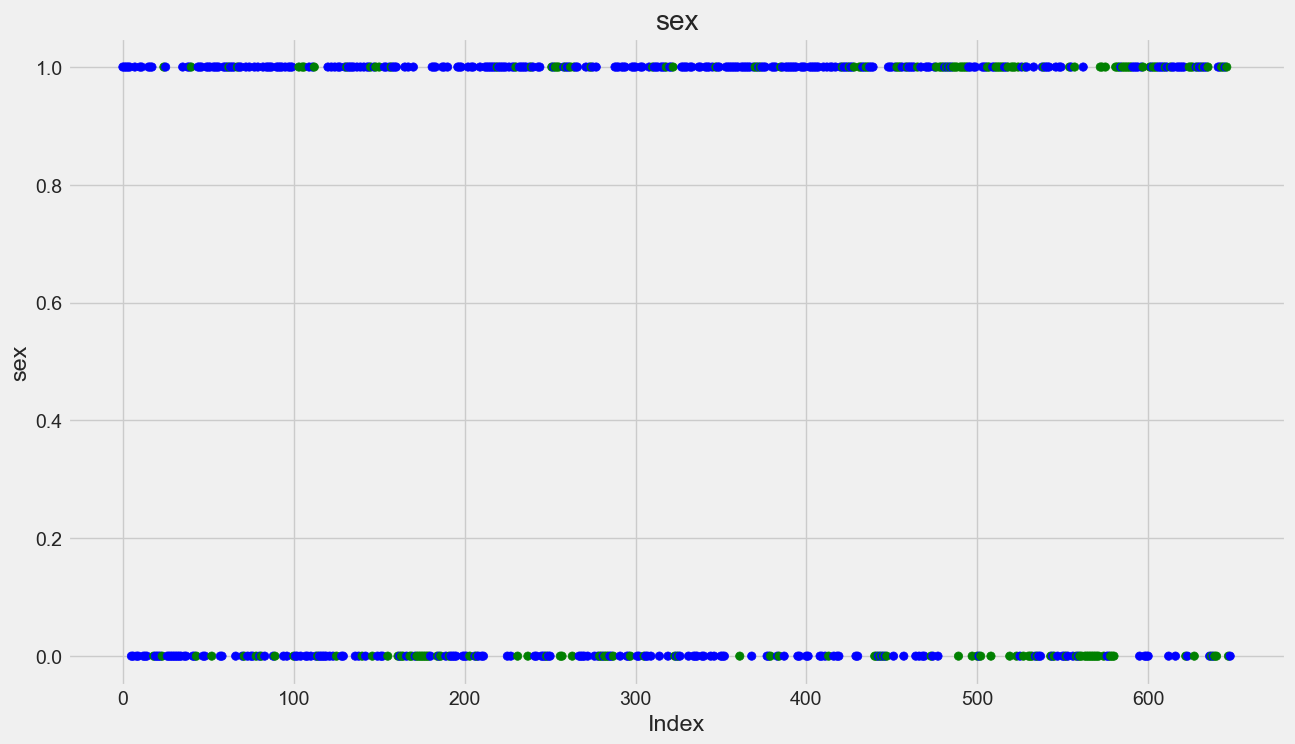

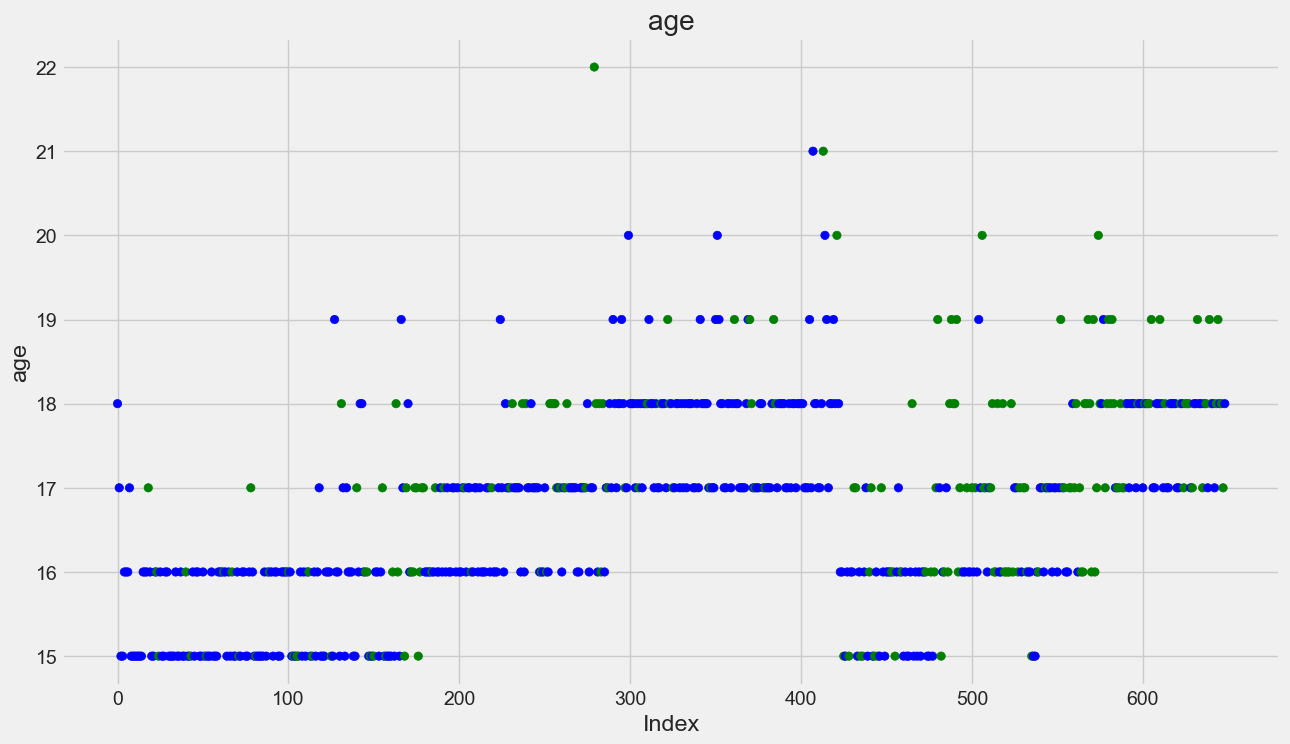

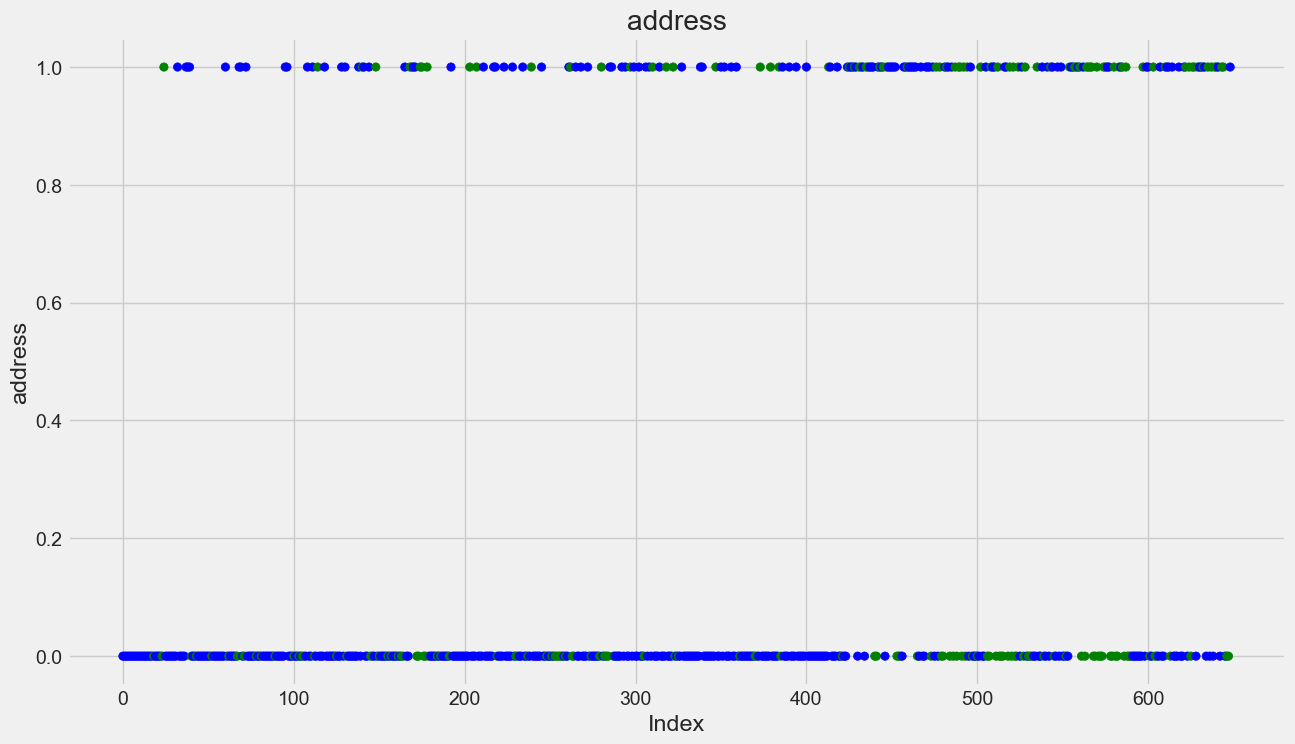

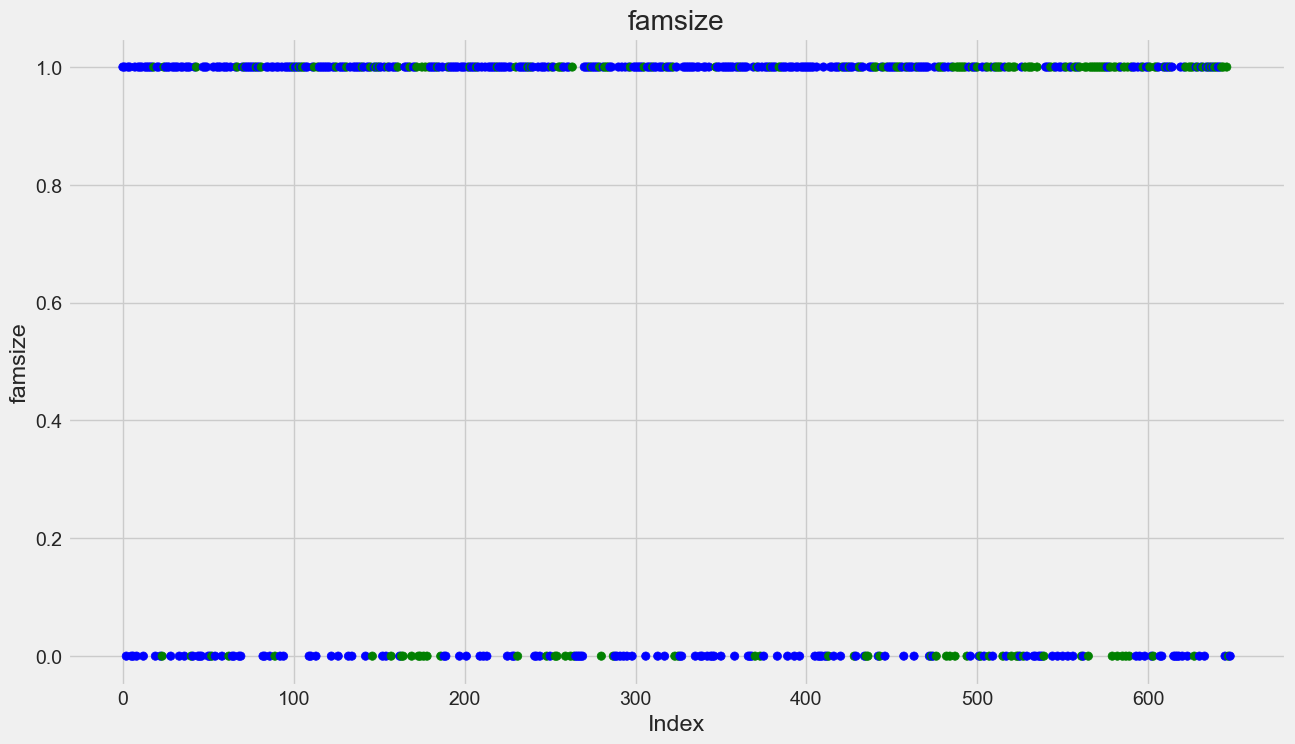

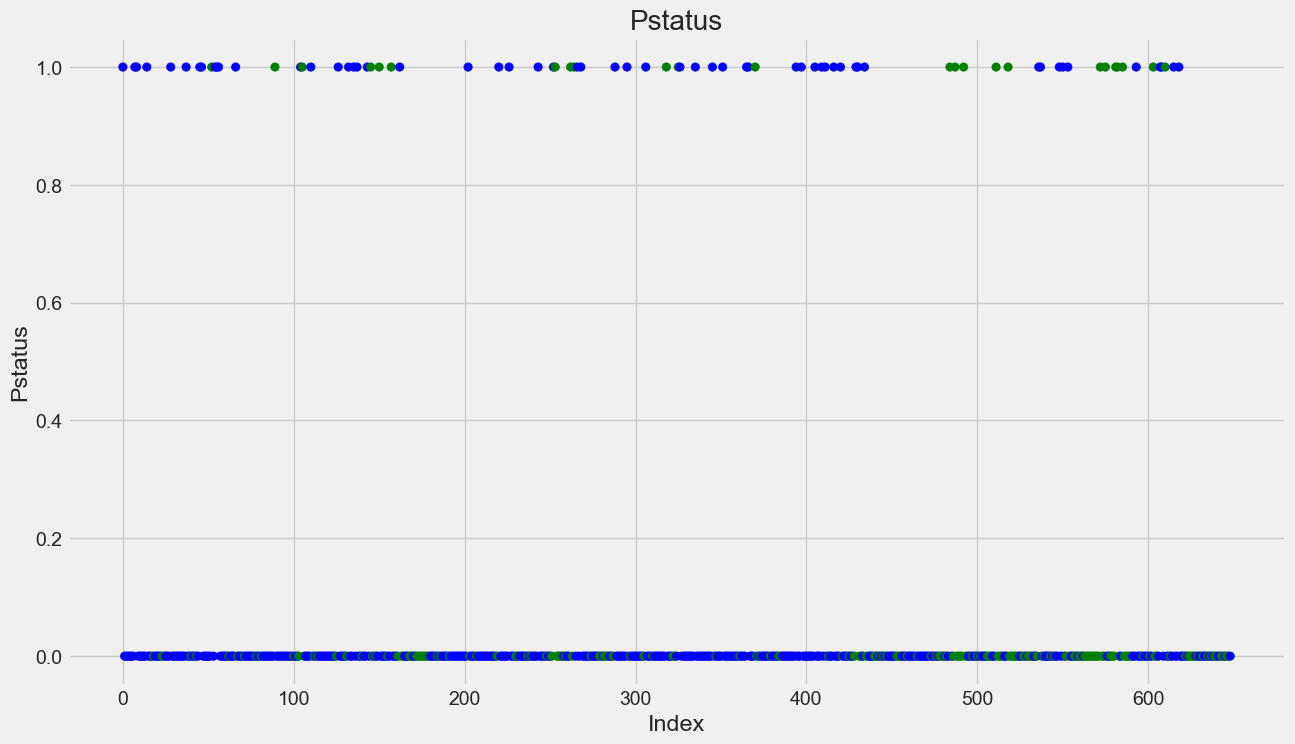

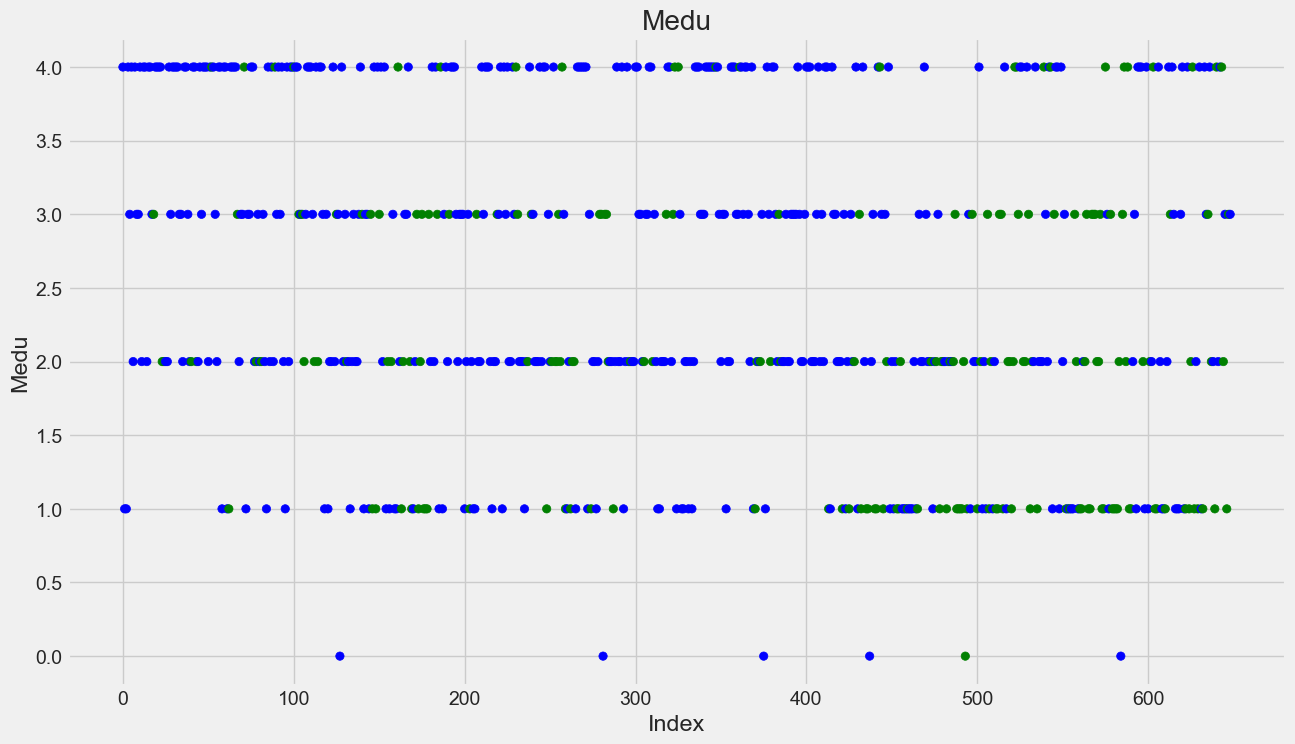

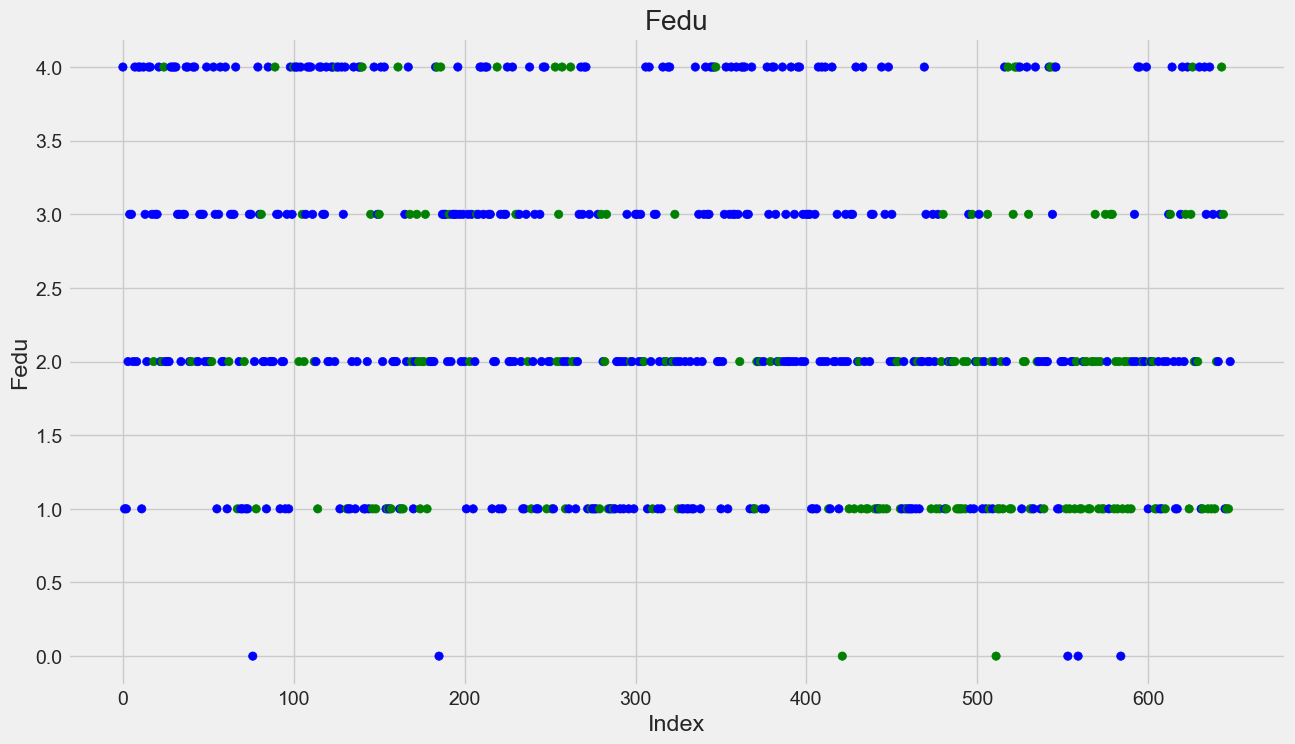

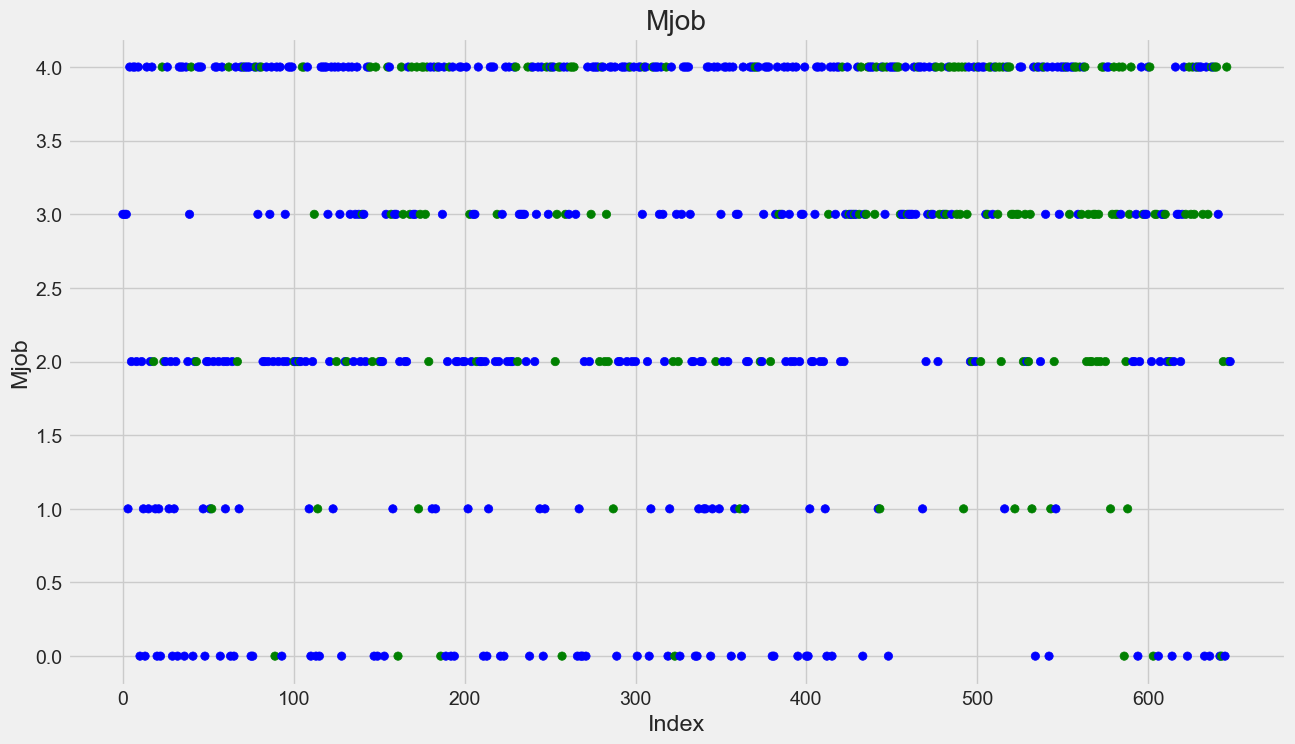

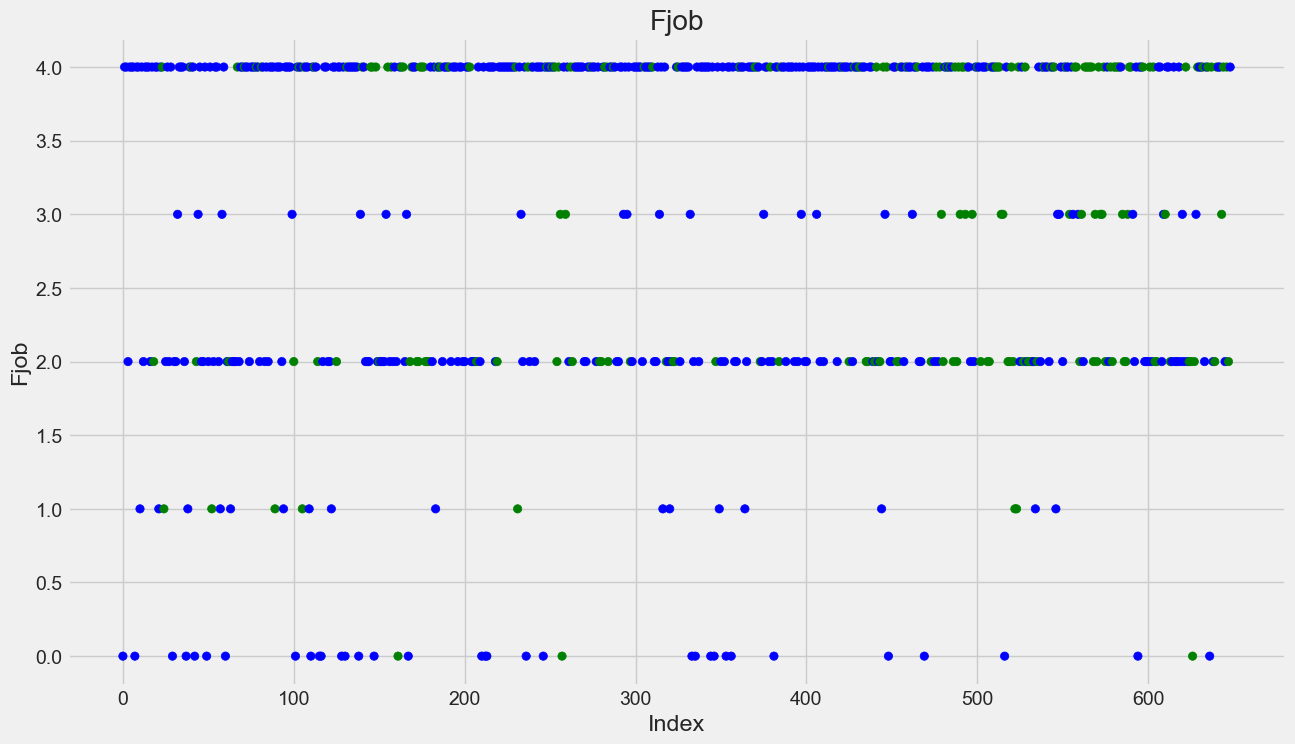

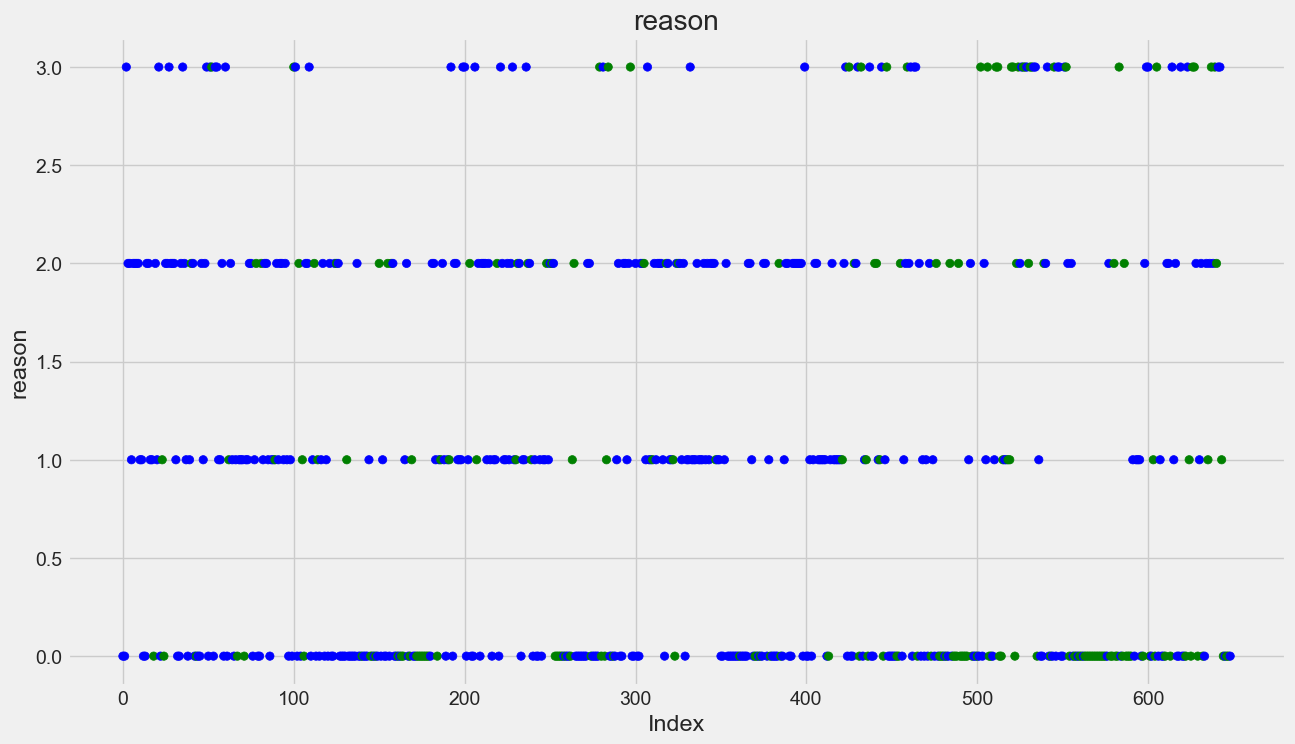

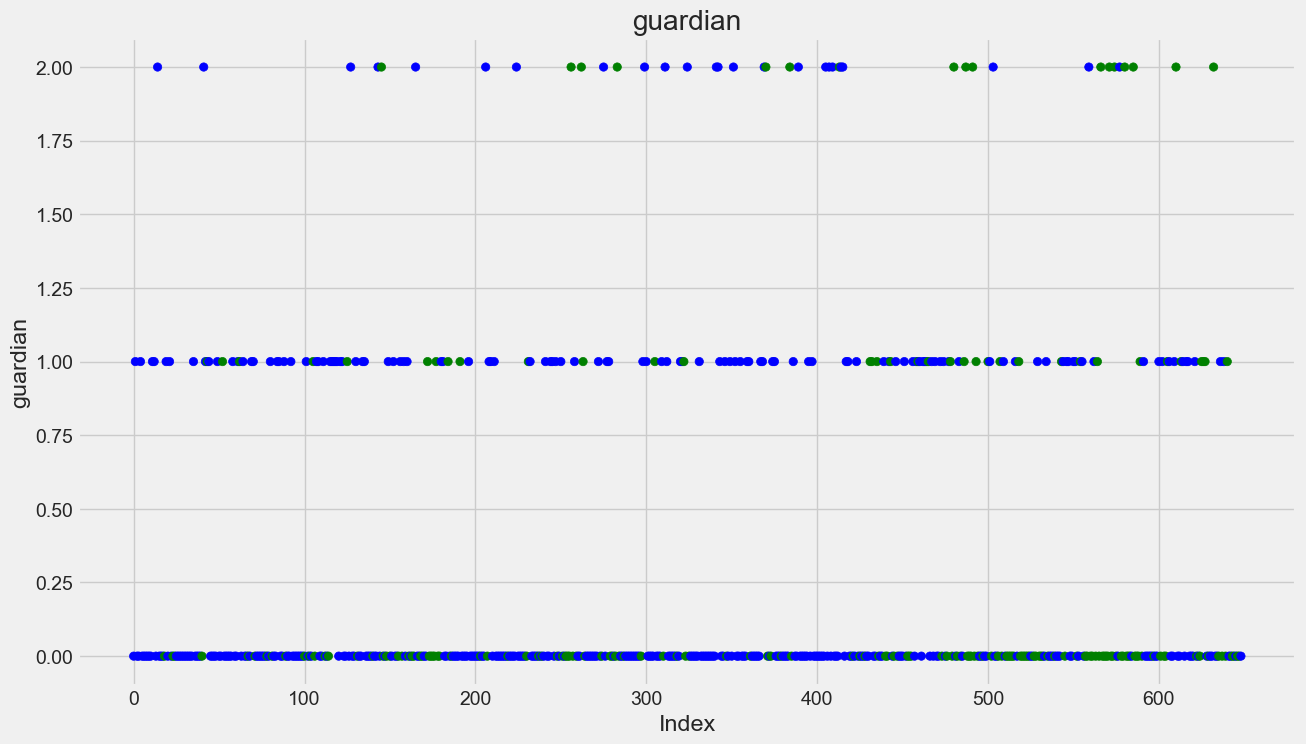

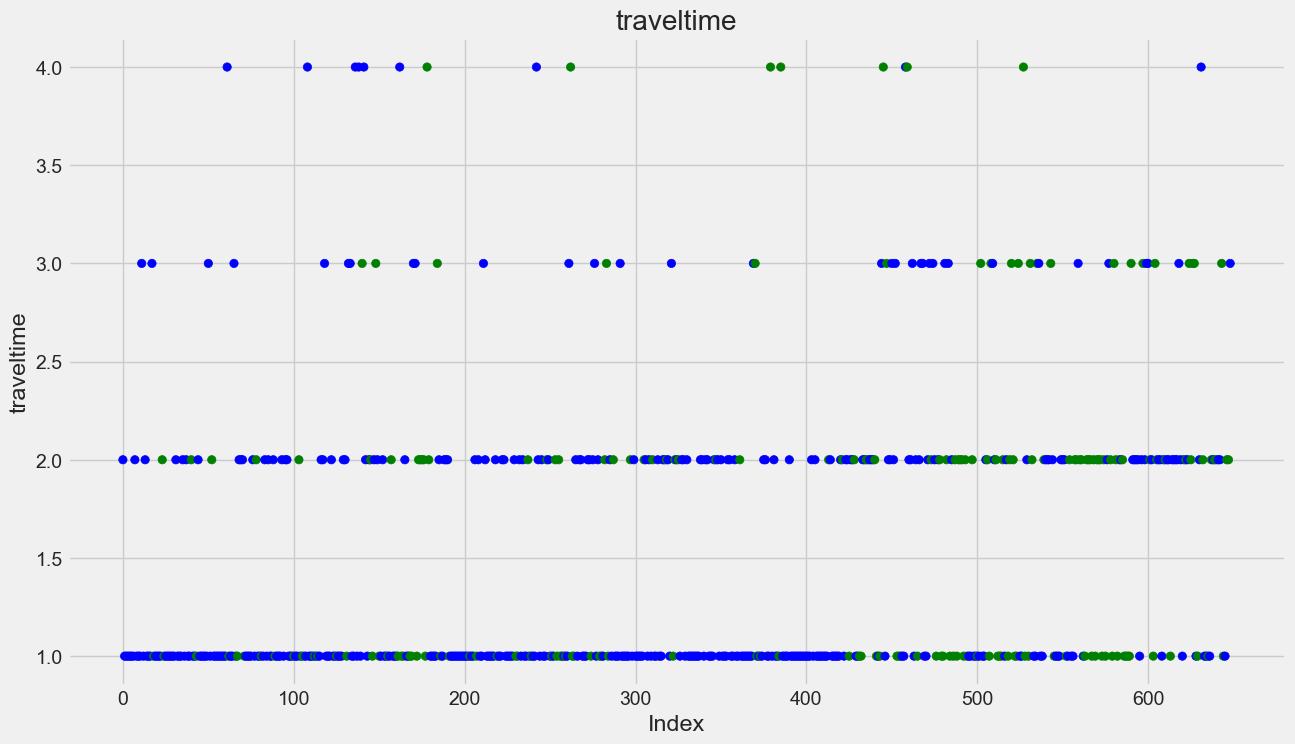

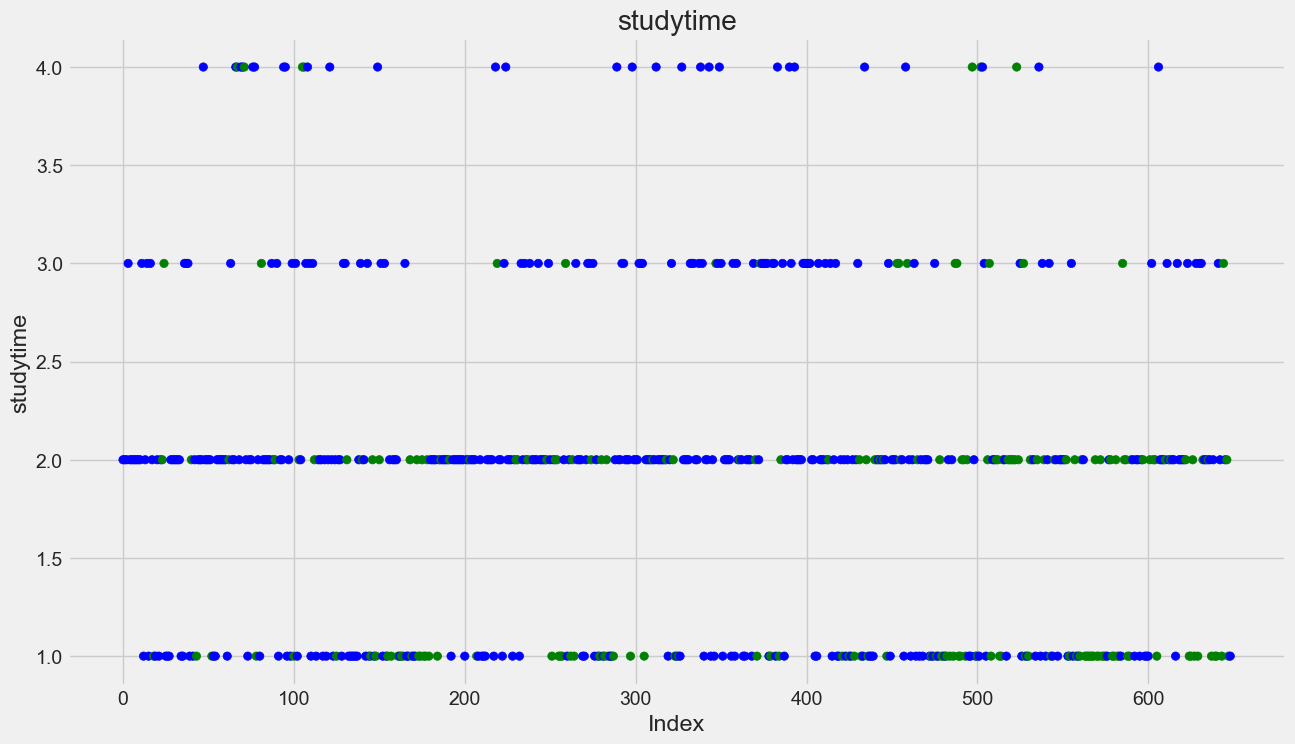

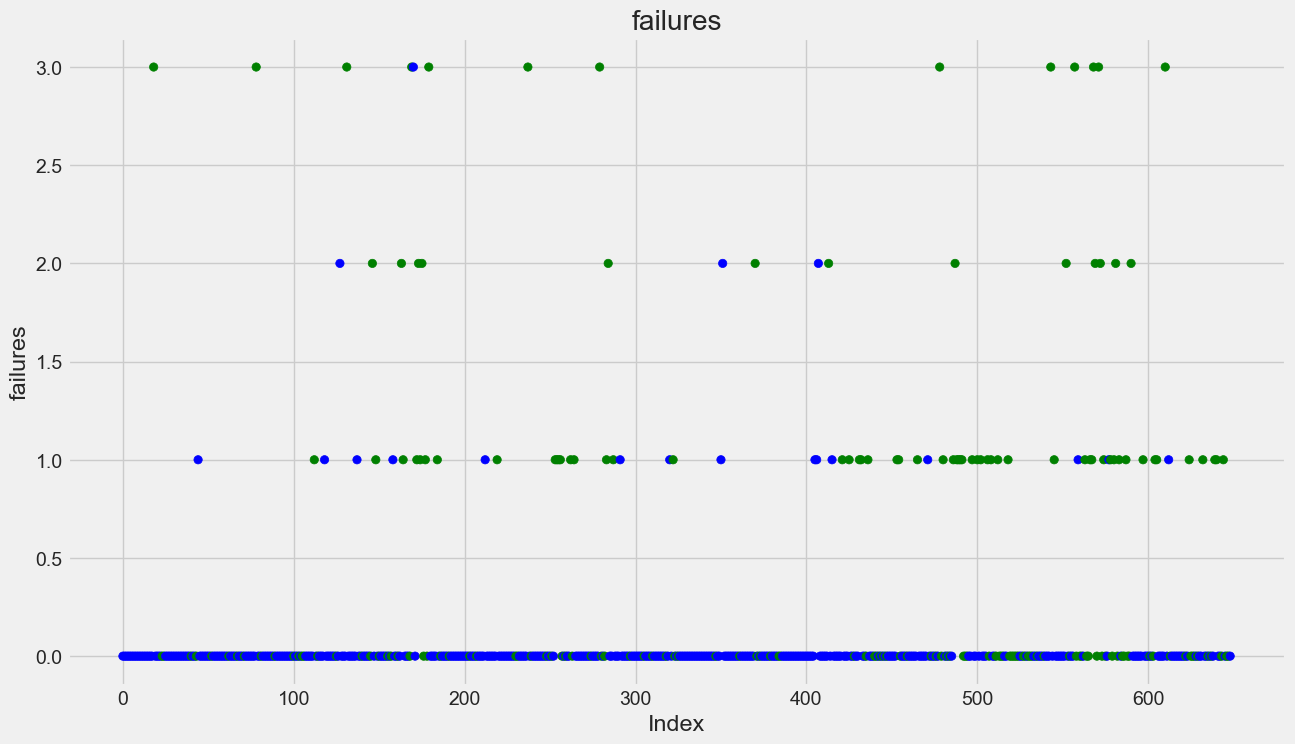

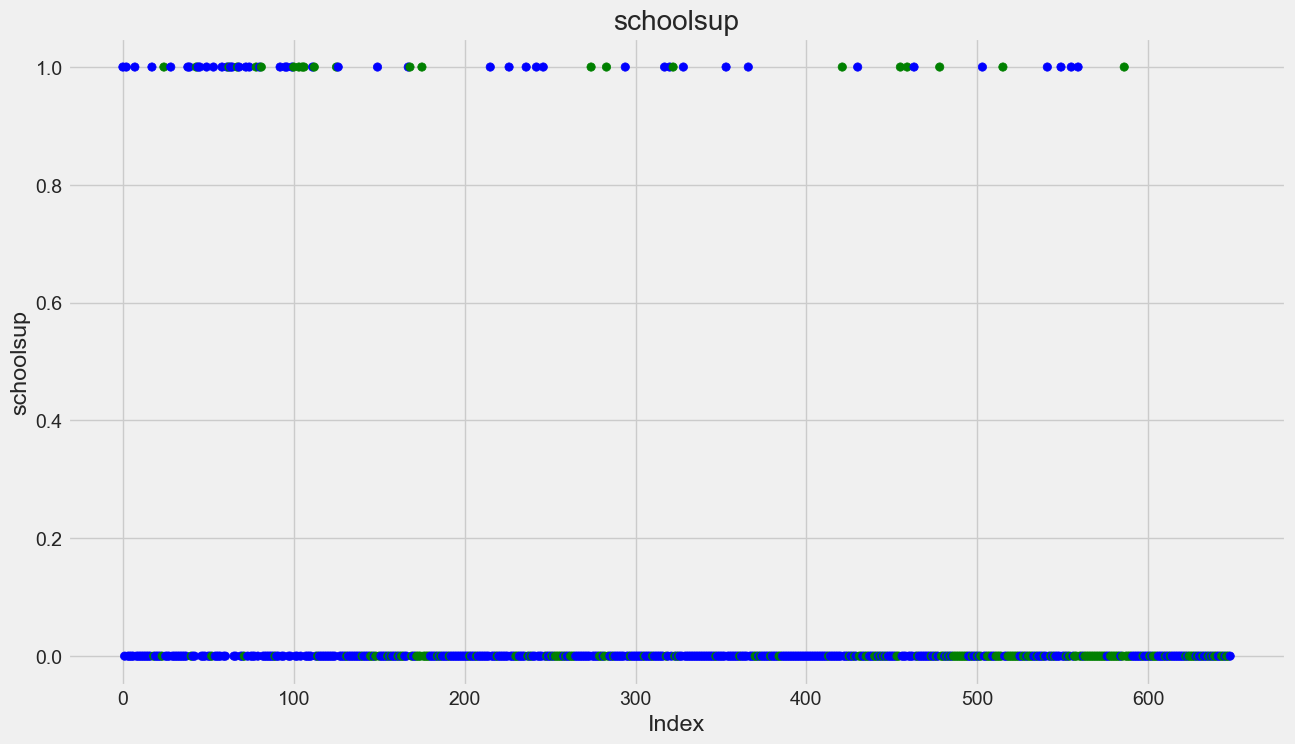

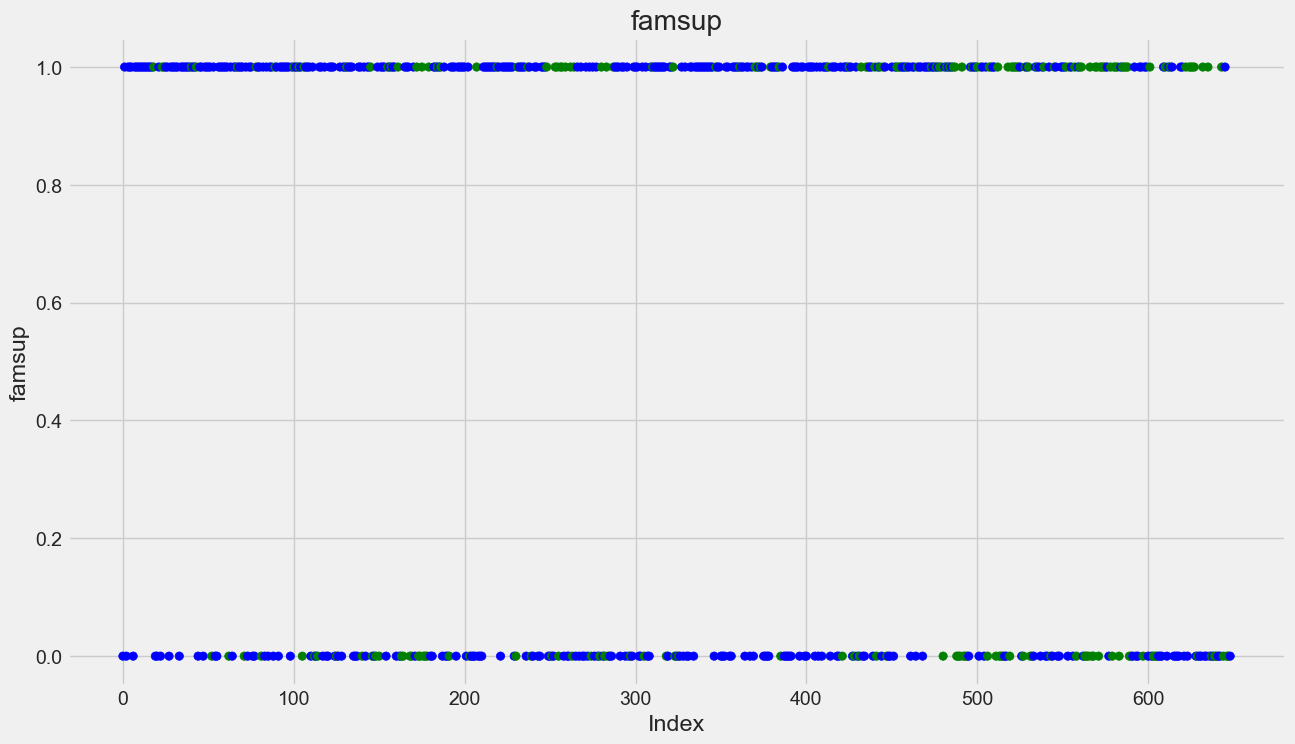

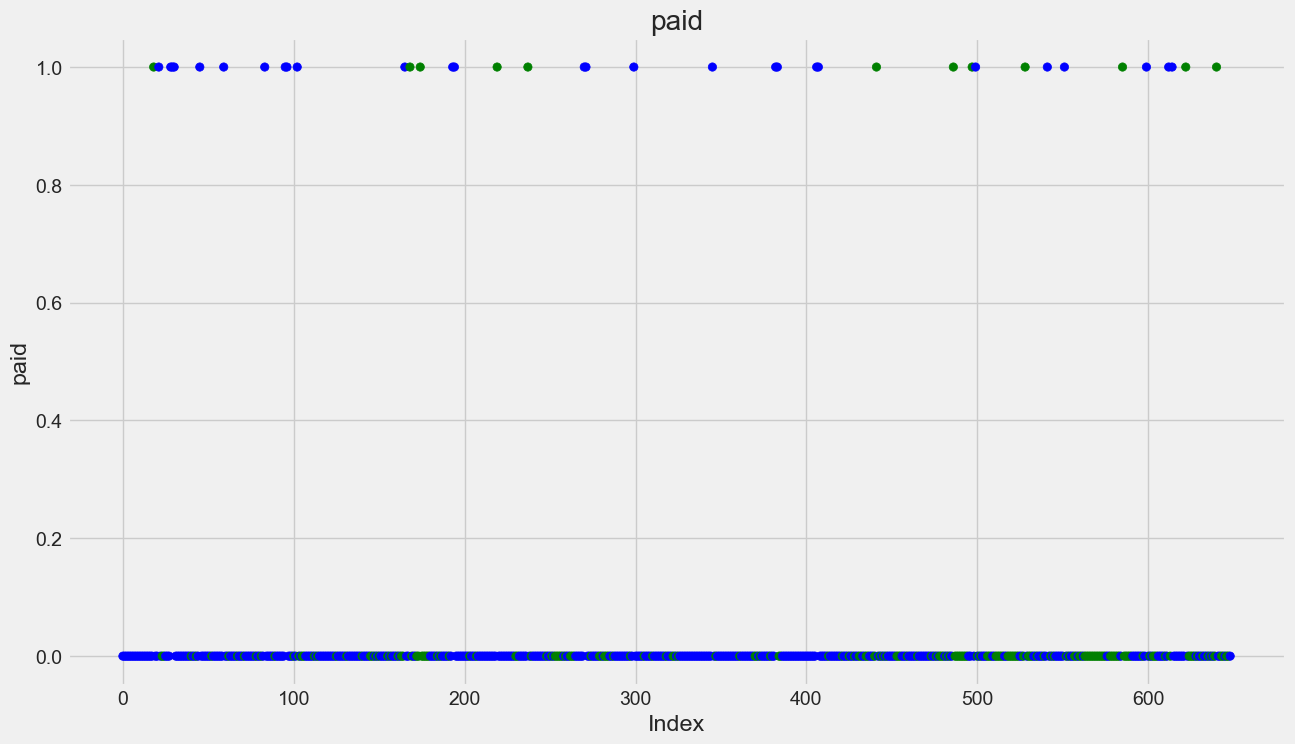

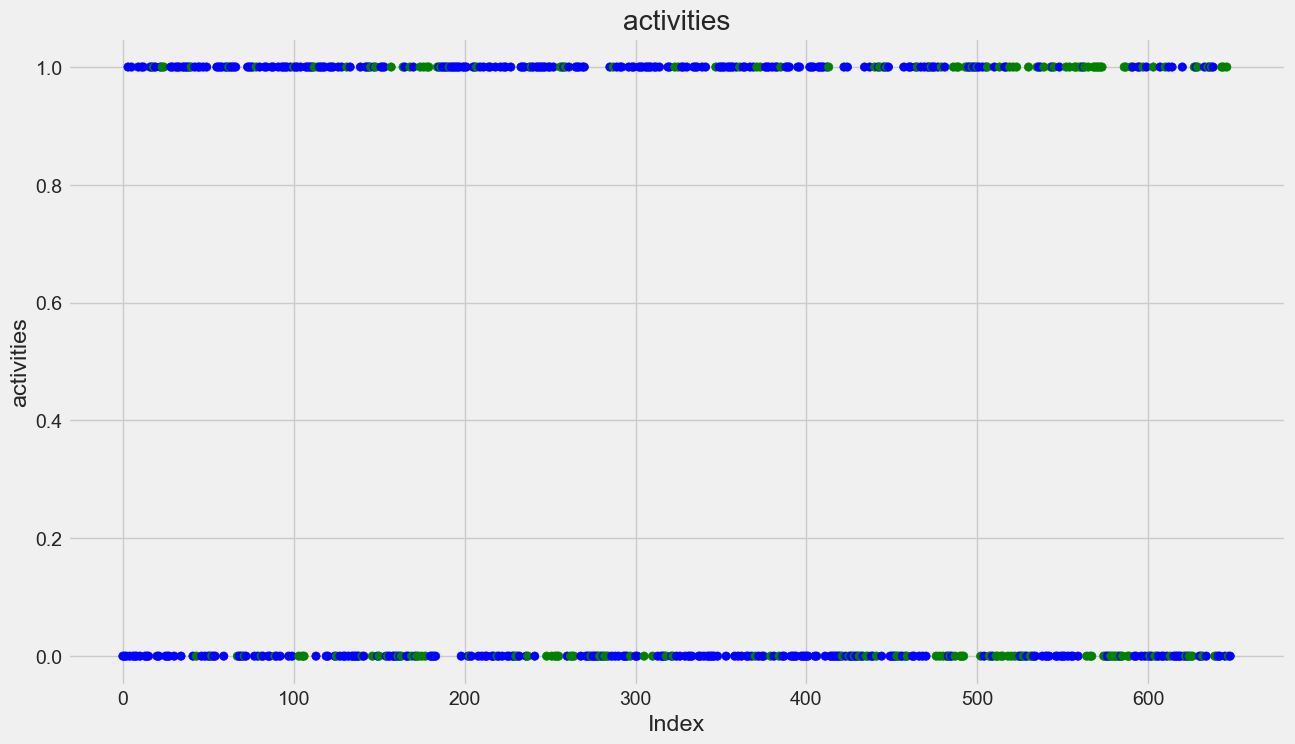

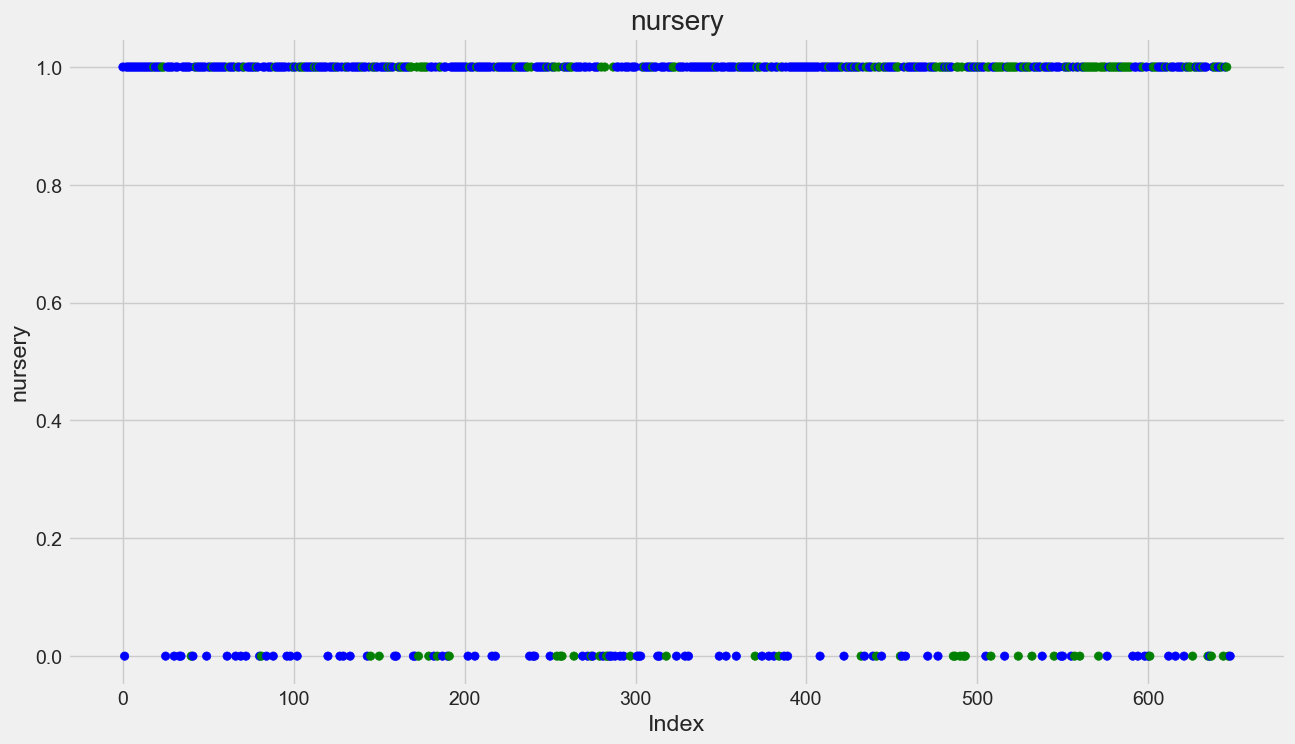

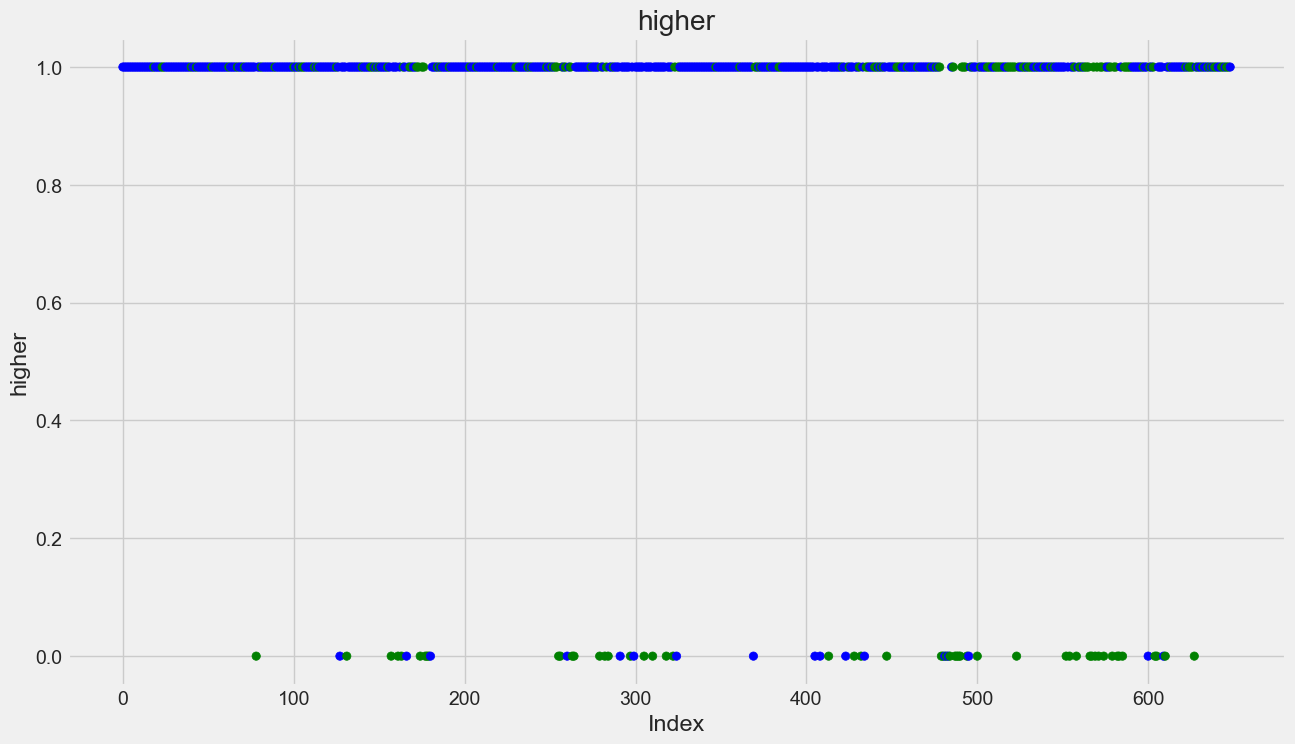

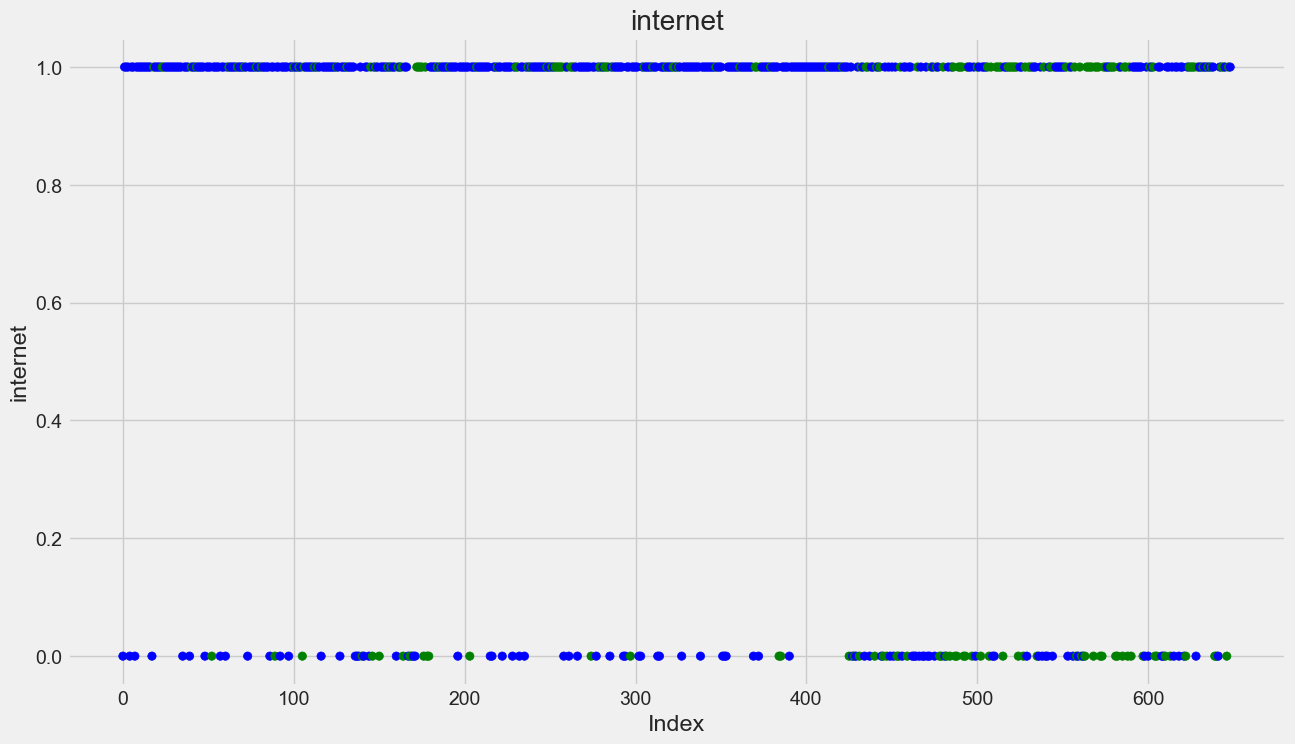

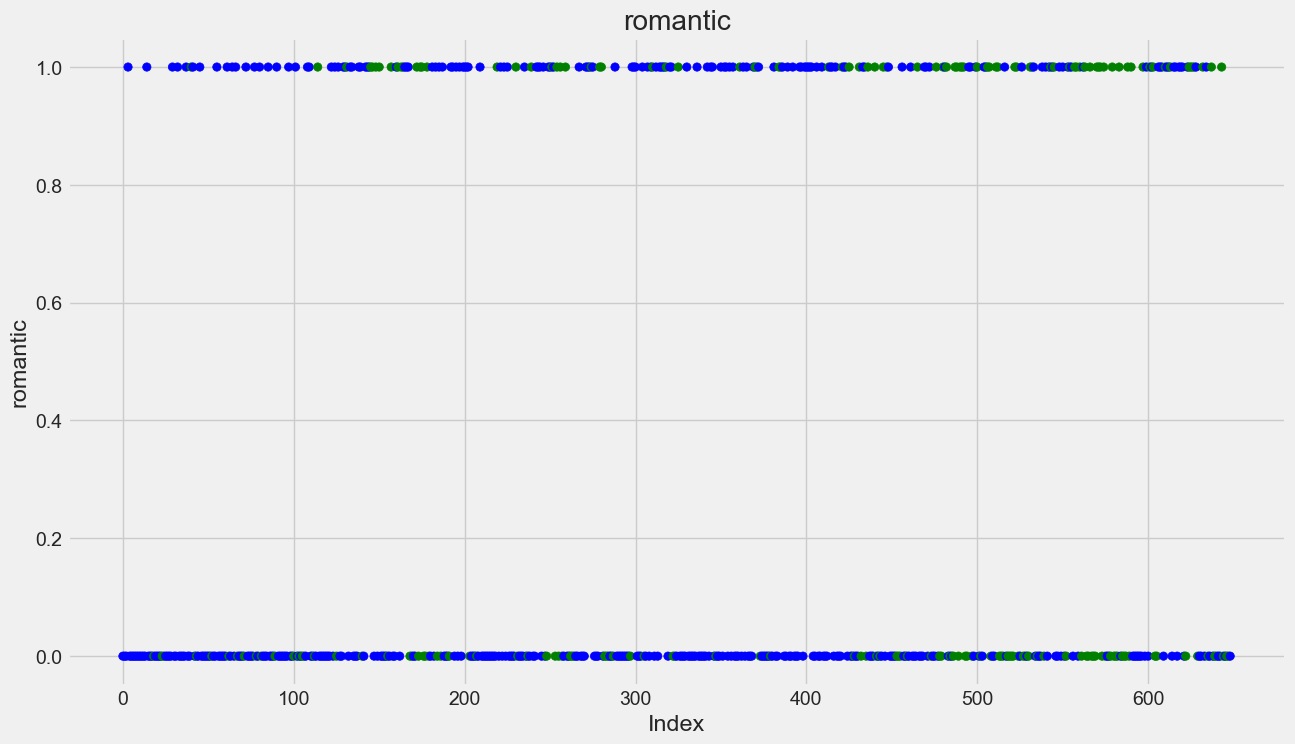

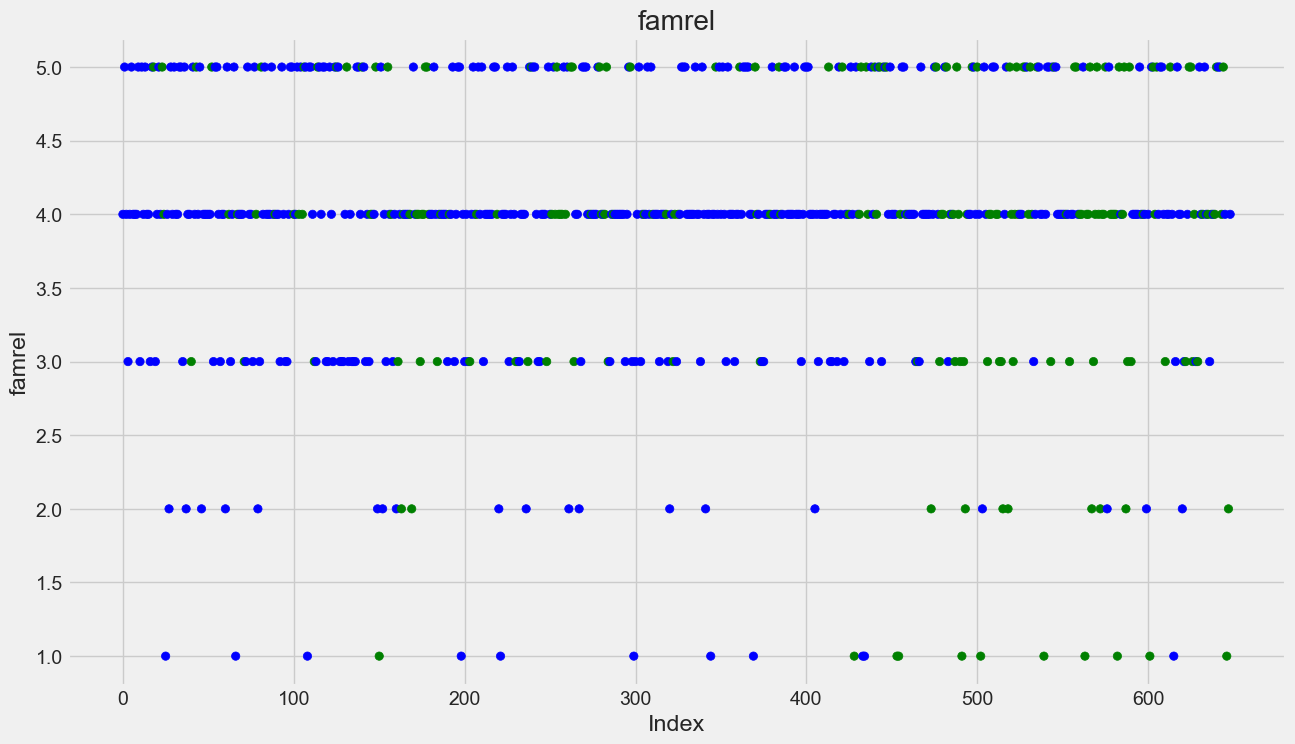

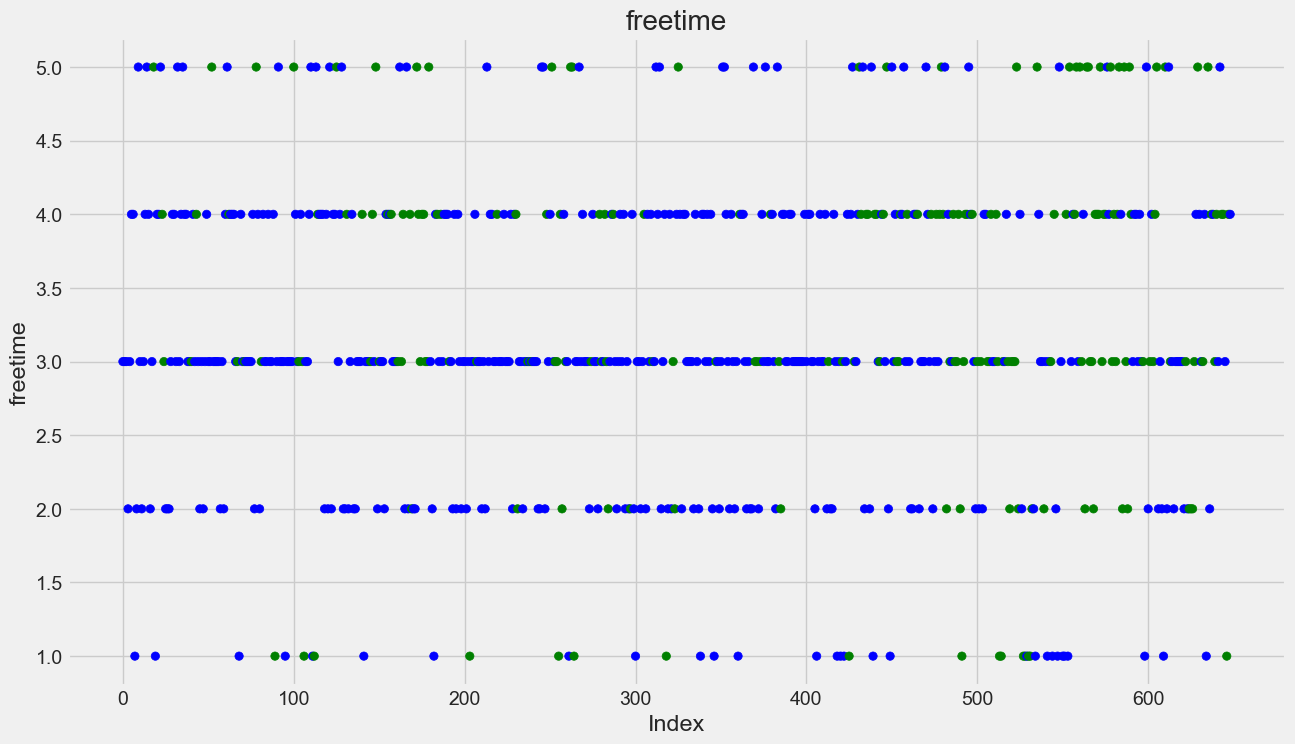

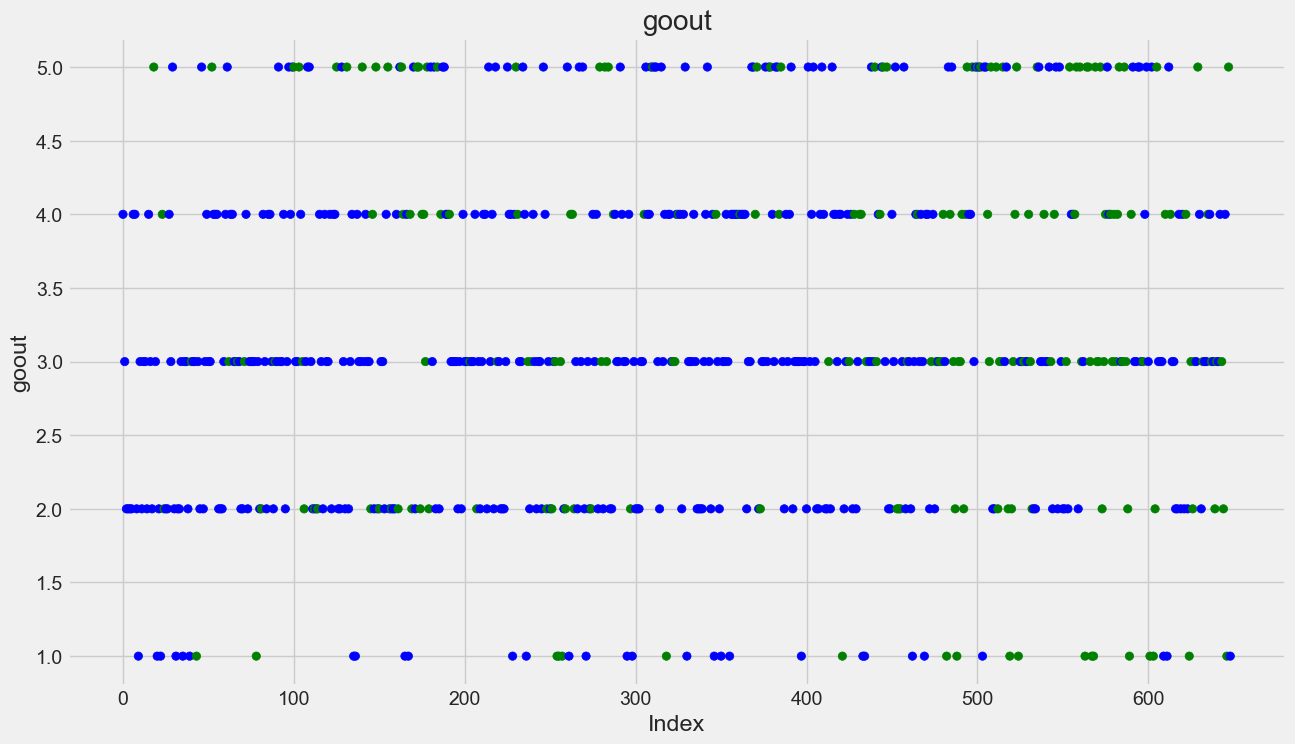

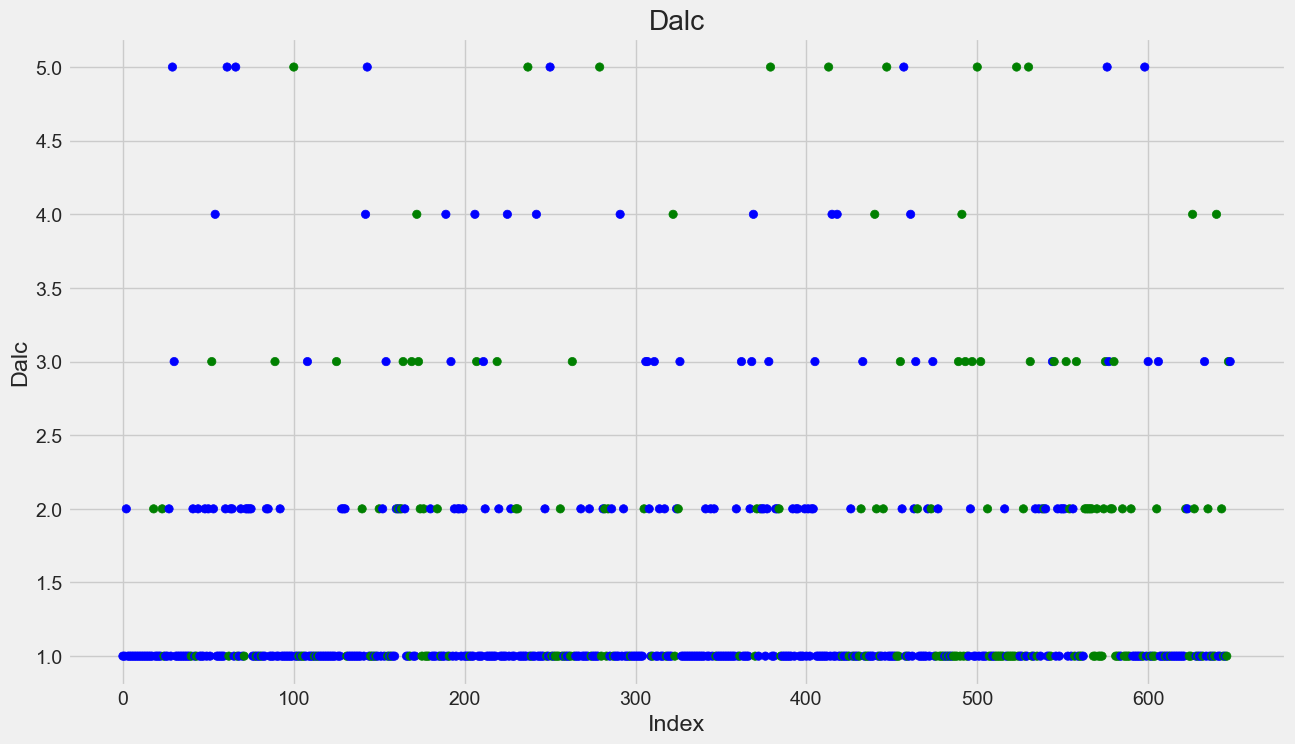

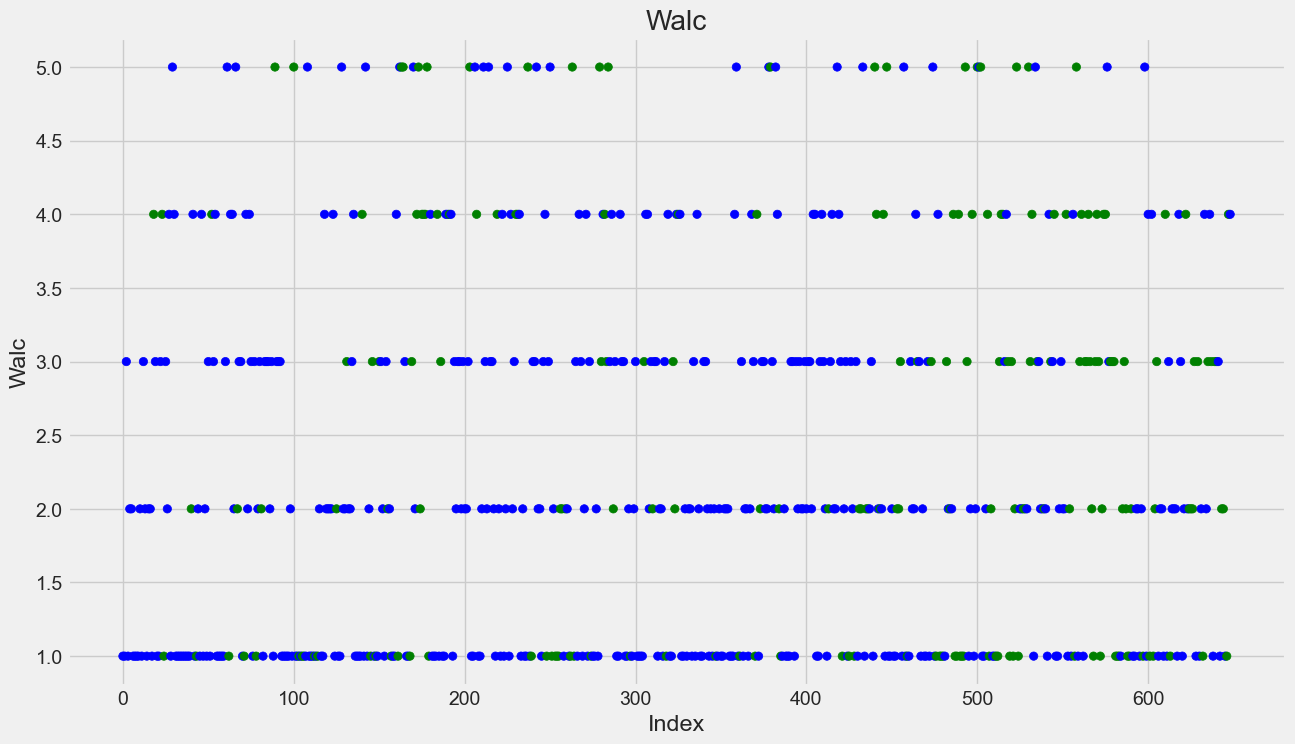

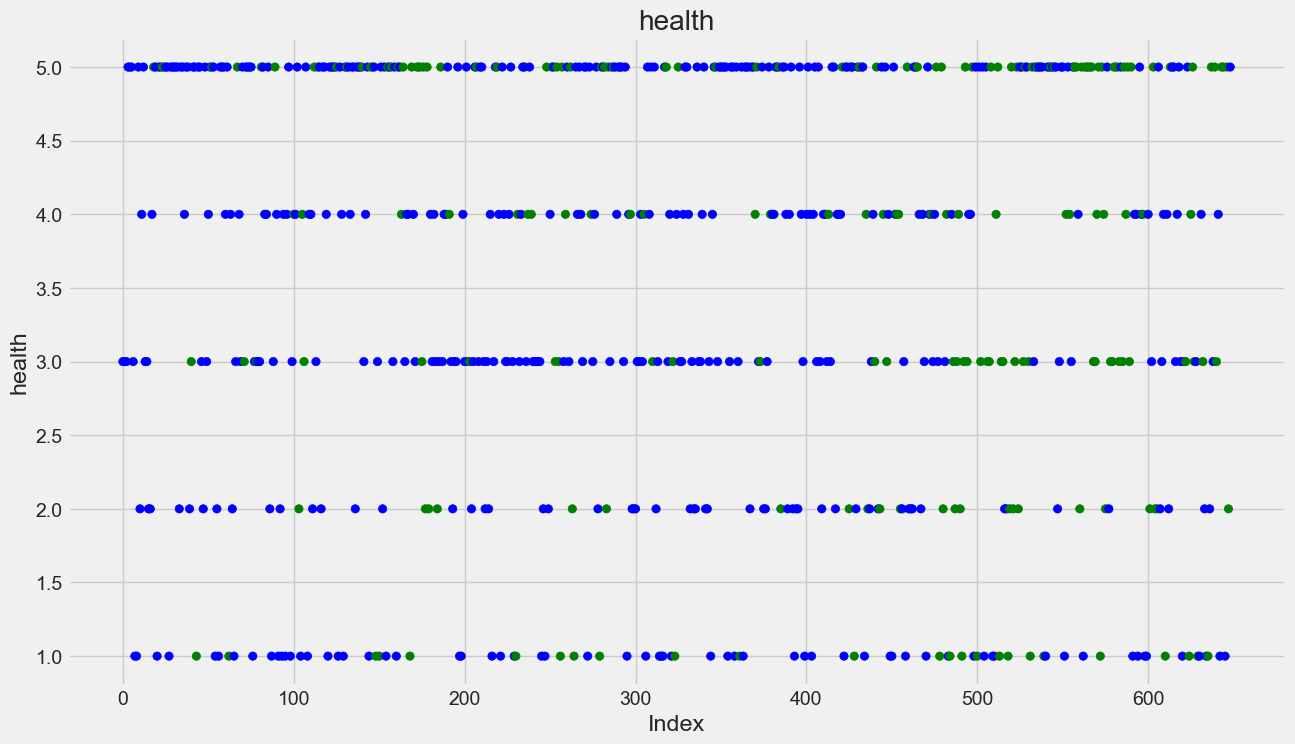

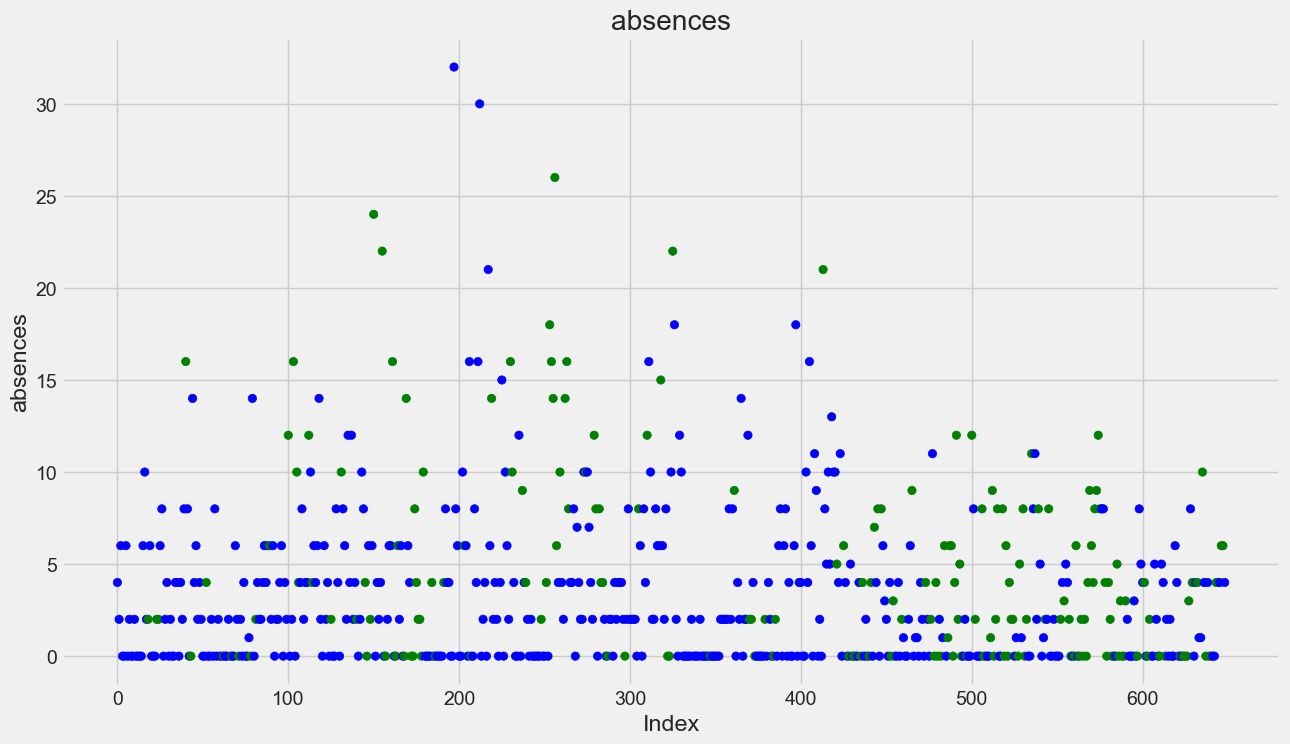

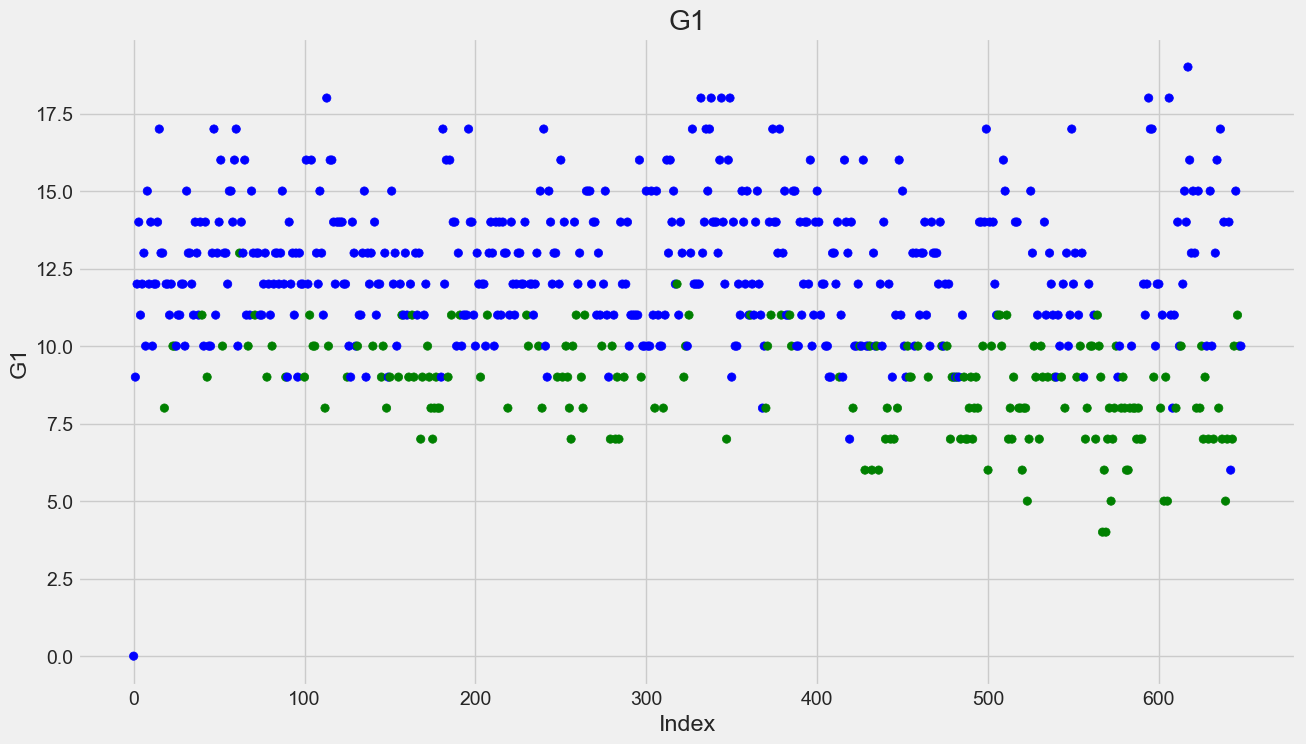

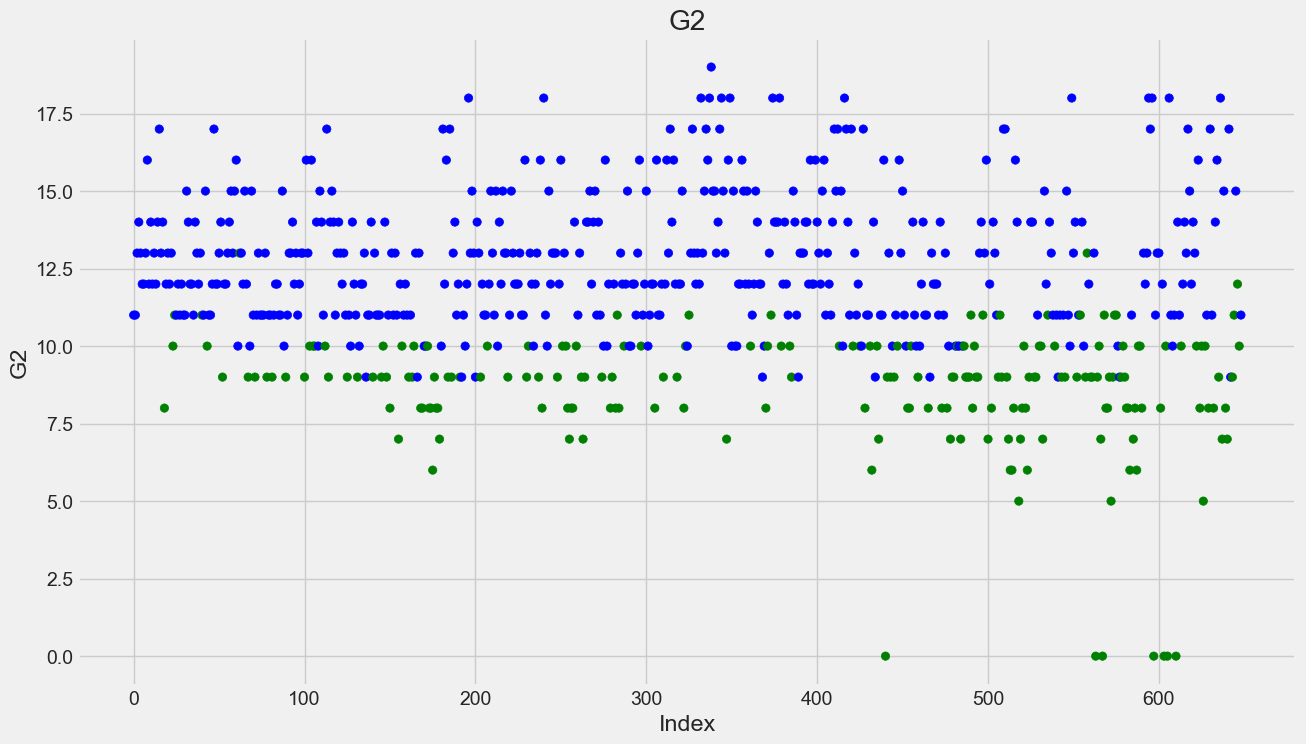

In [59]:
all_columns = df.columns.tolist()
for column in all_columns:
    
    if column != 'G3':
        plt.figure(figsize=(14,8))
        colors = np.where(df['G3']==1, 'blue', 'green') 
        plt.scatter(df.index, df[column], c=colors)
        plt.title(column)
        plt.xlabel('Index')
        plt.ylabel(column)
        plt.show()


<span style="color:BLUE">Διαγράμμτα Διασποράς με βάση την Κατηγορία της Μεταβλητής 'G3'

In [60]:
wr.filterwarnings('ignore')
sns.pairplot(data=df, hue='G3', palette=['red', 'limegreen']);

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000218A8BC60C0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



<span style="color:BLUE">Density Plots

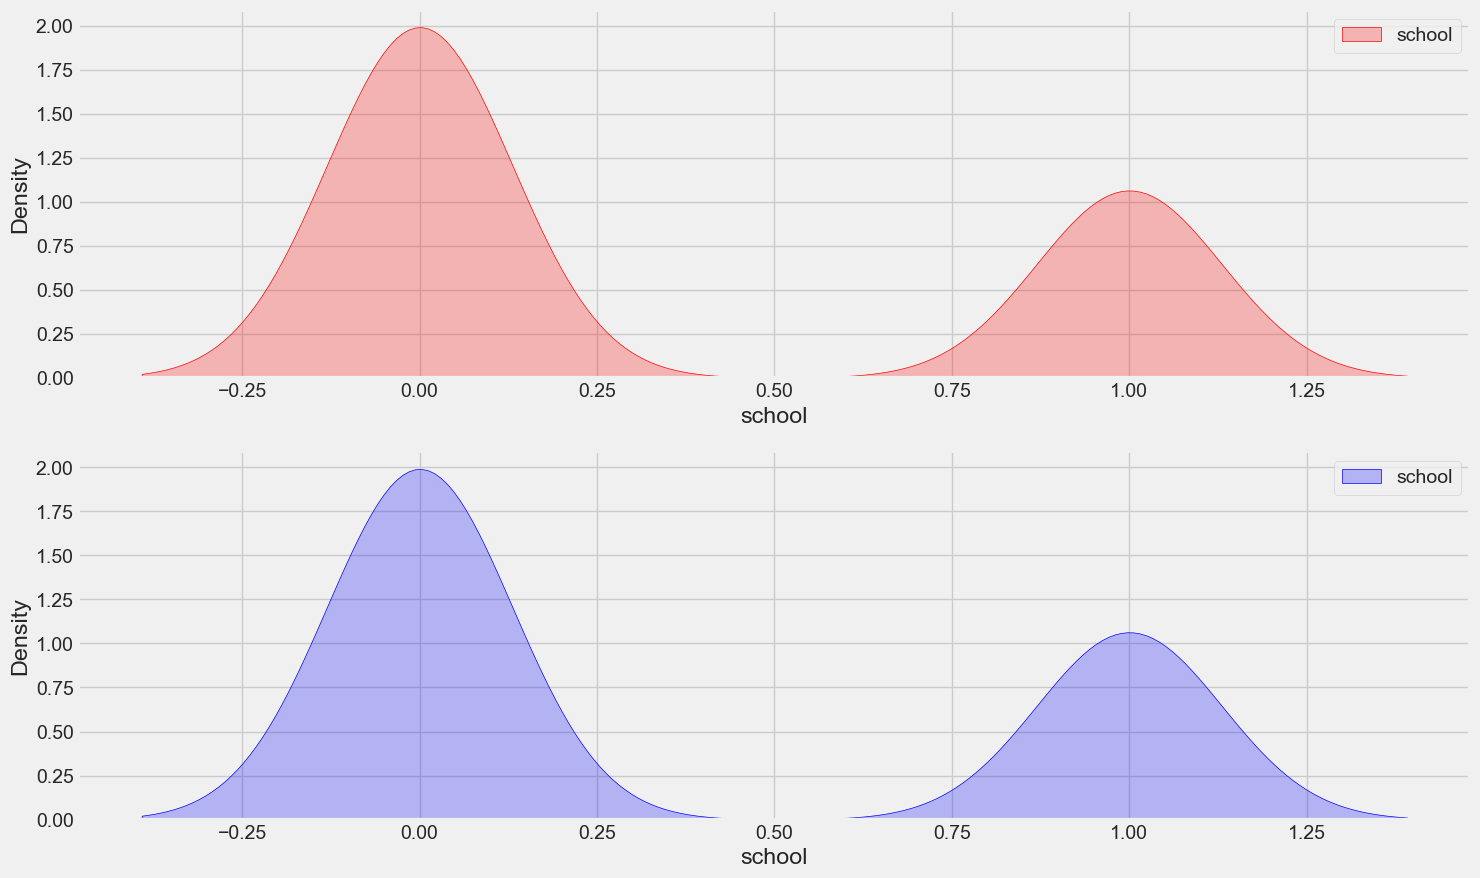

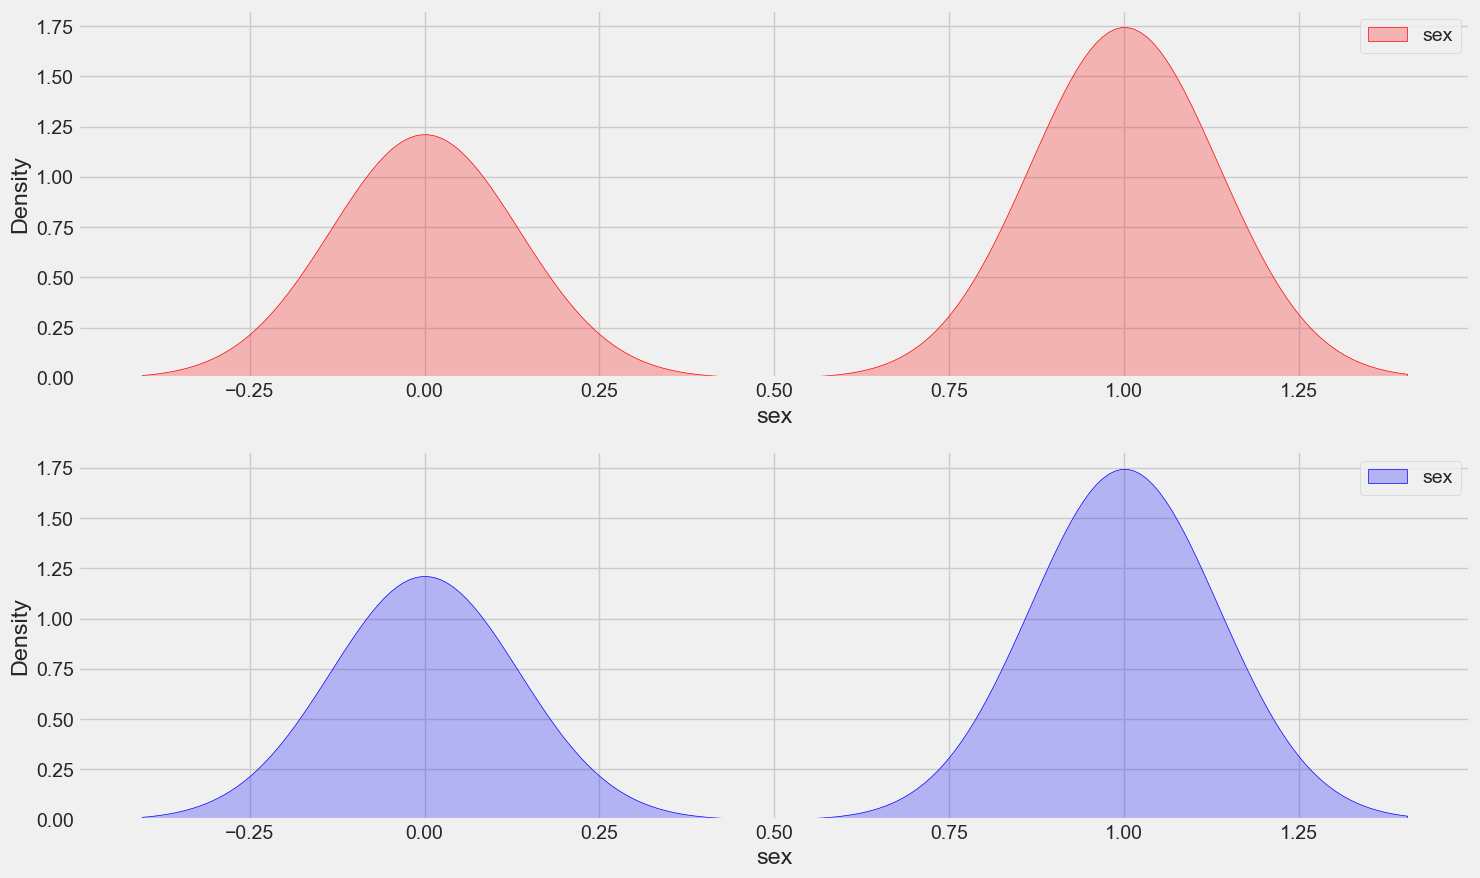

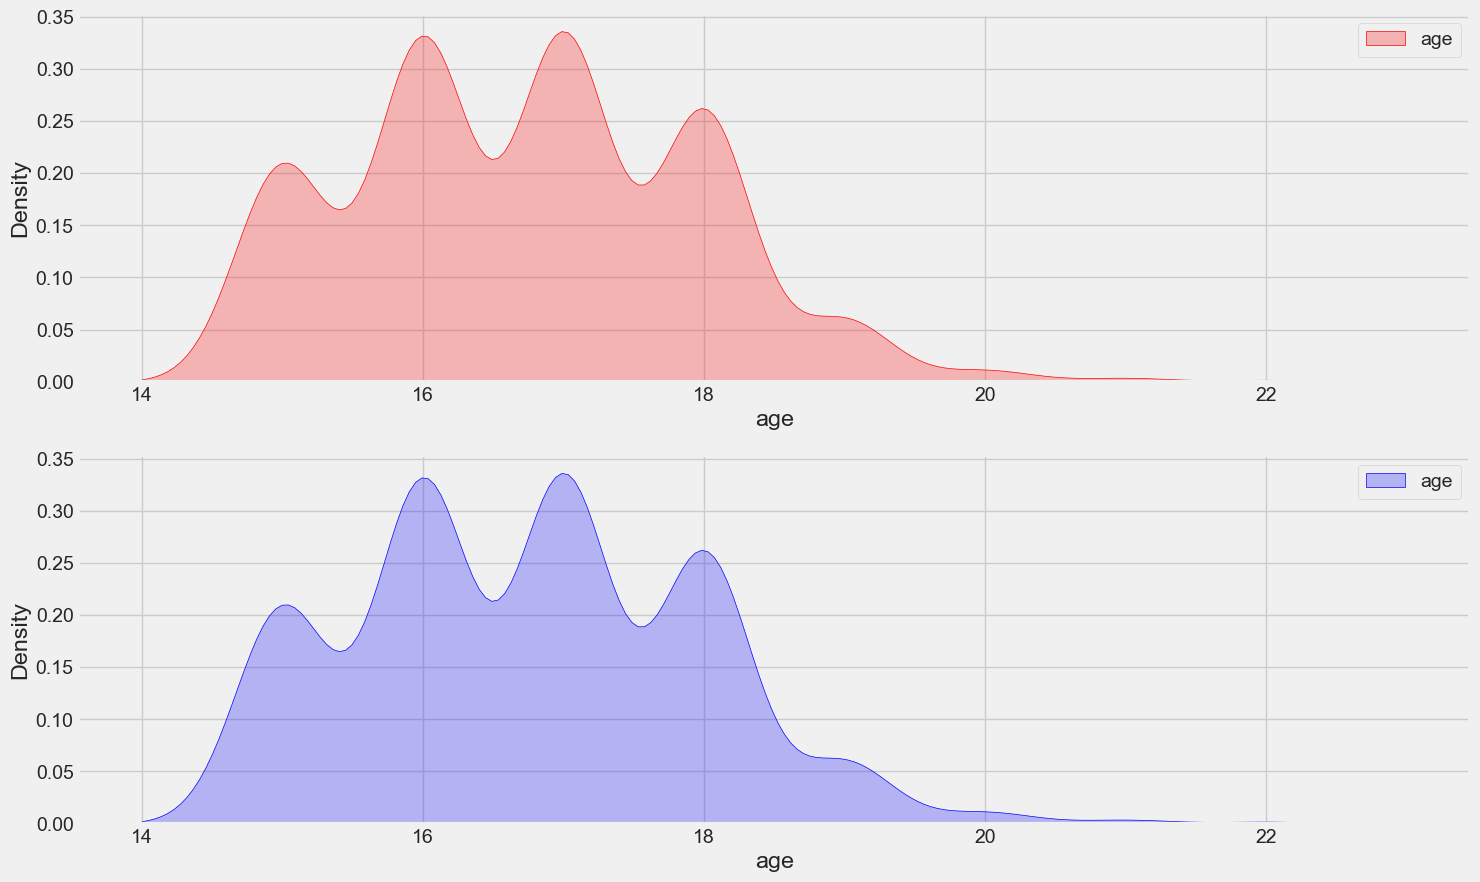

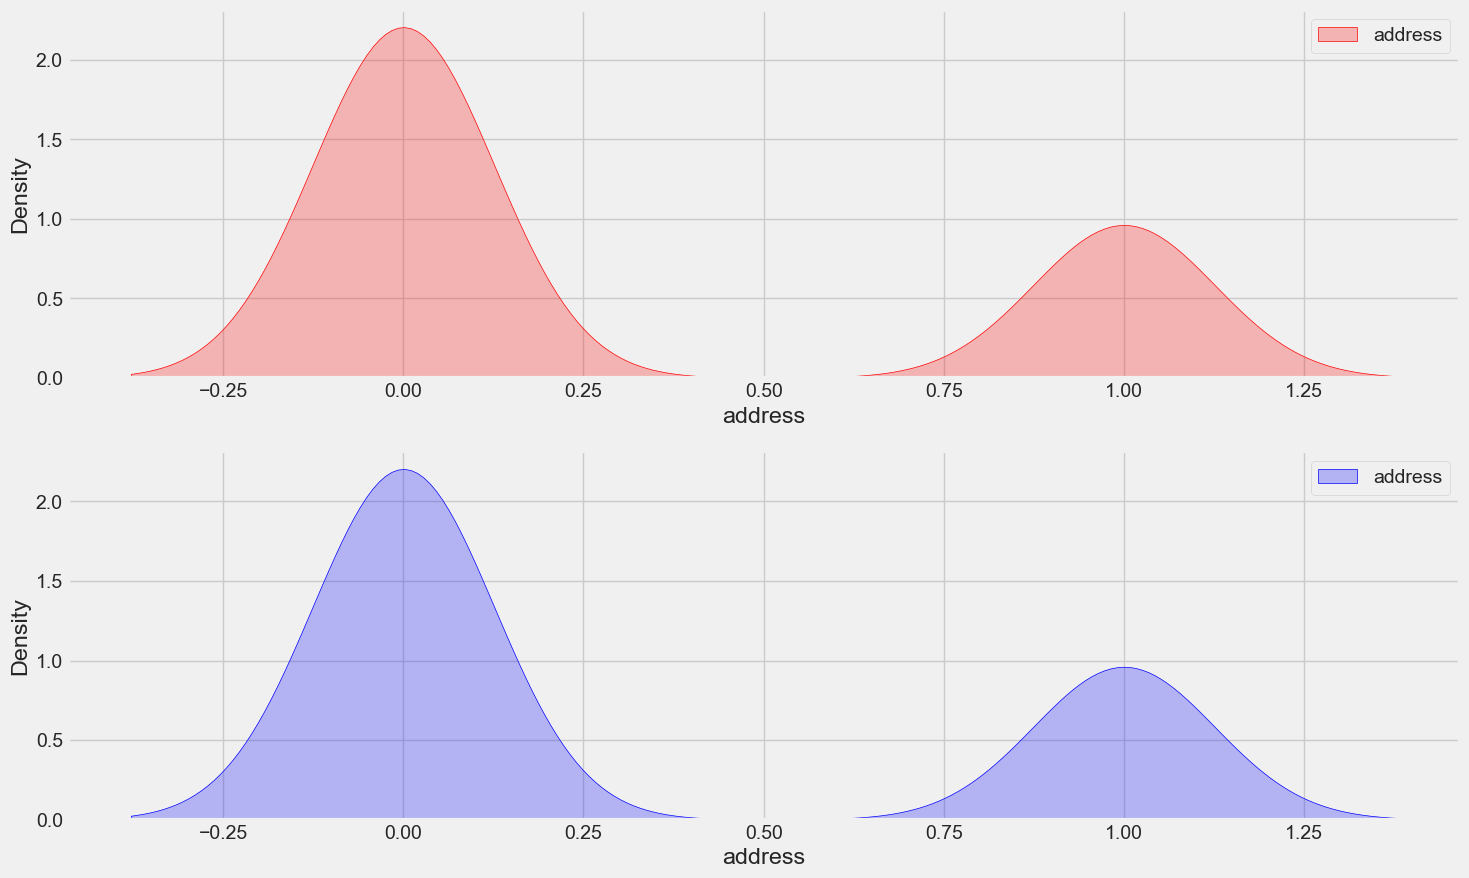

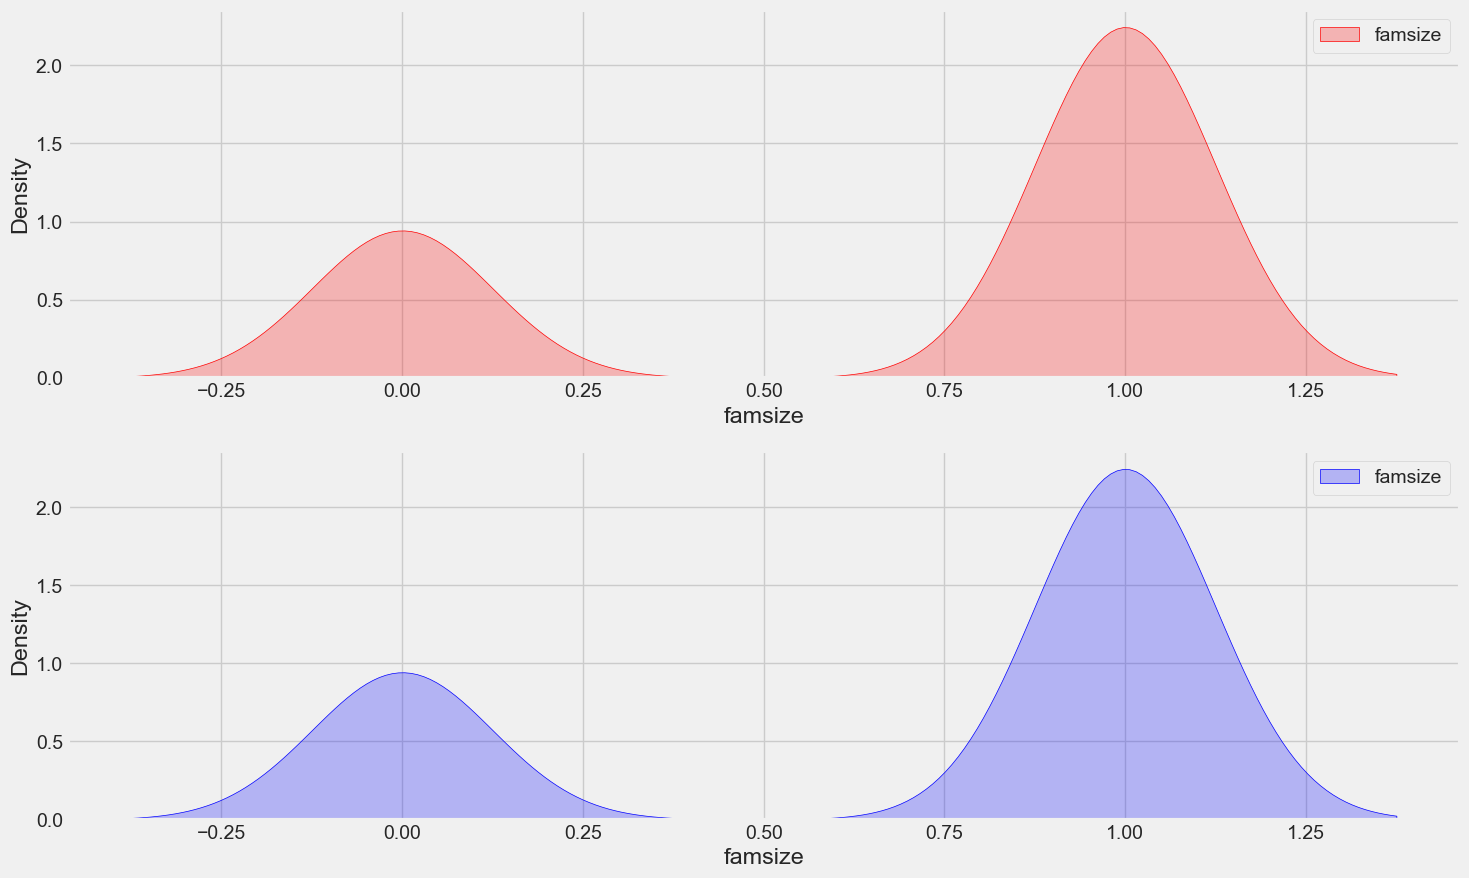

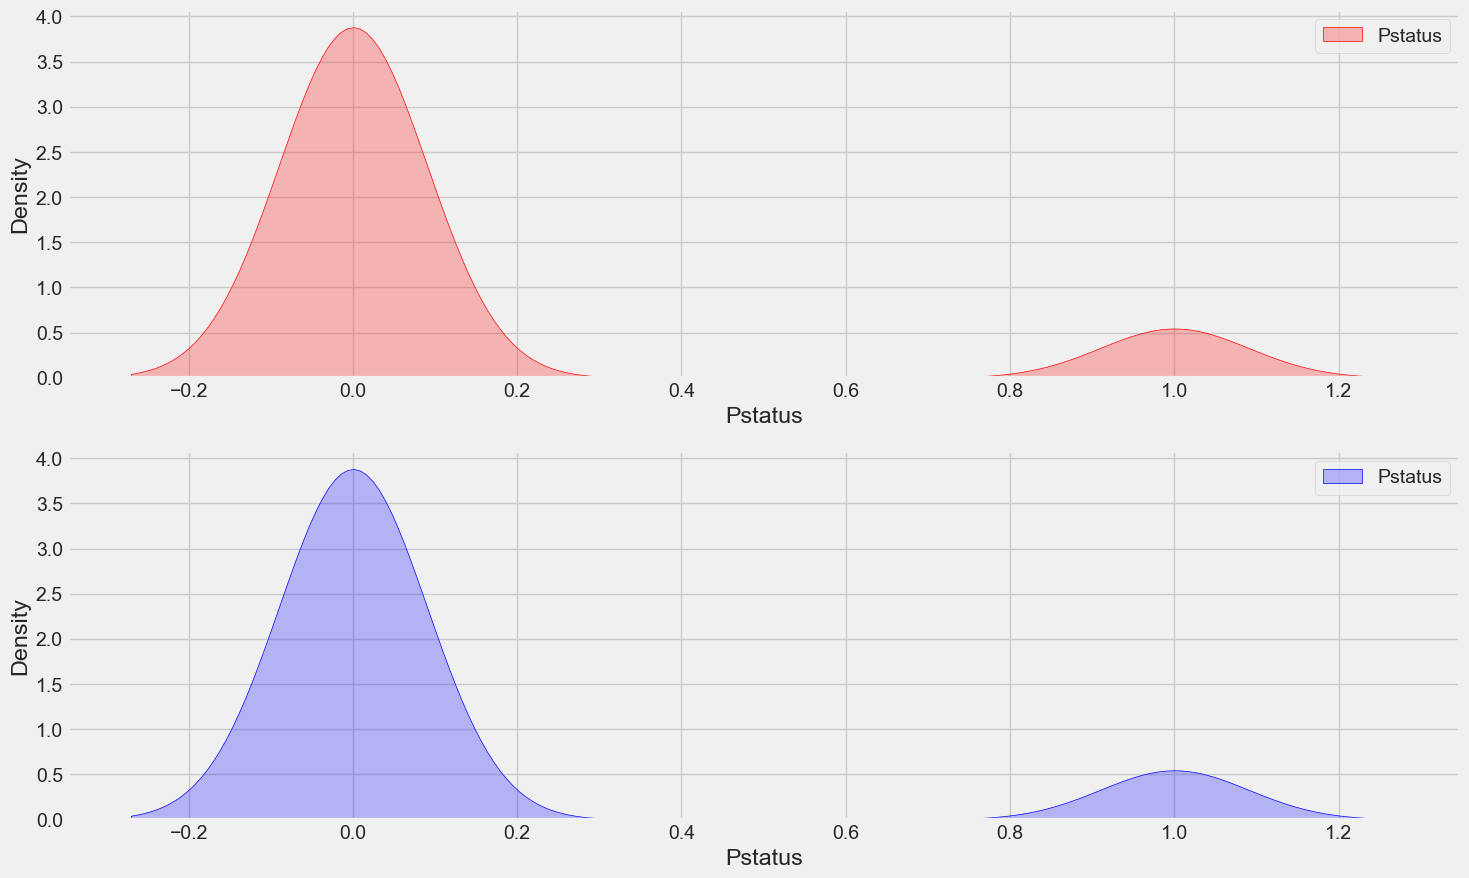

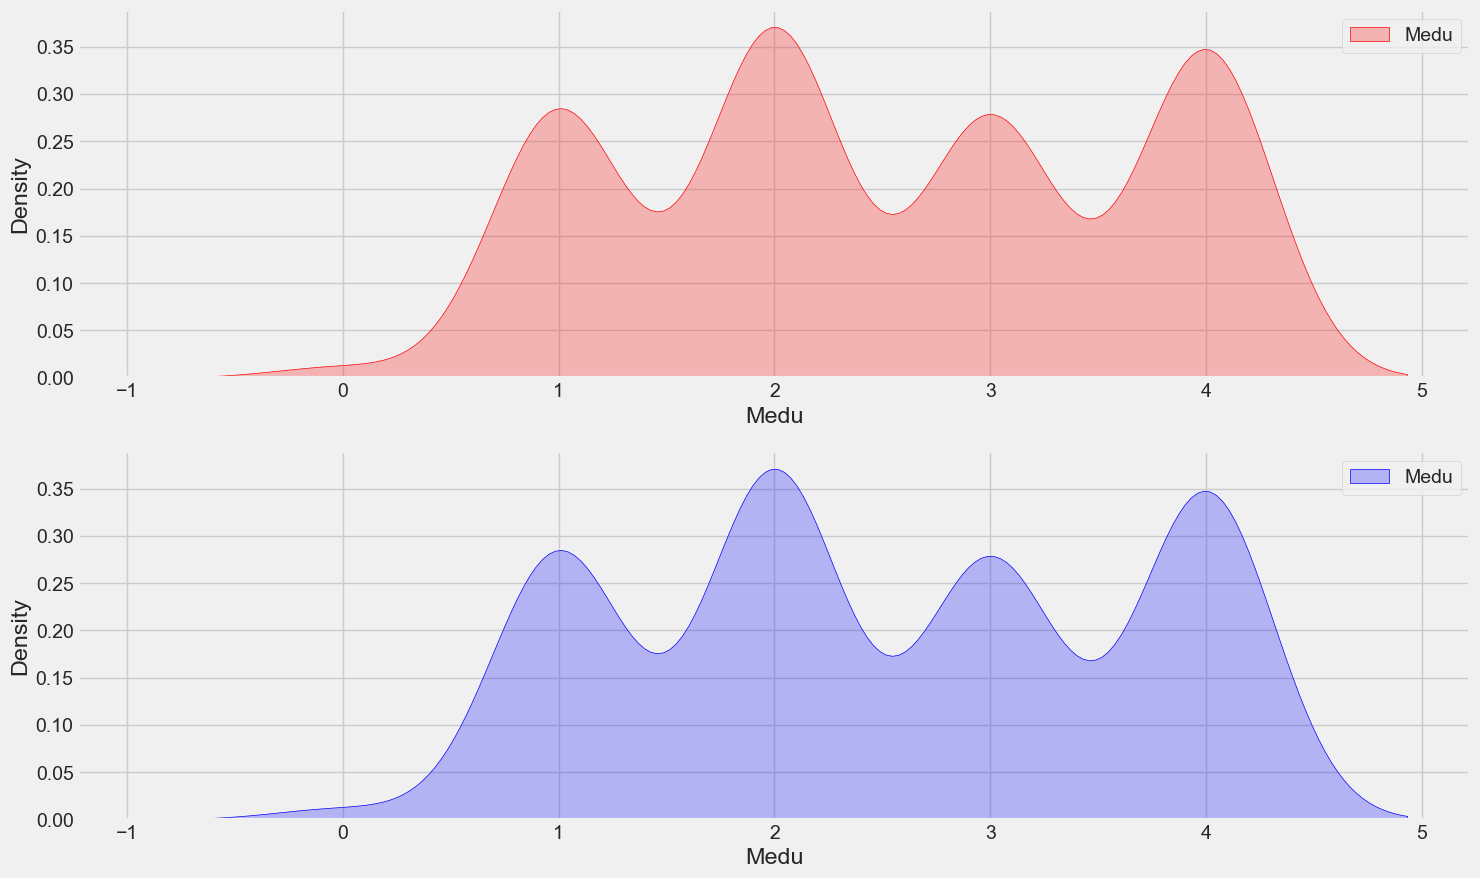

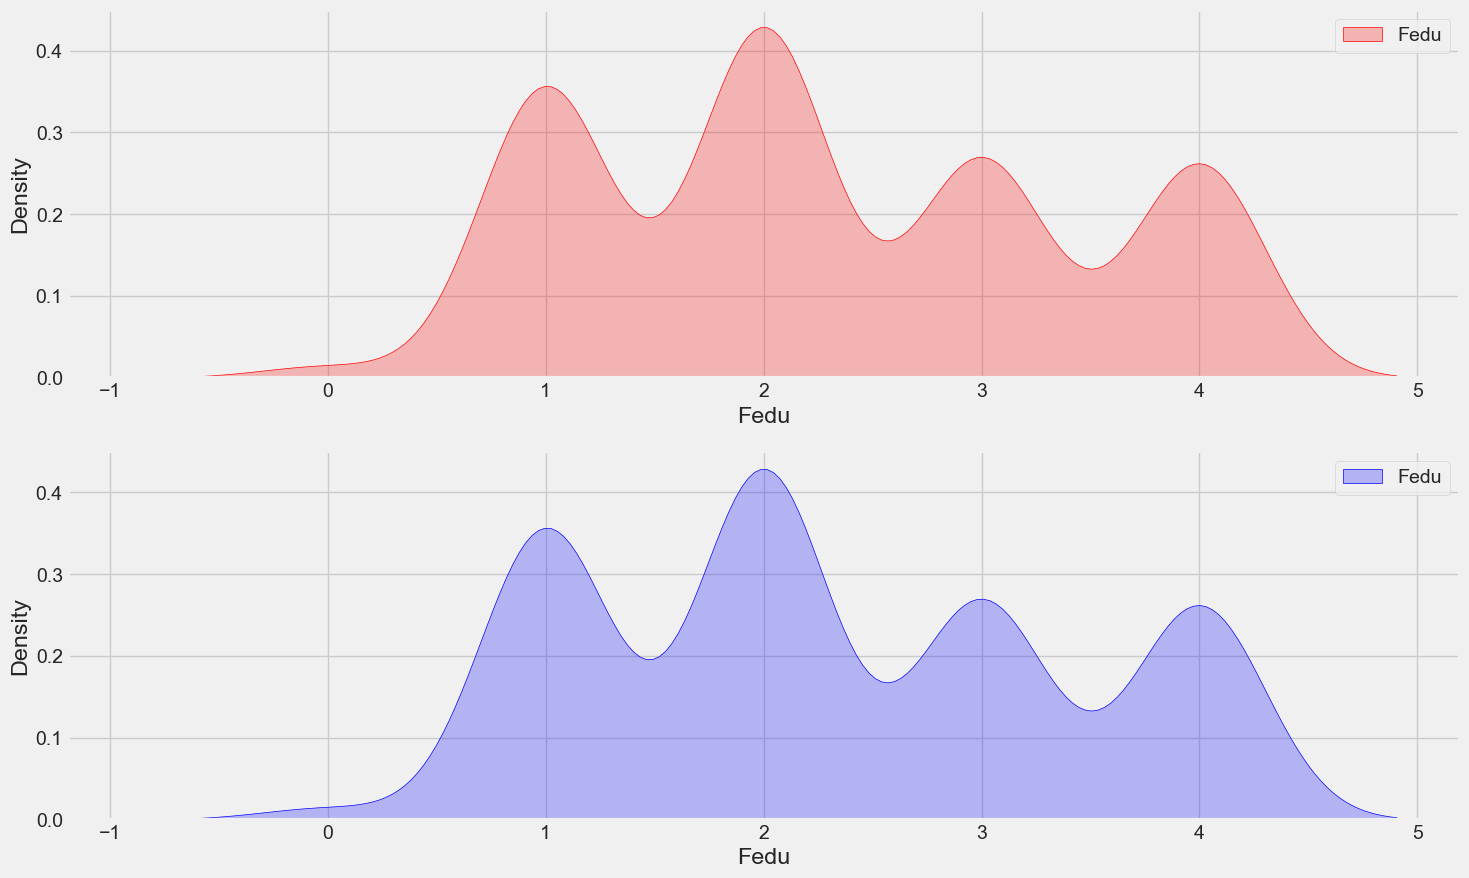

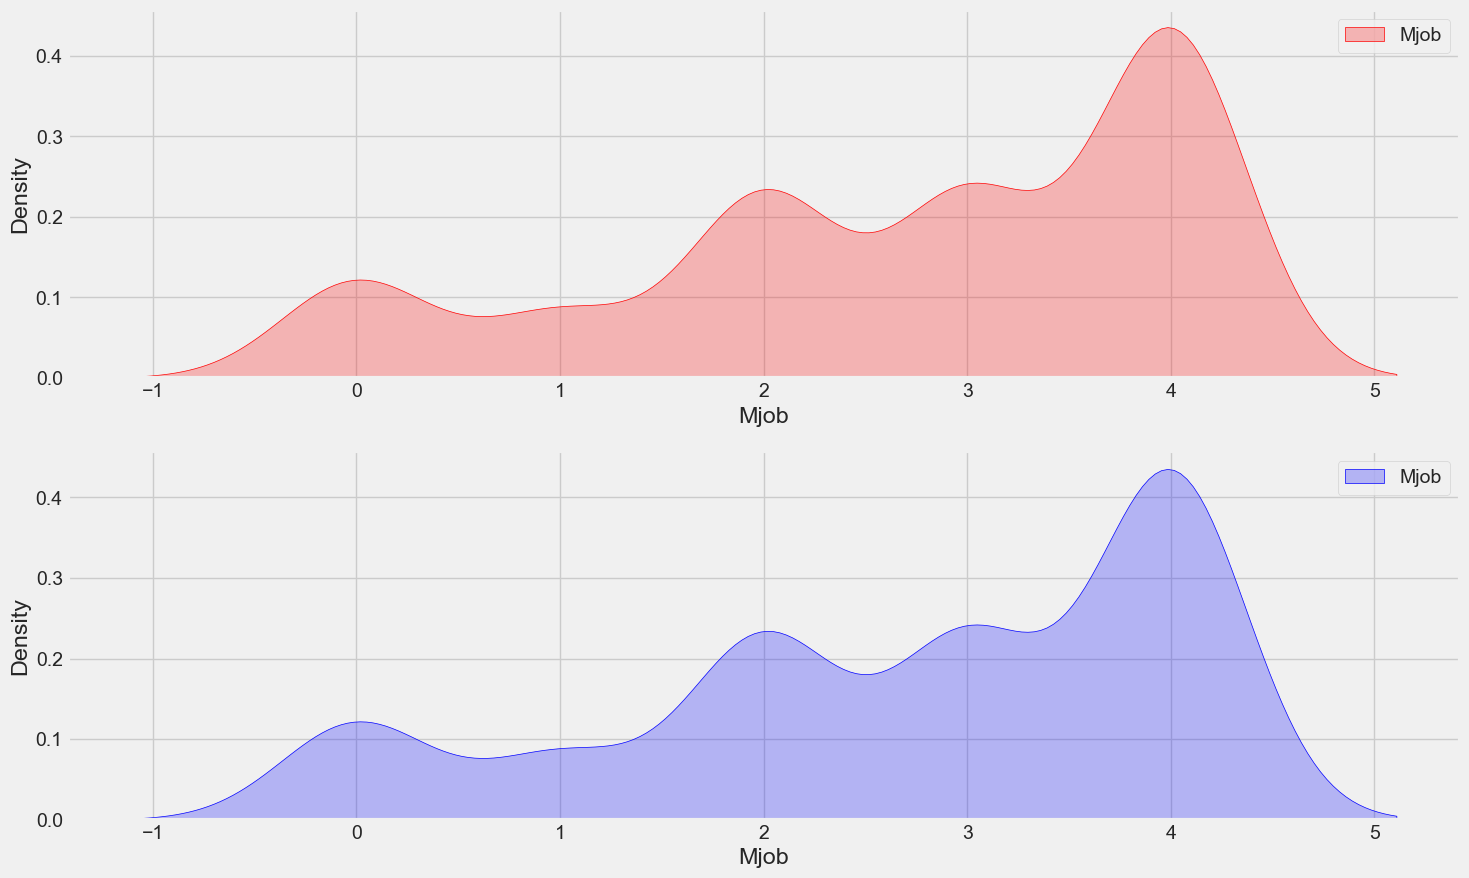

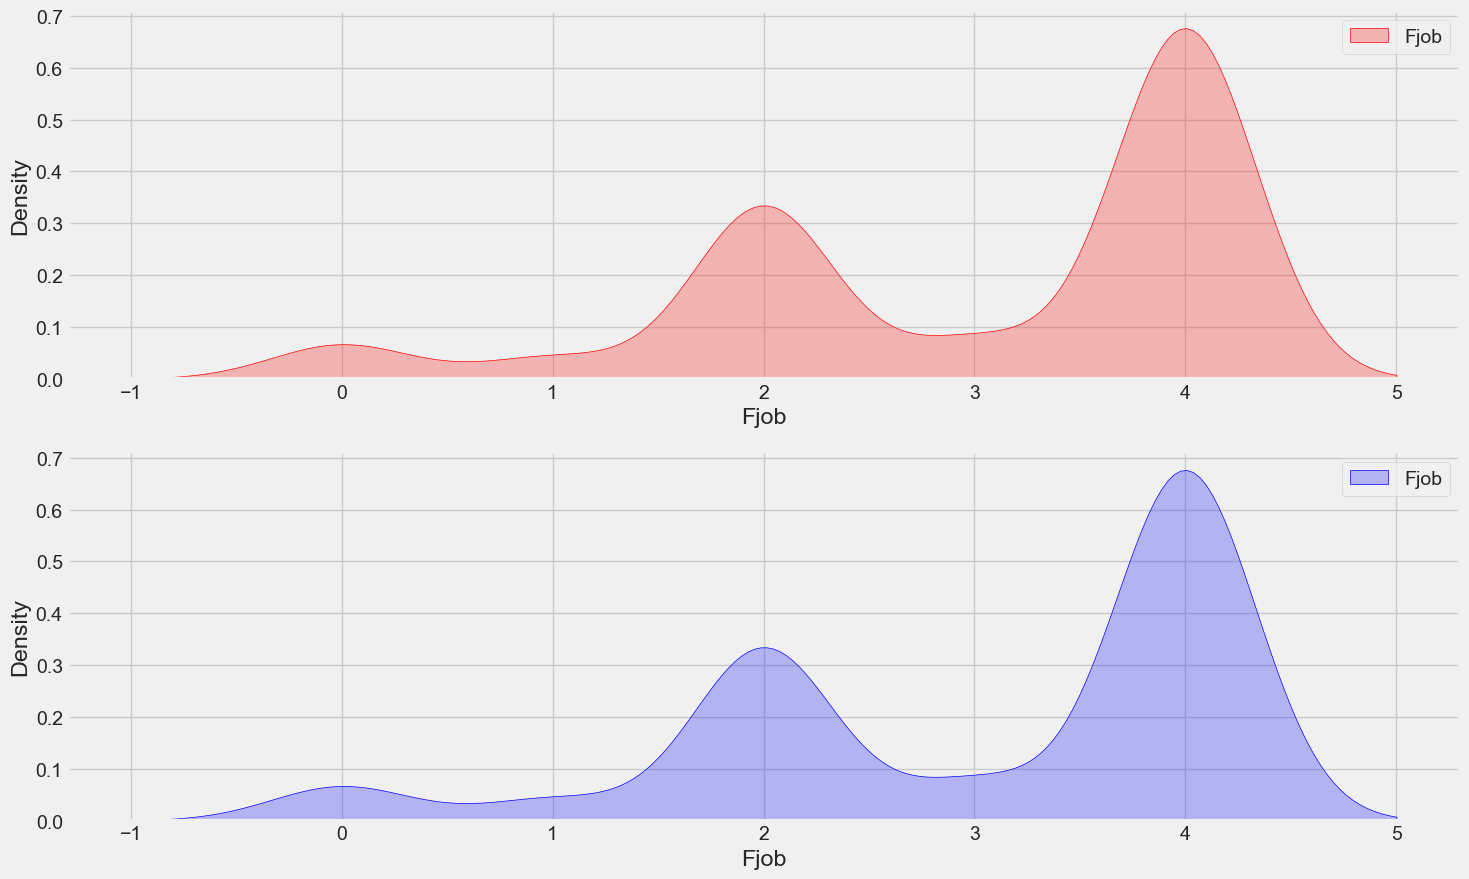

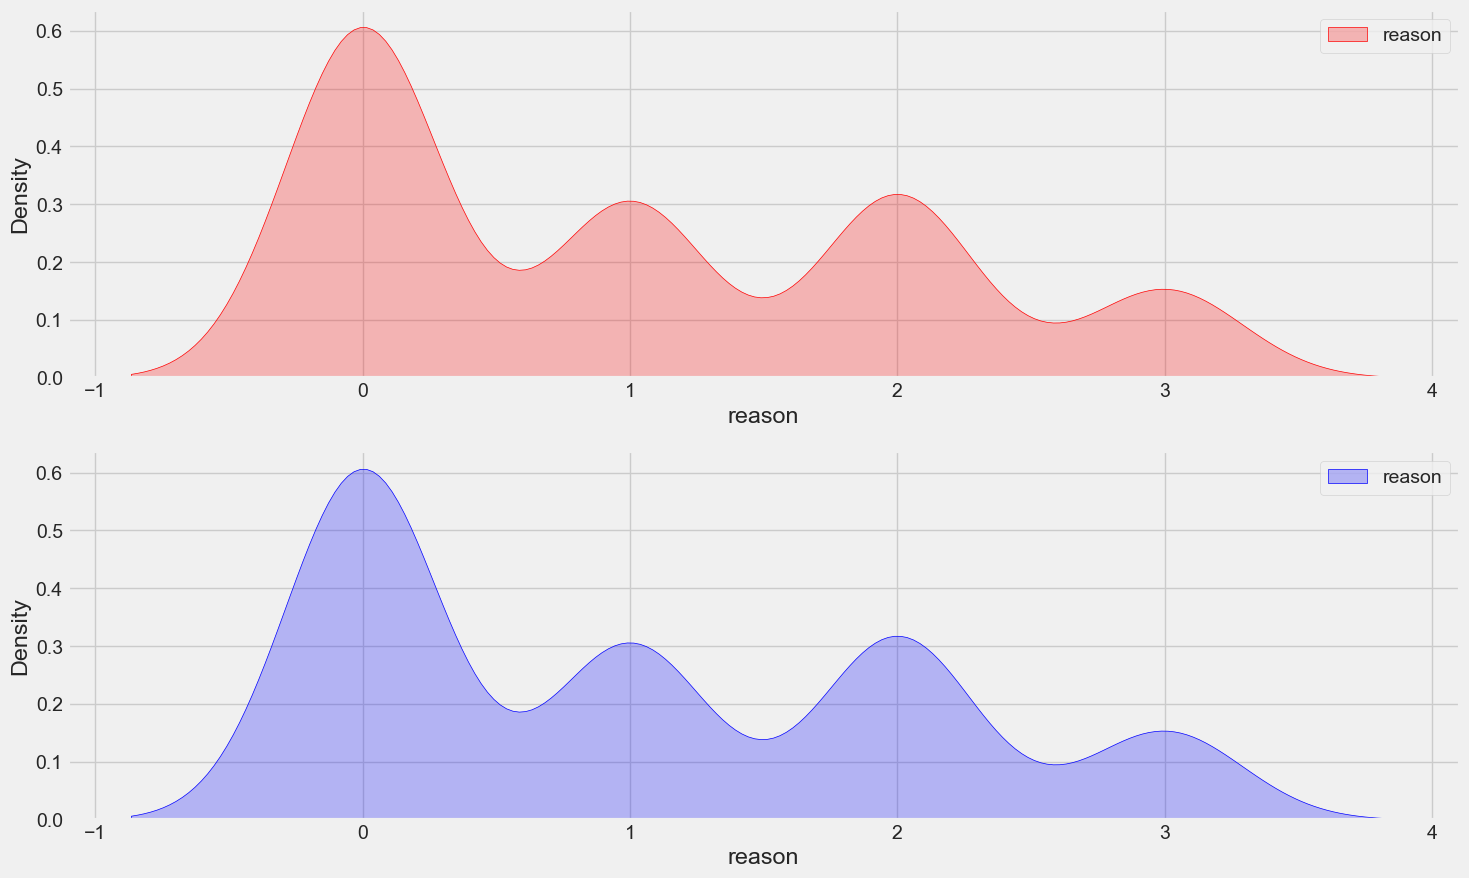

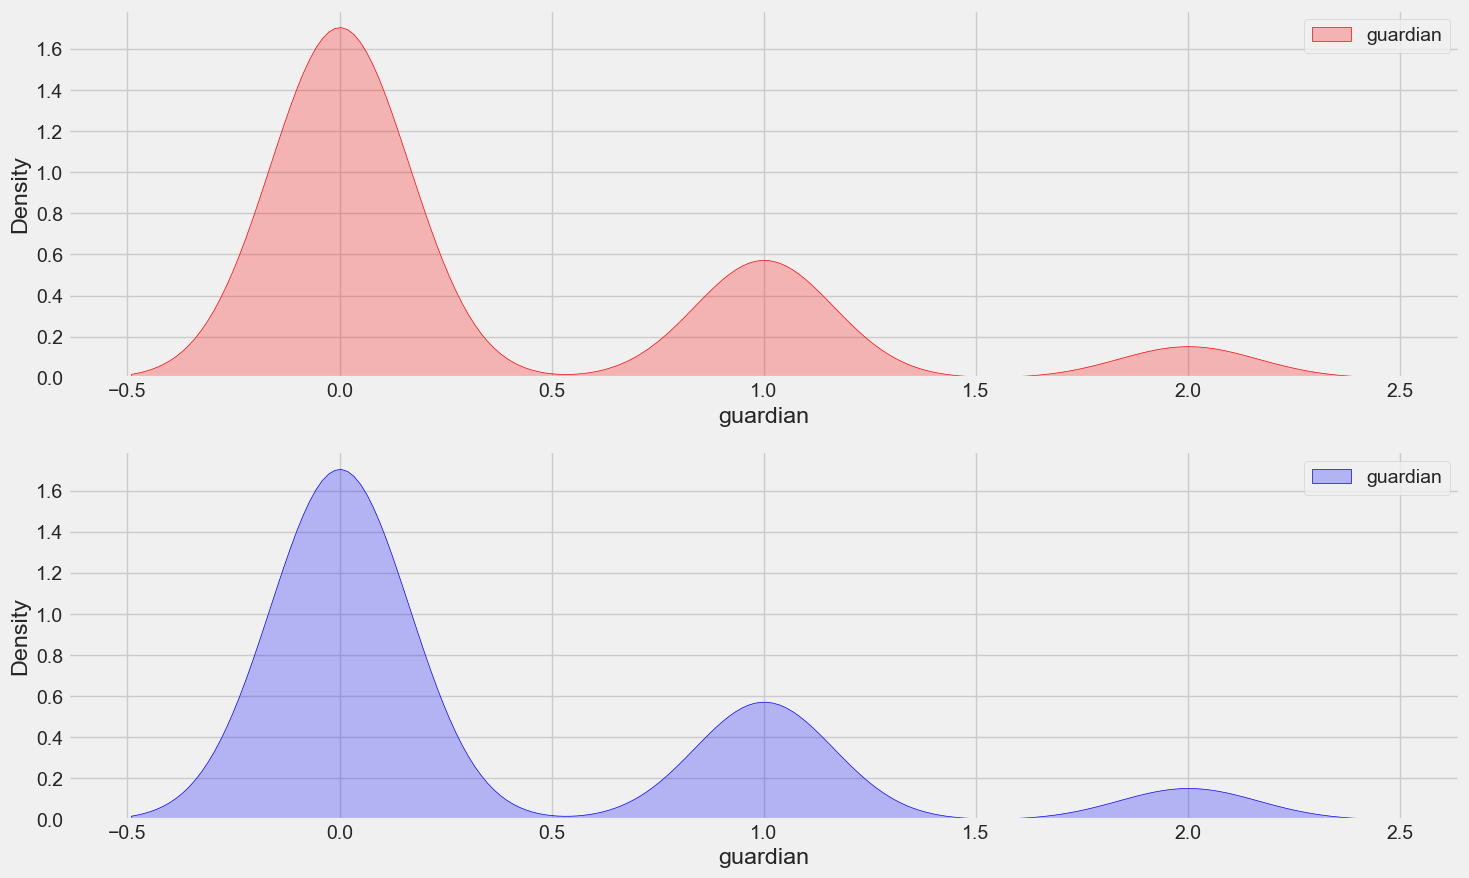

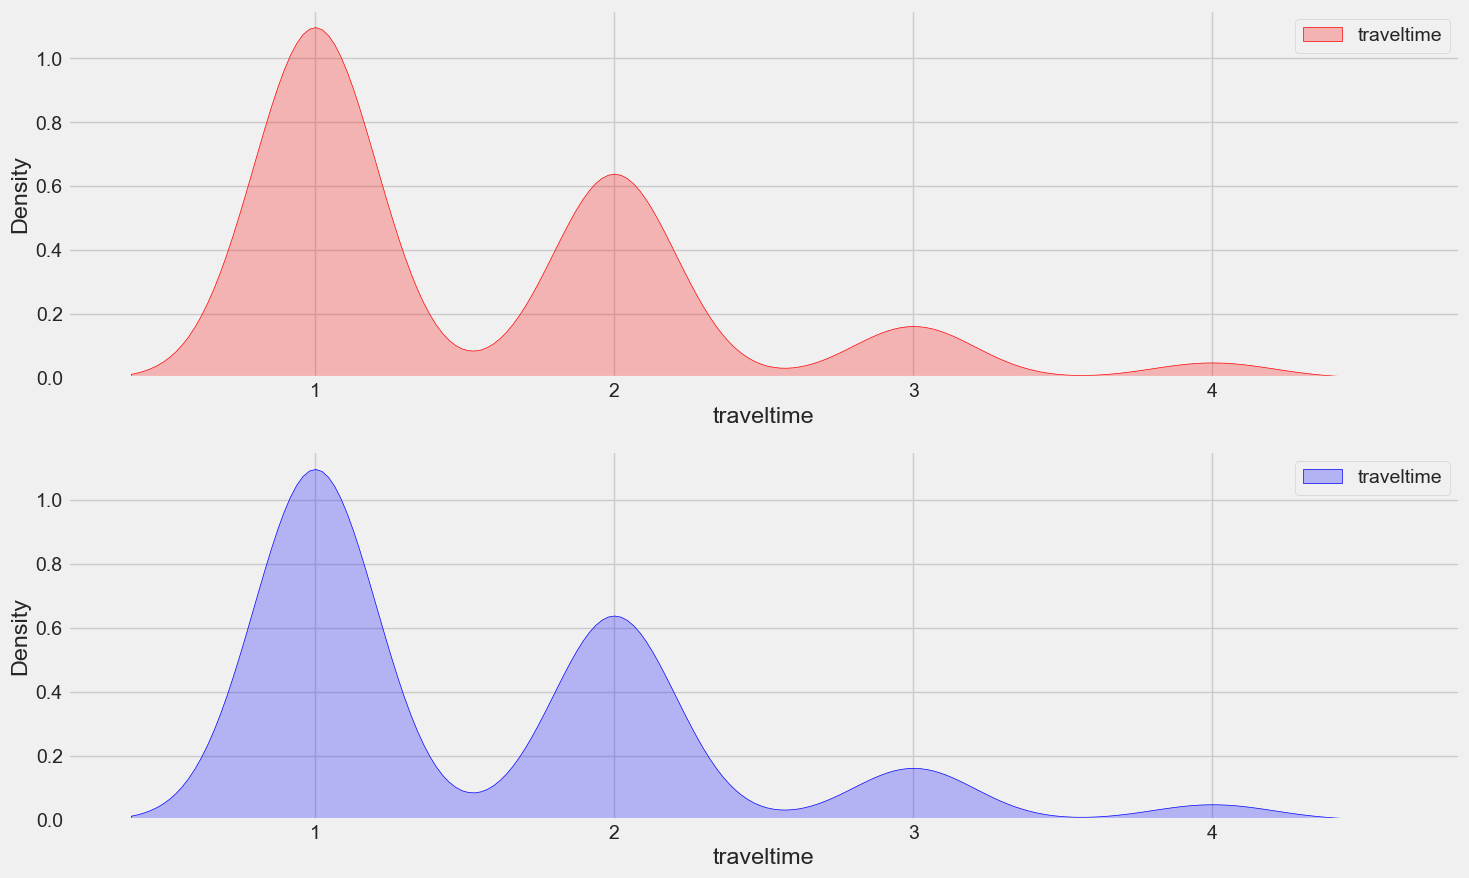

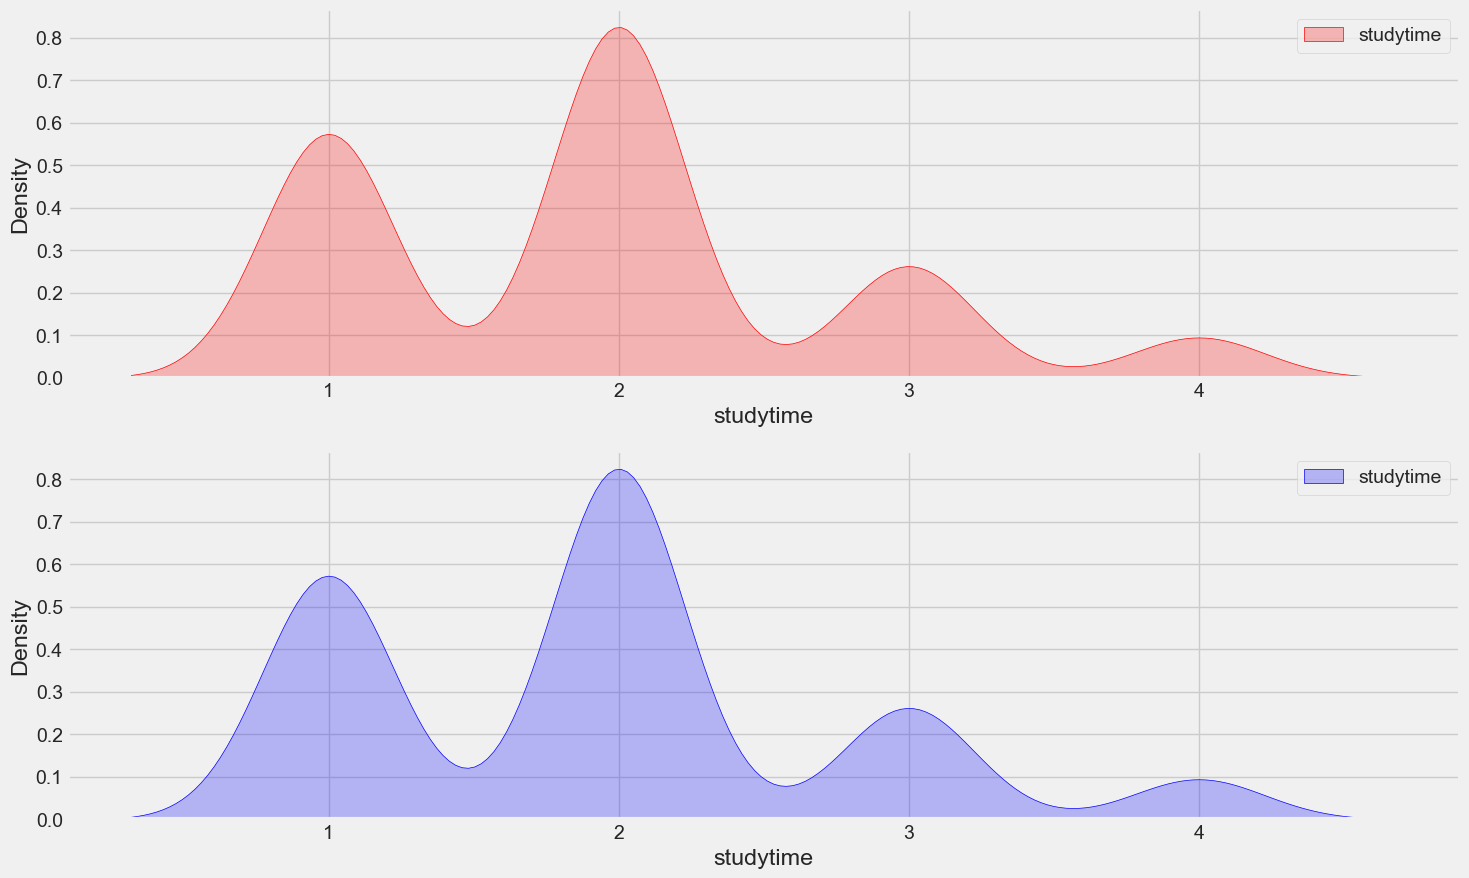

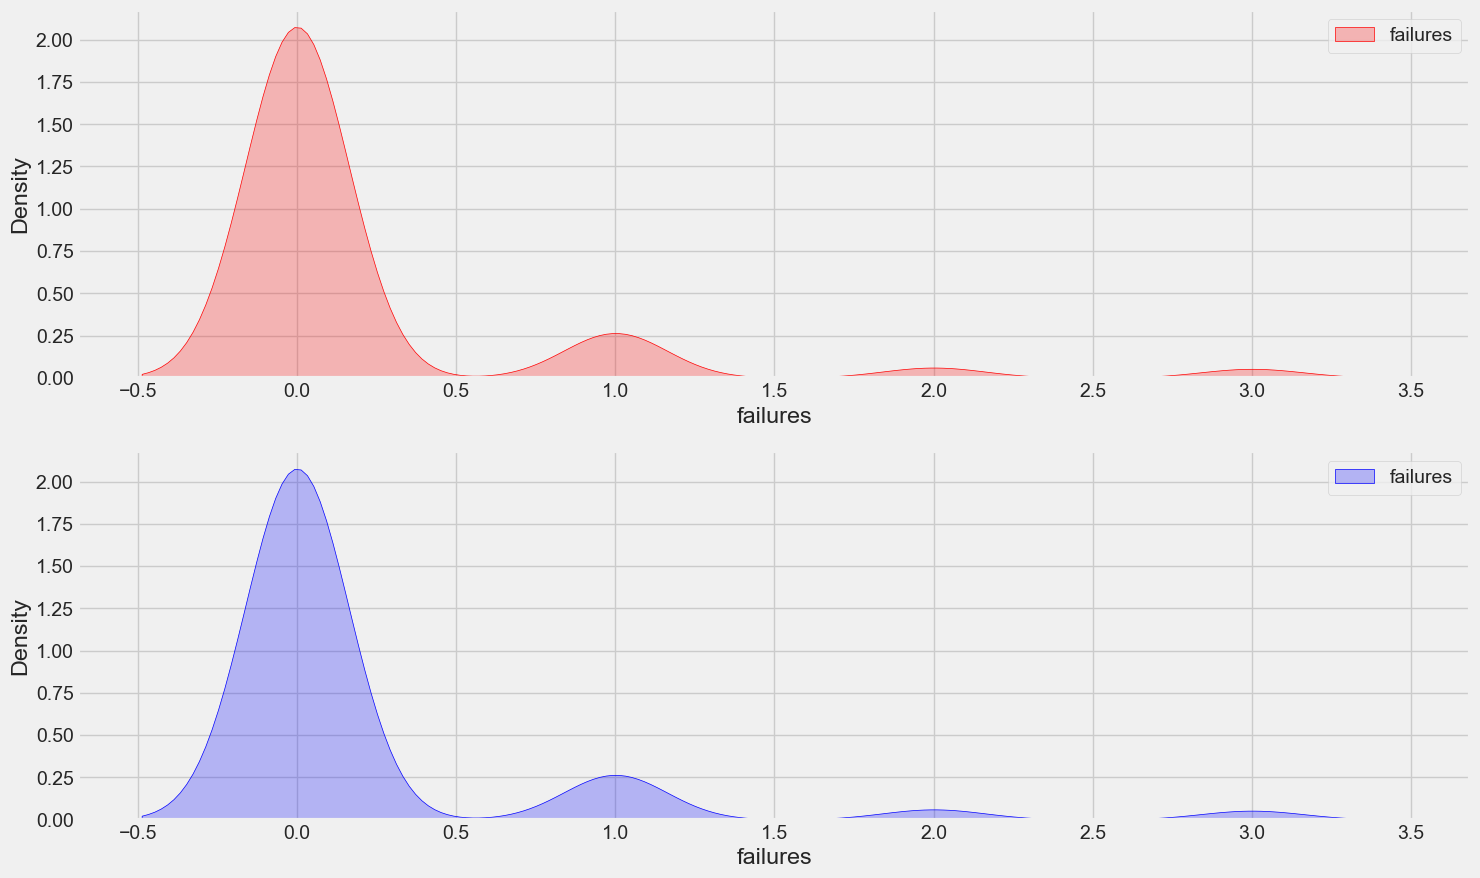

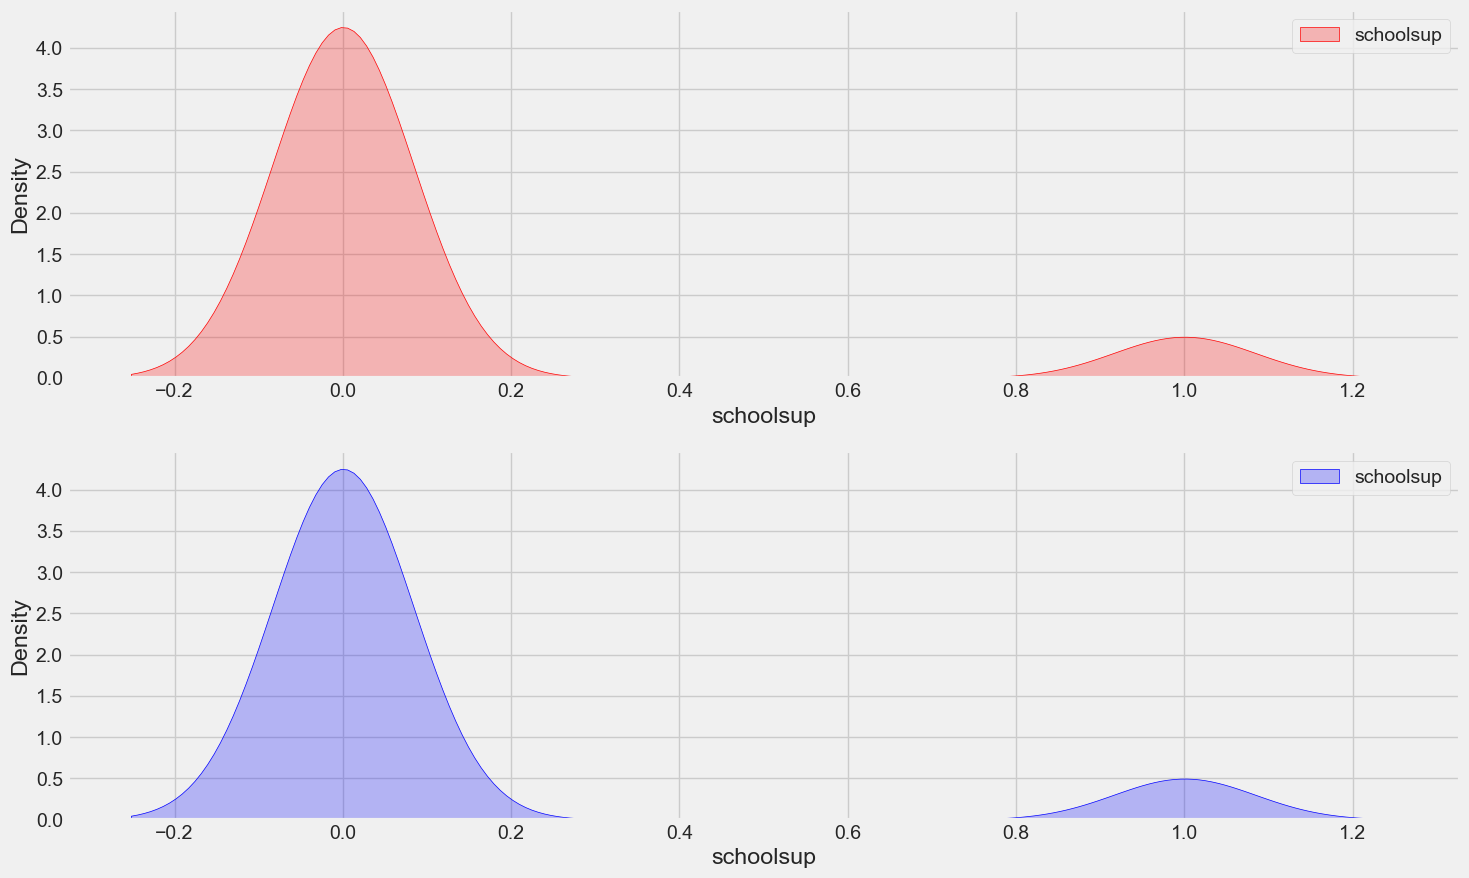

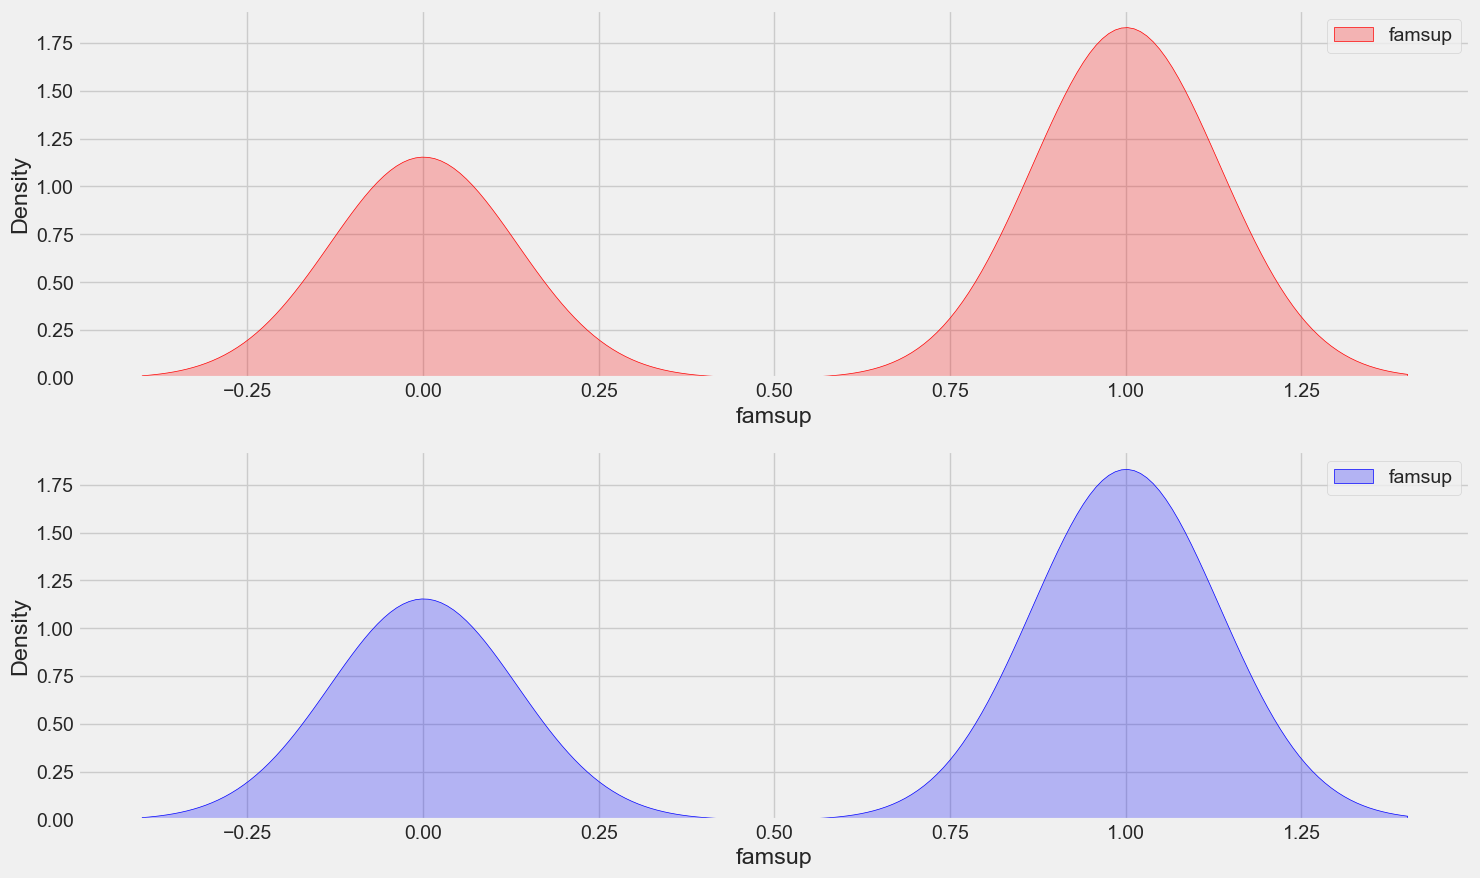

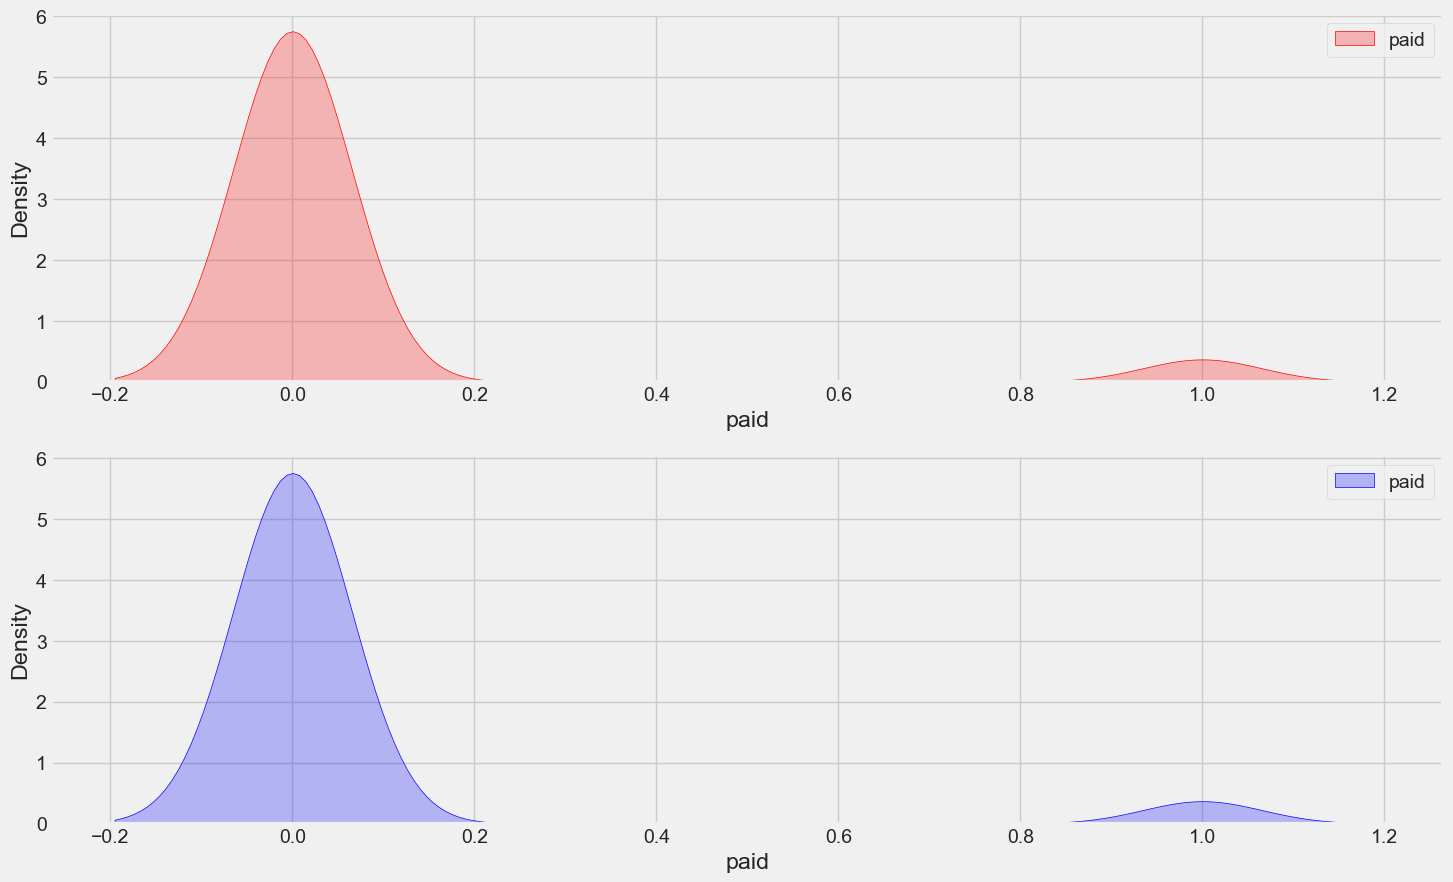

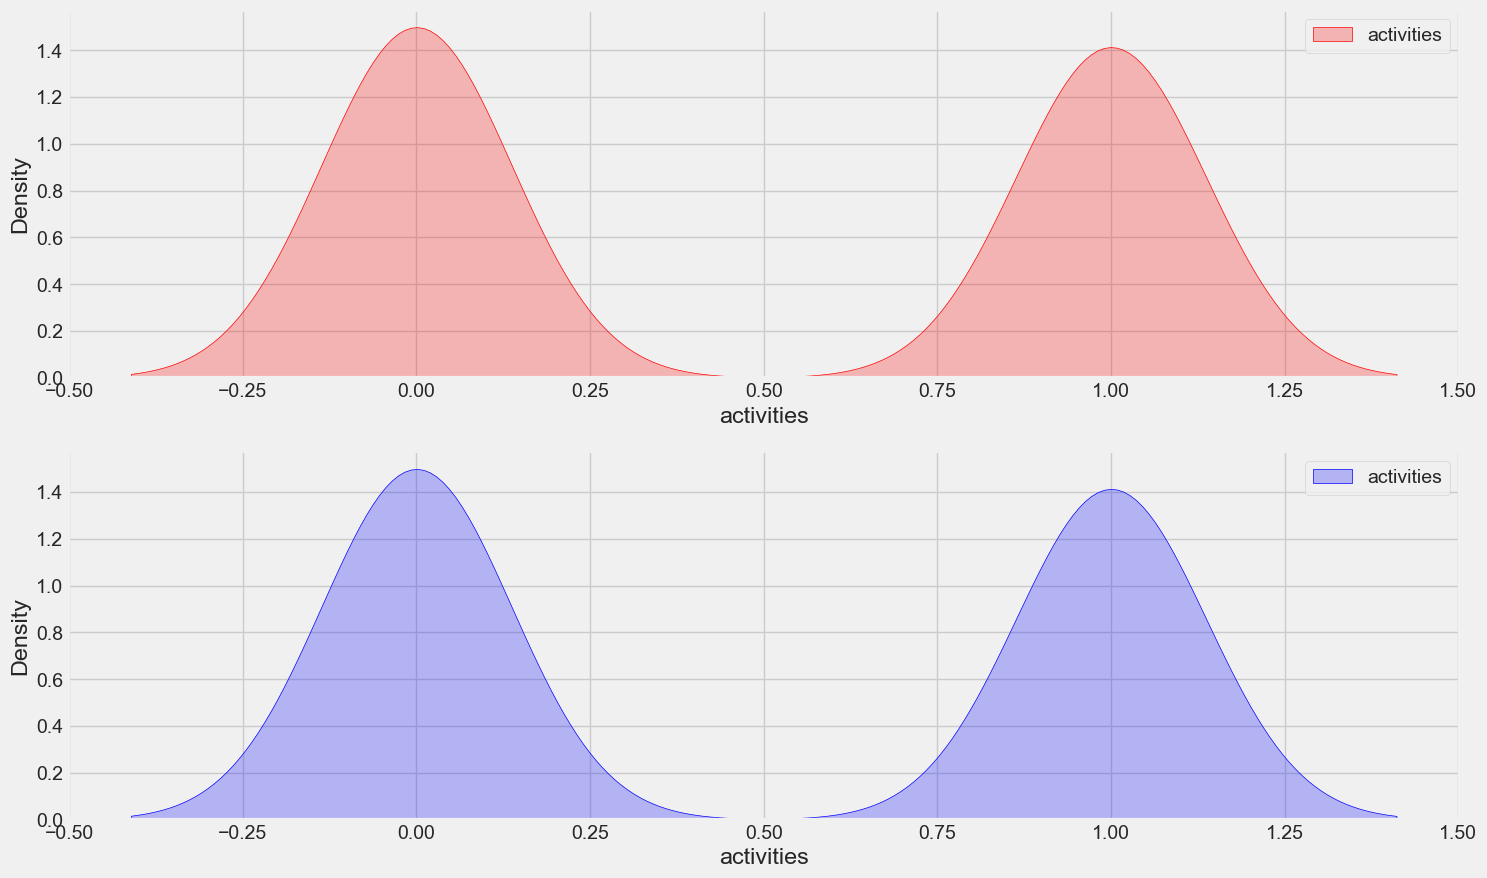

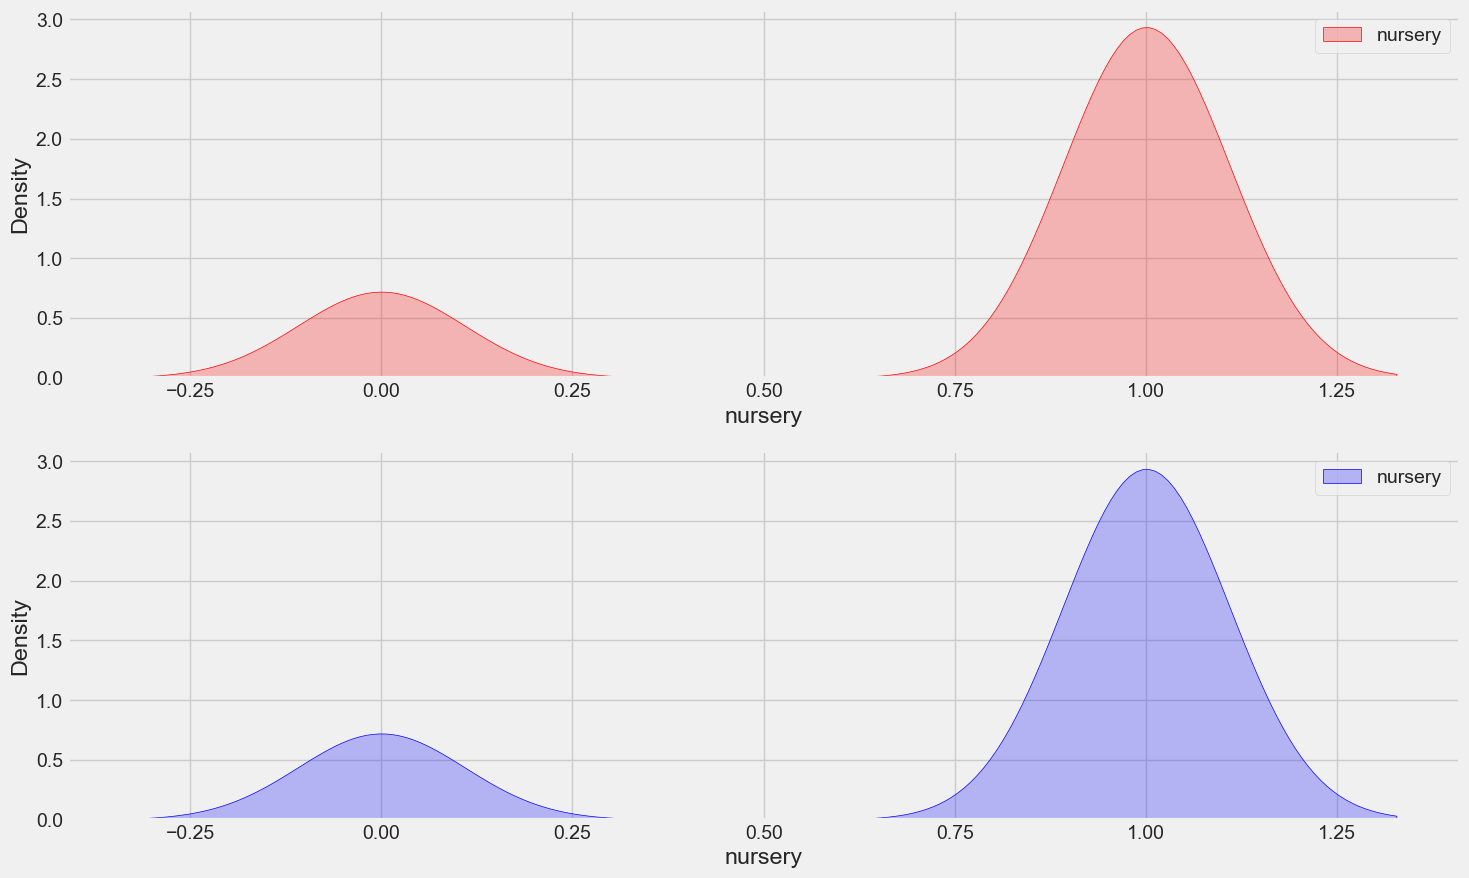

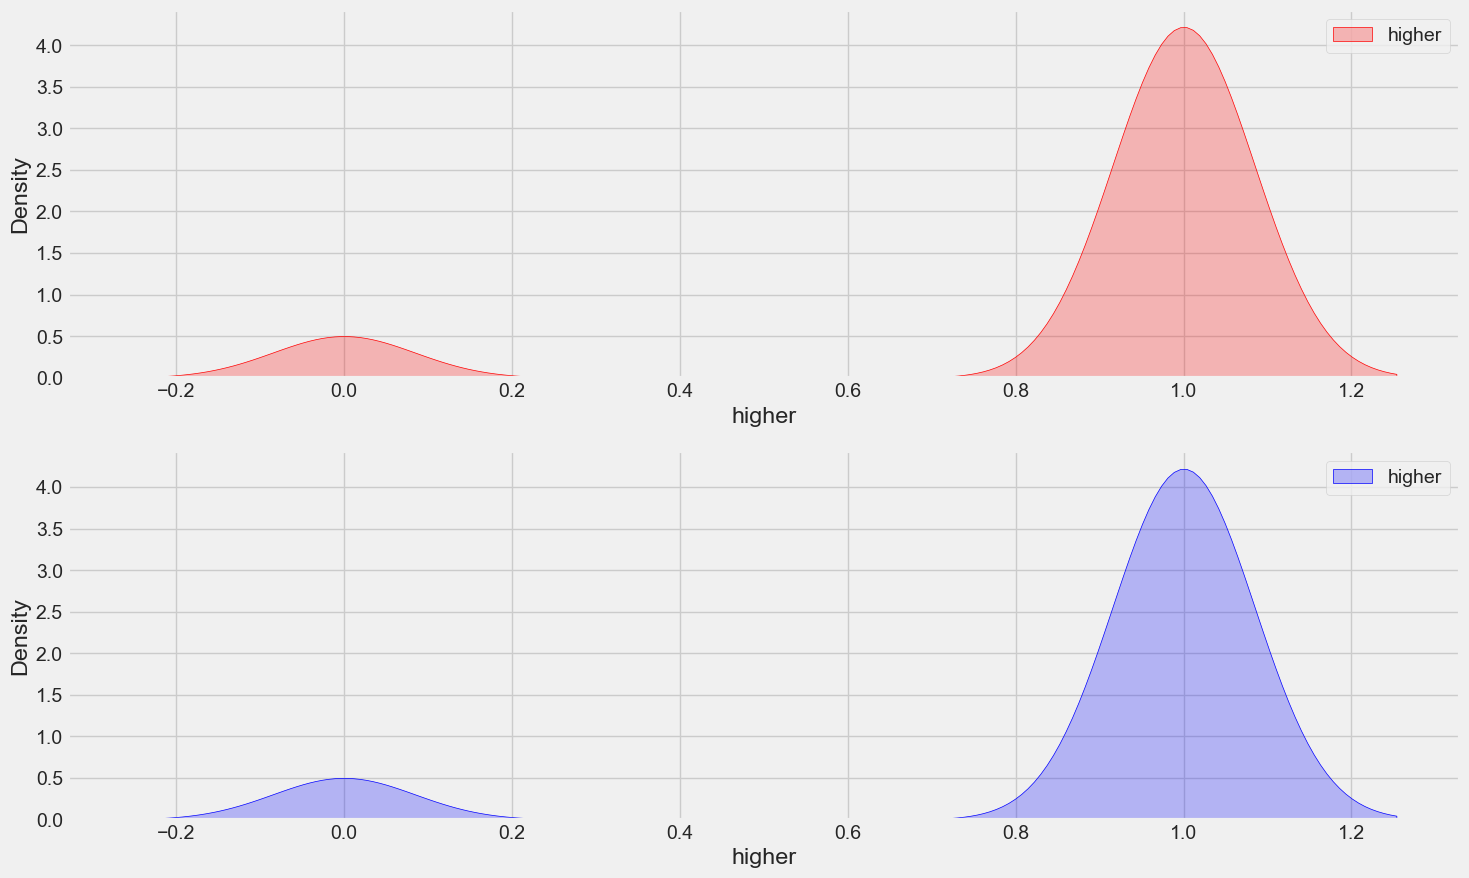

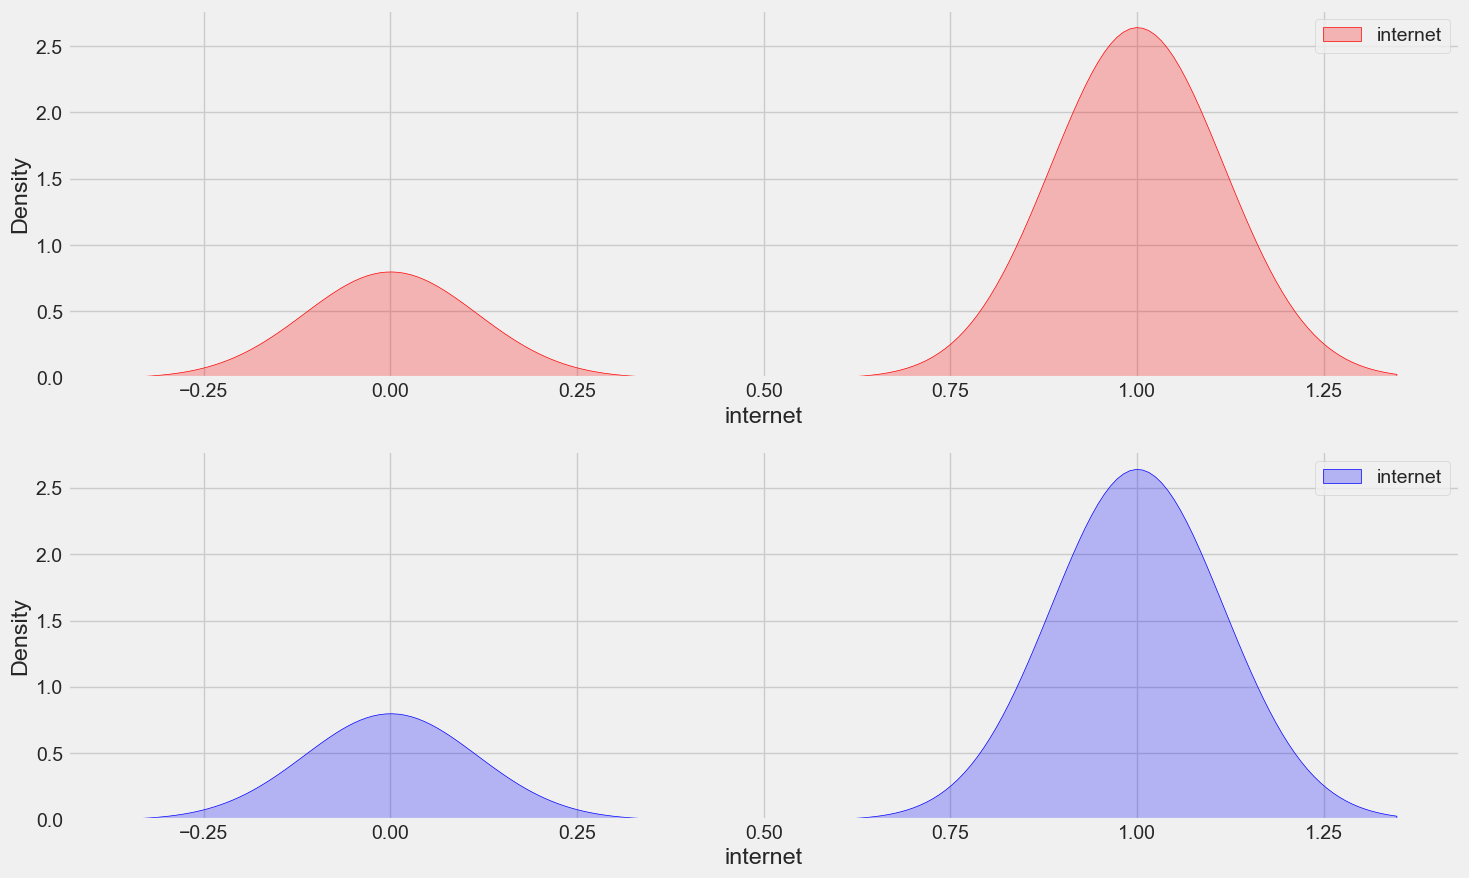

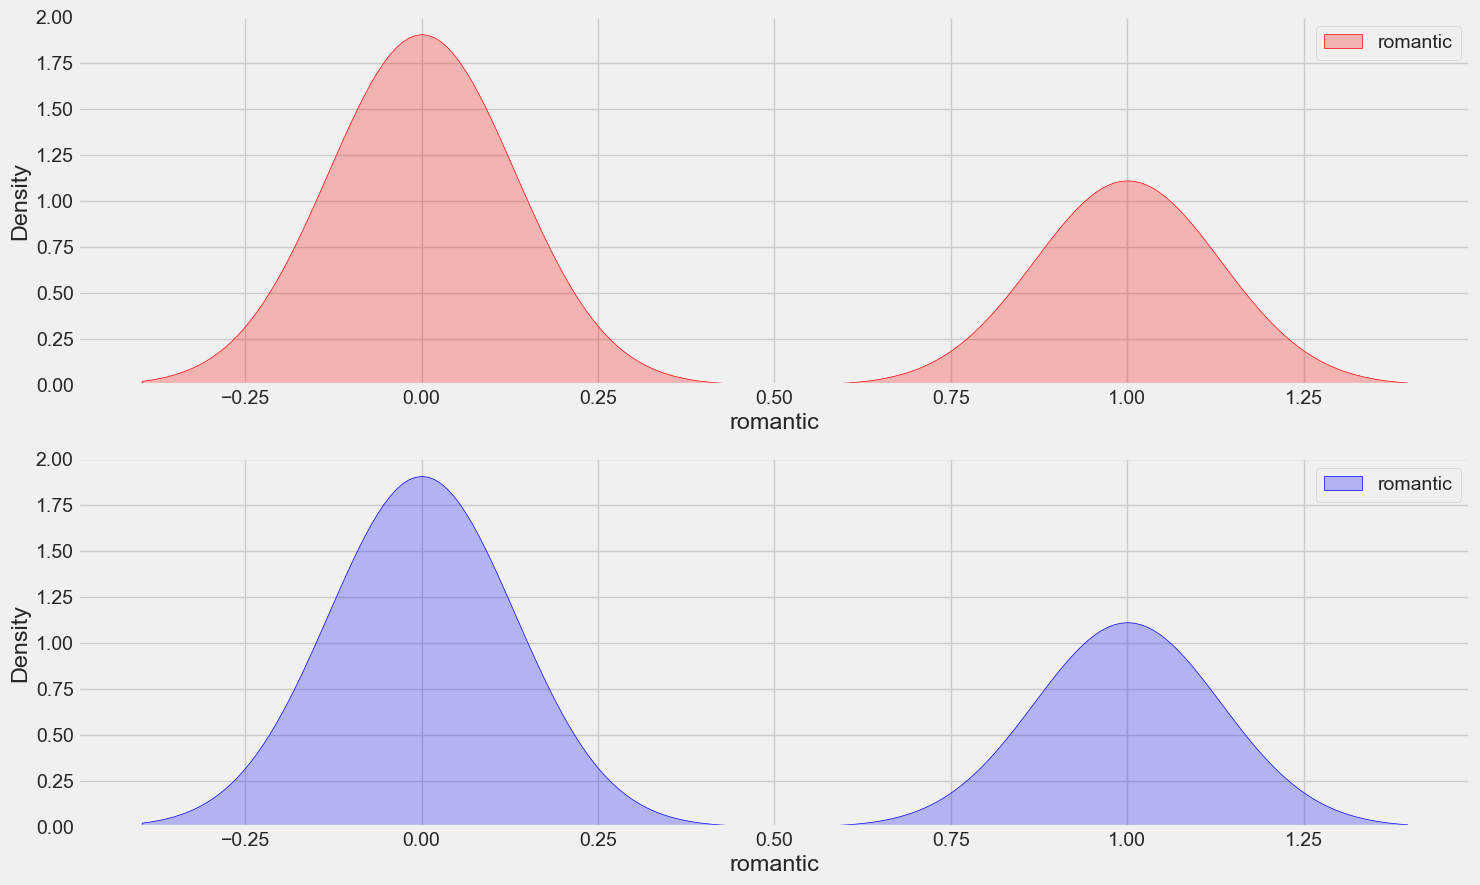

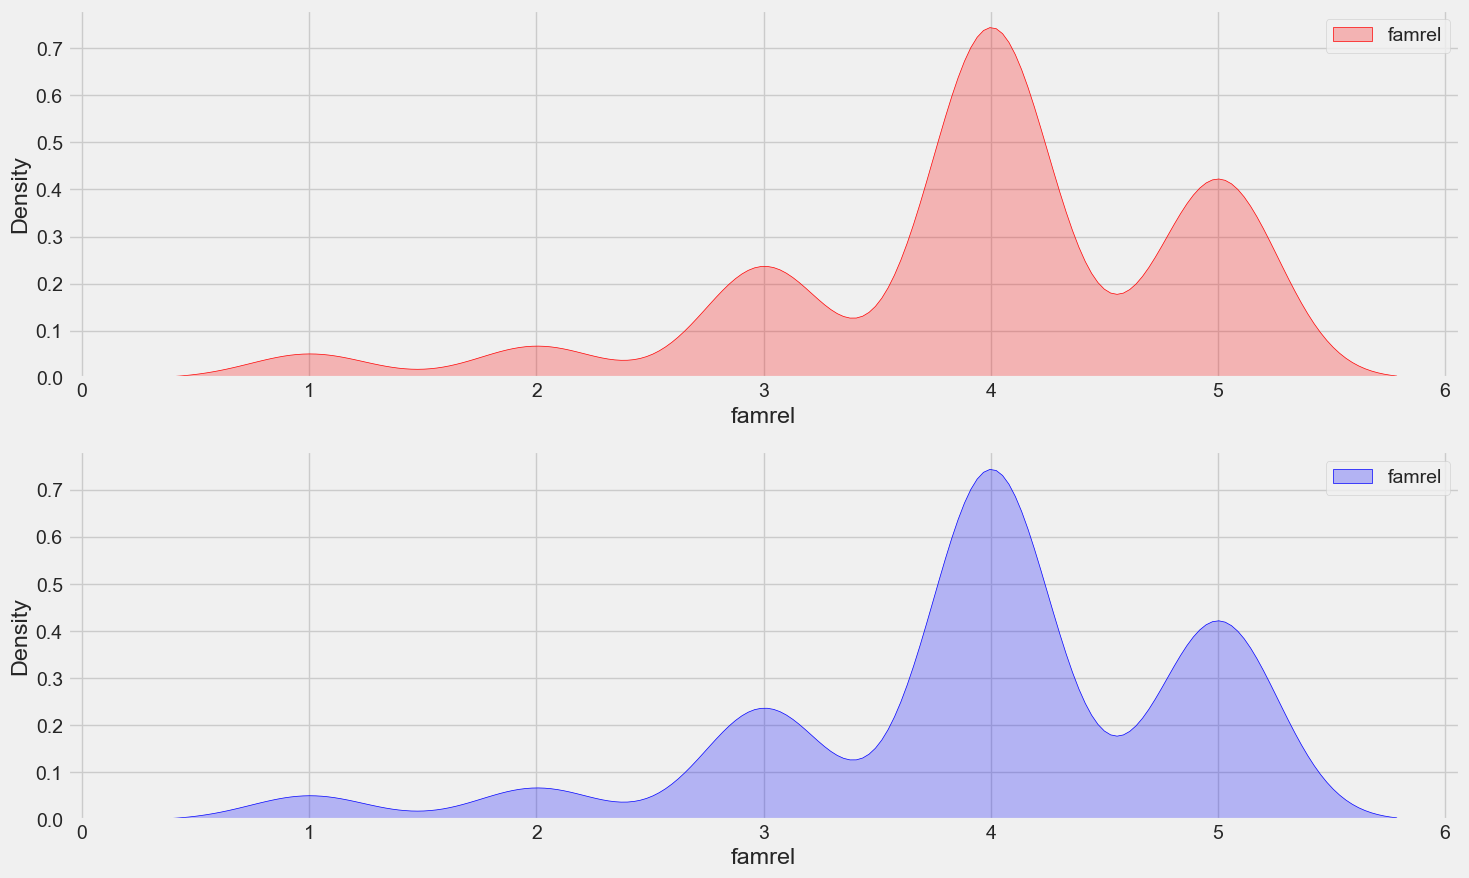

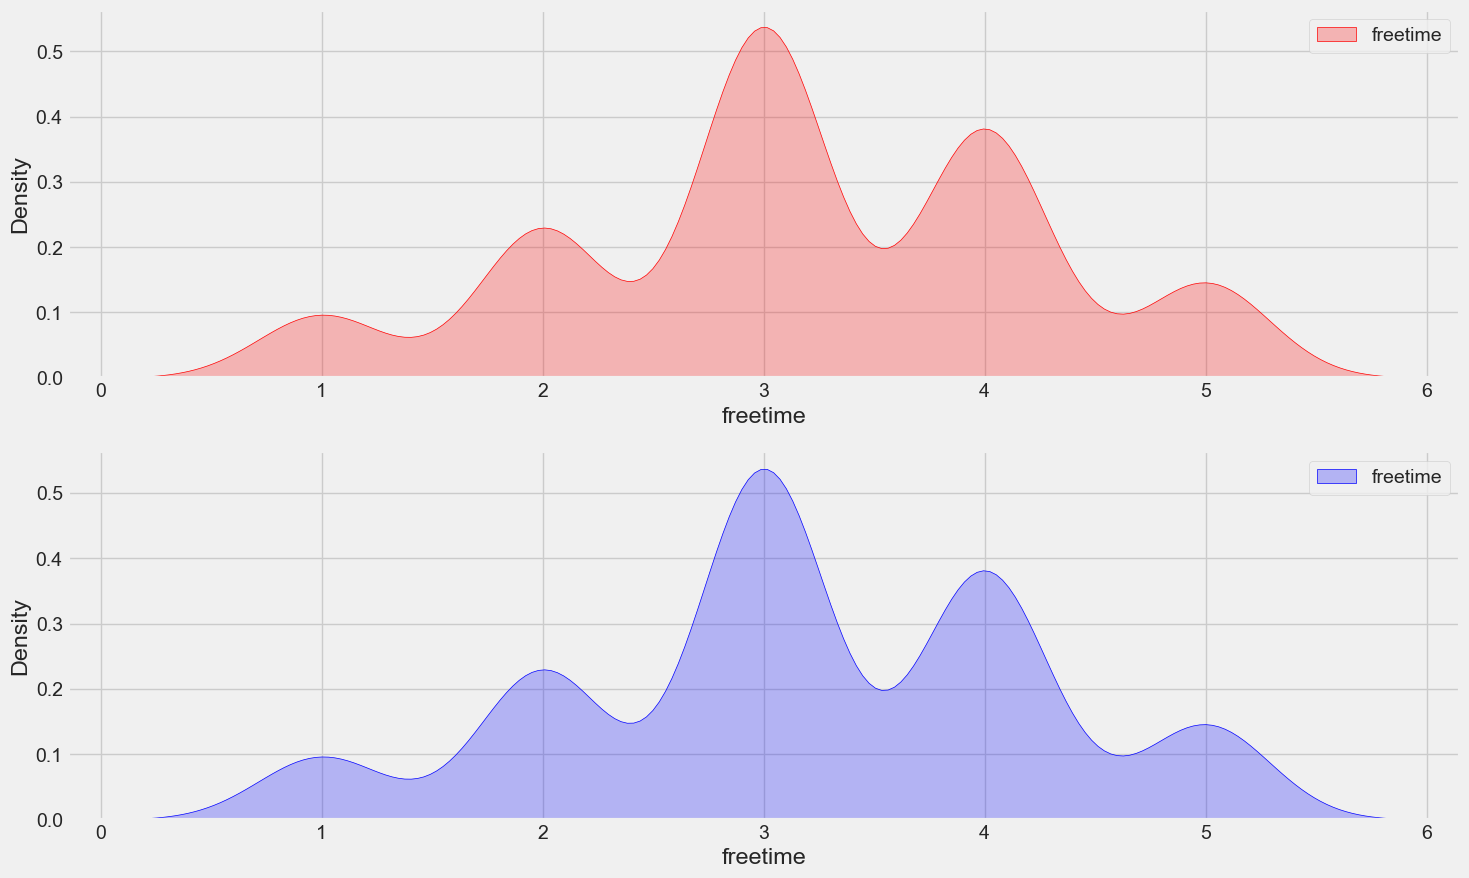

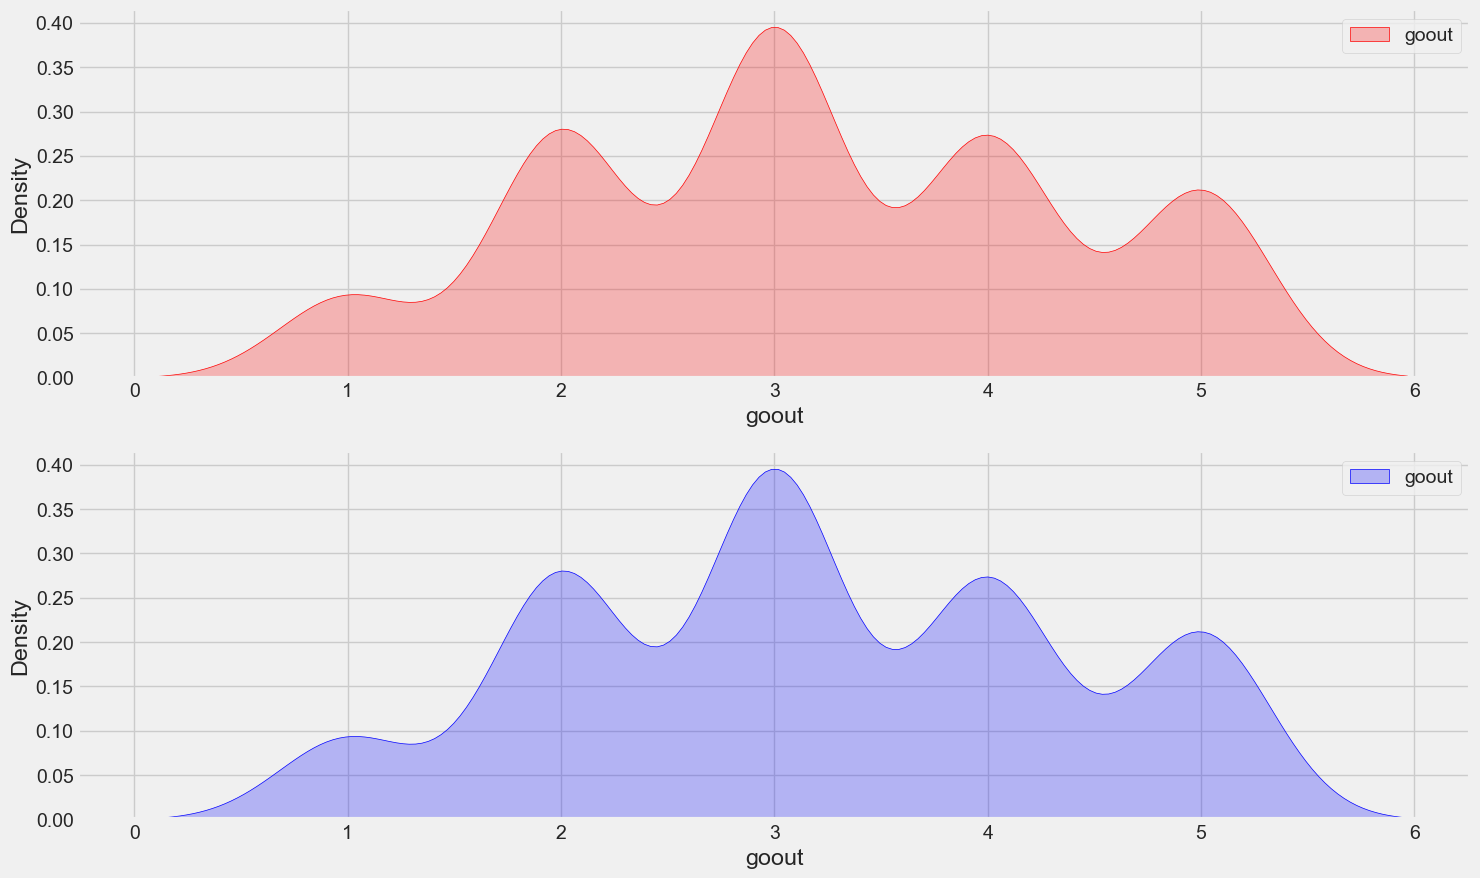

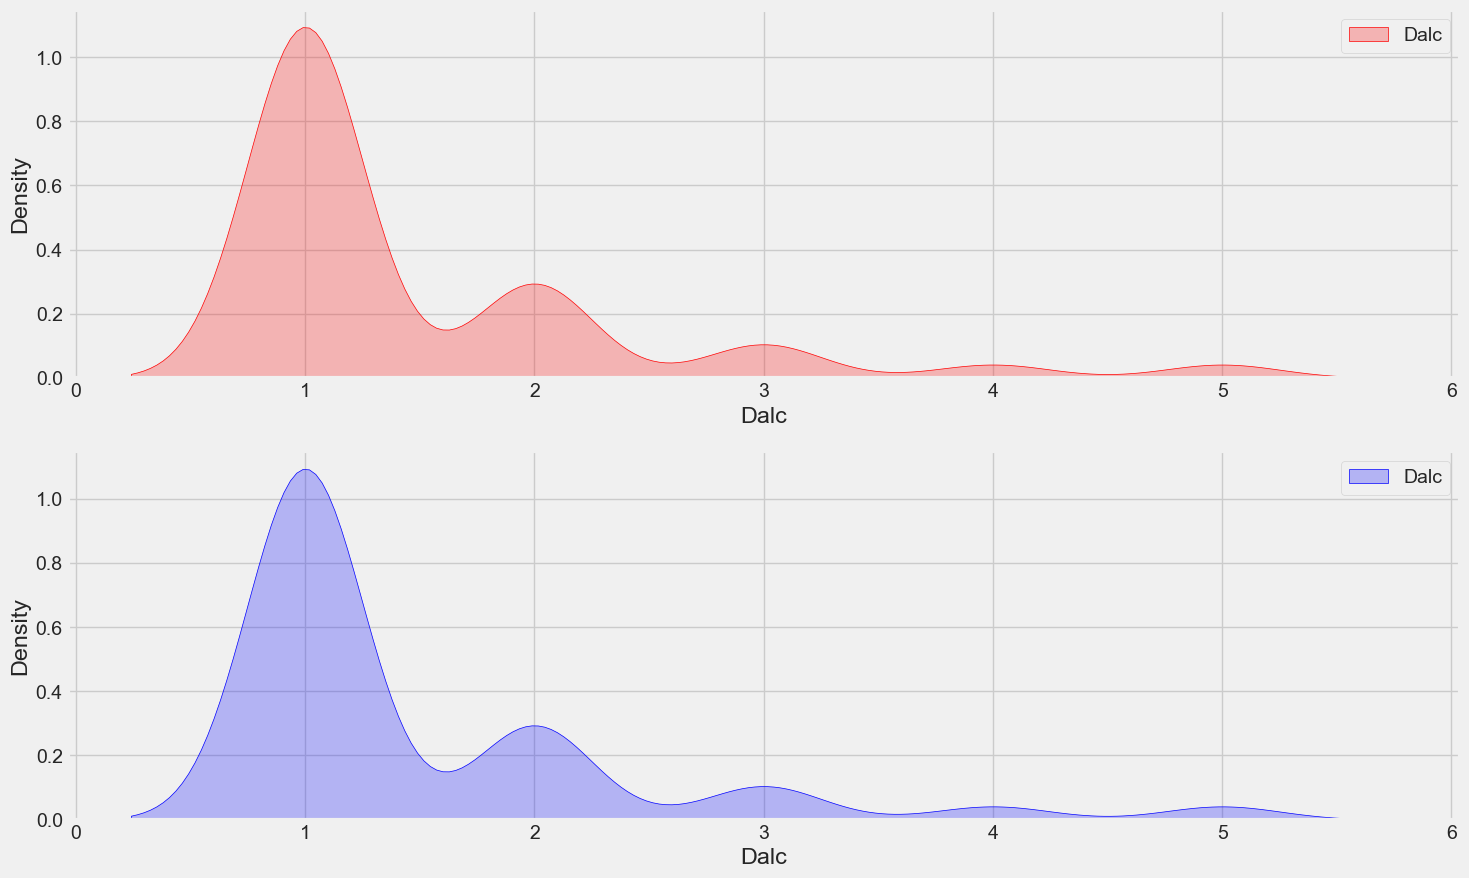

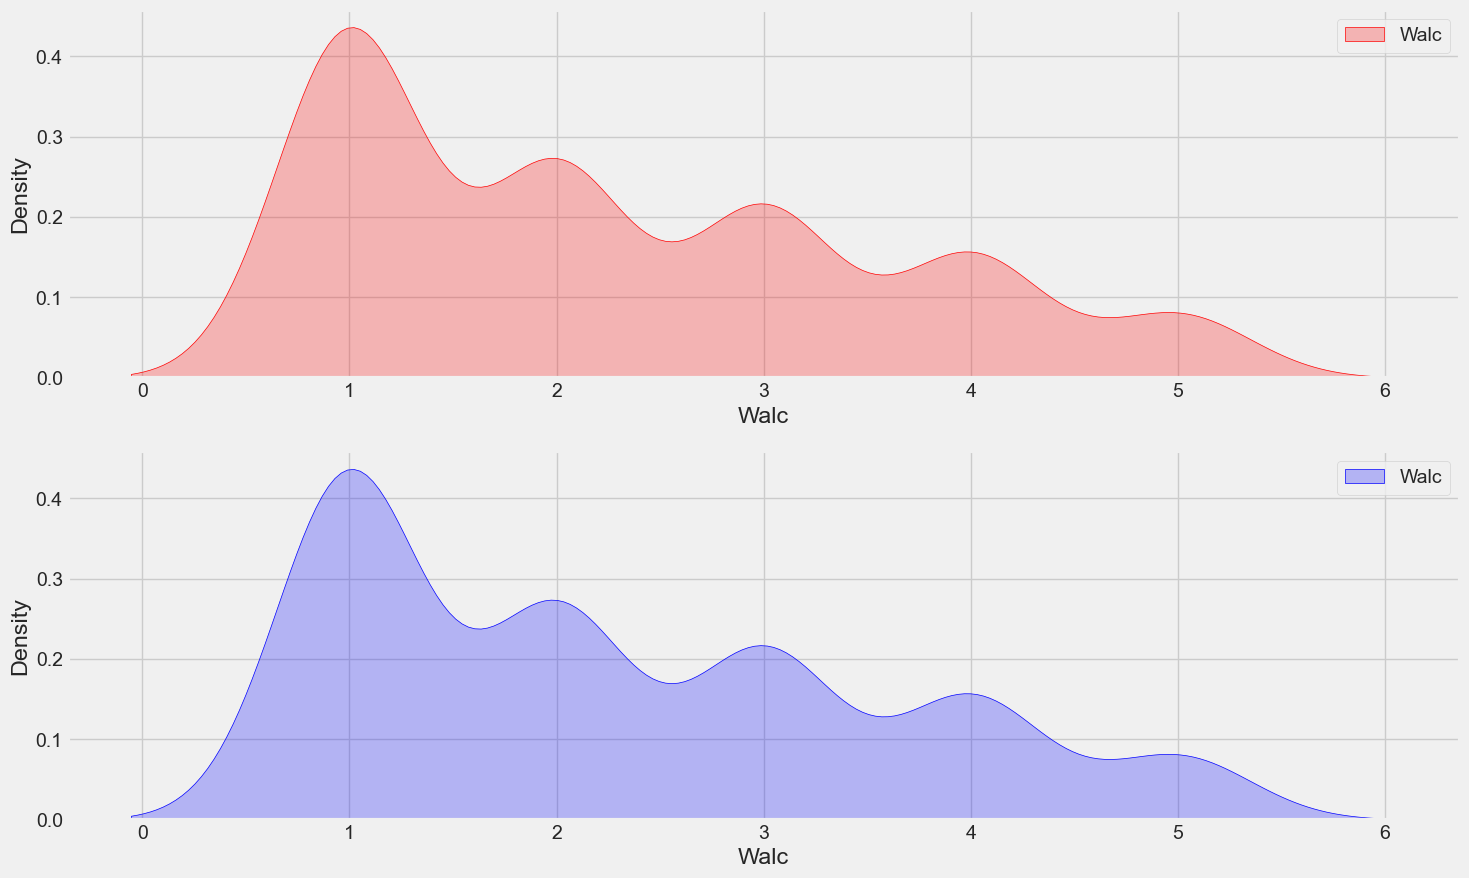

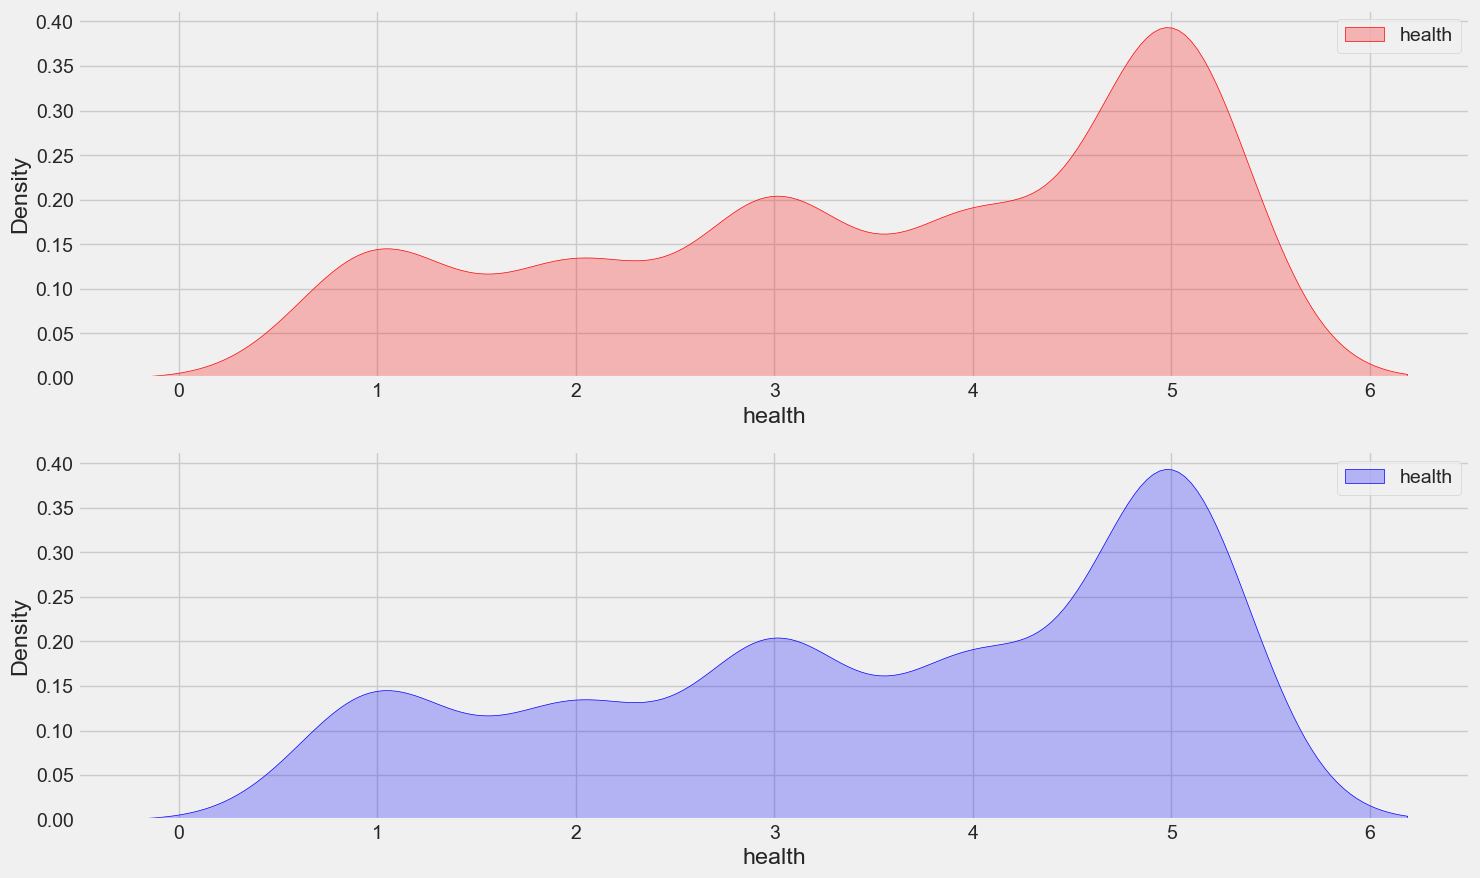

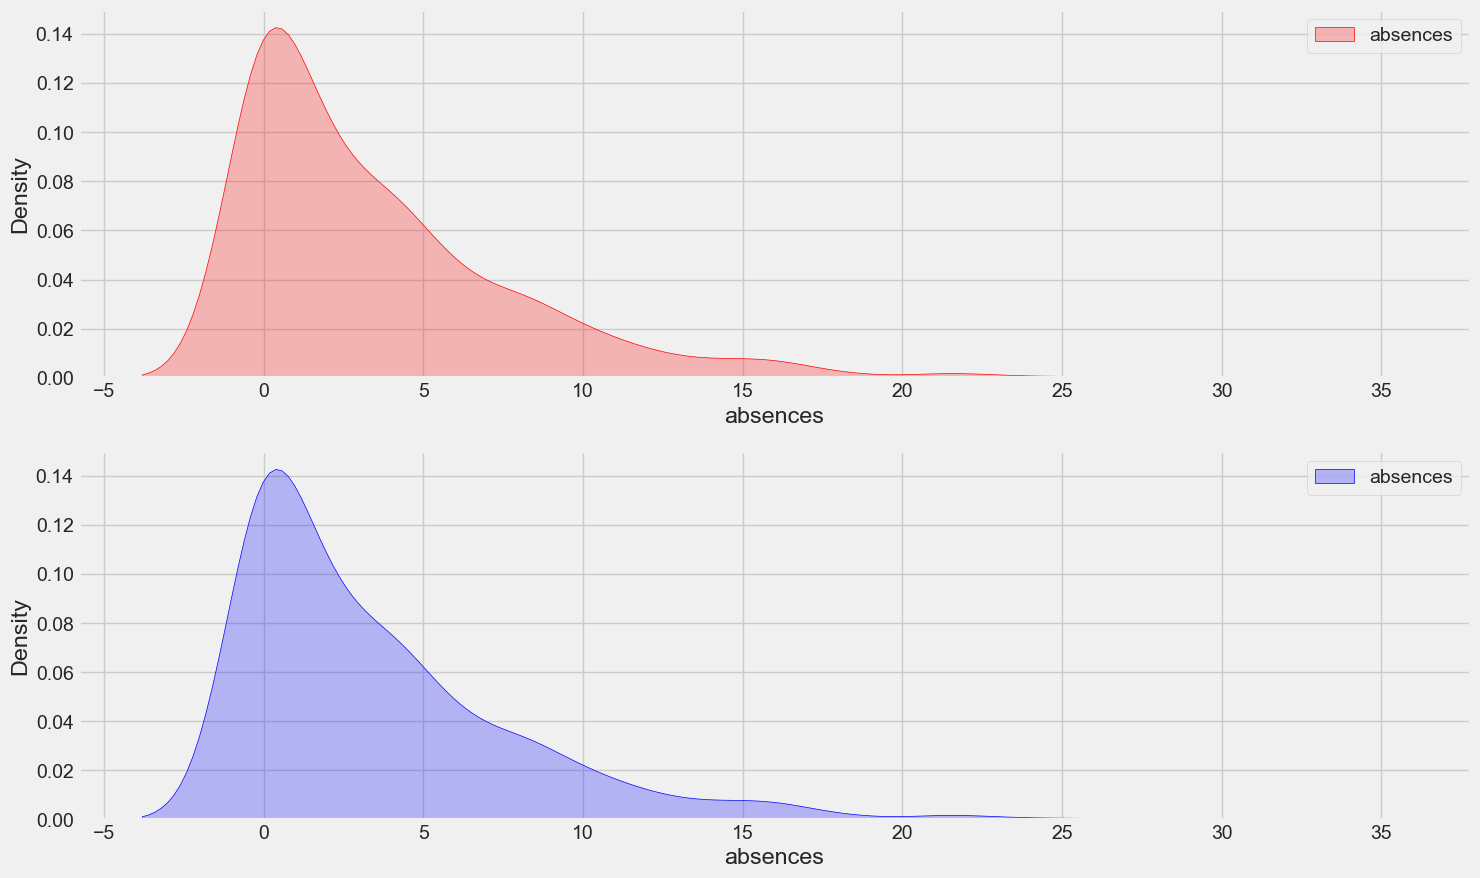

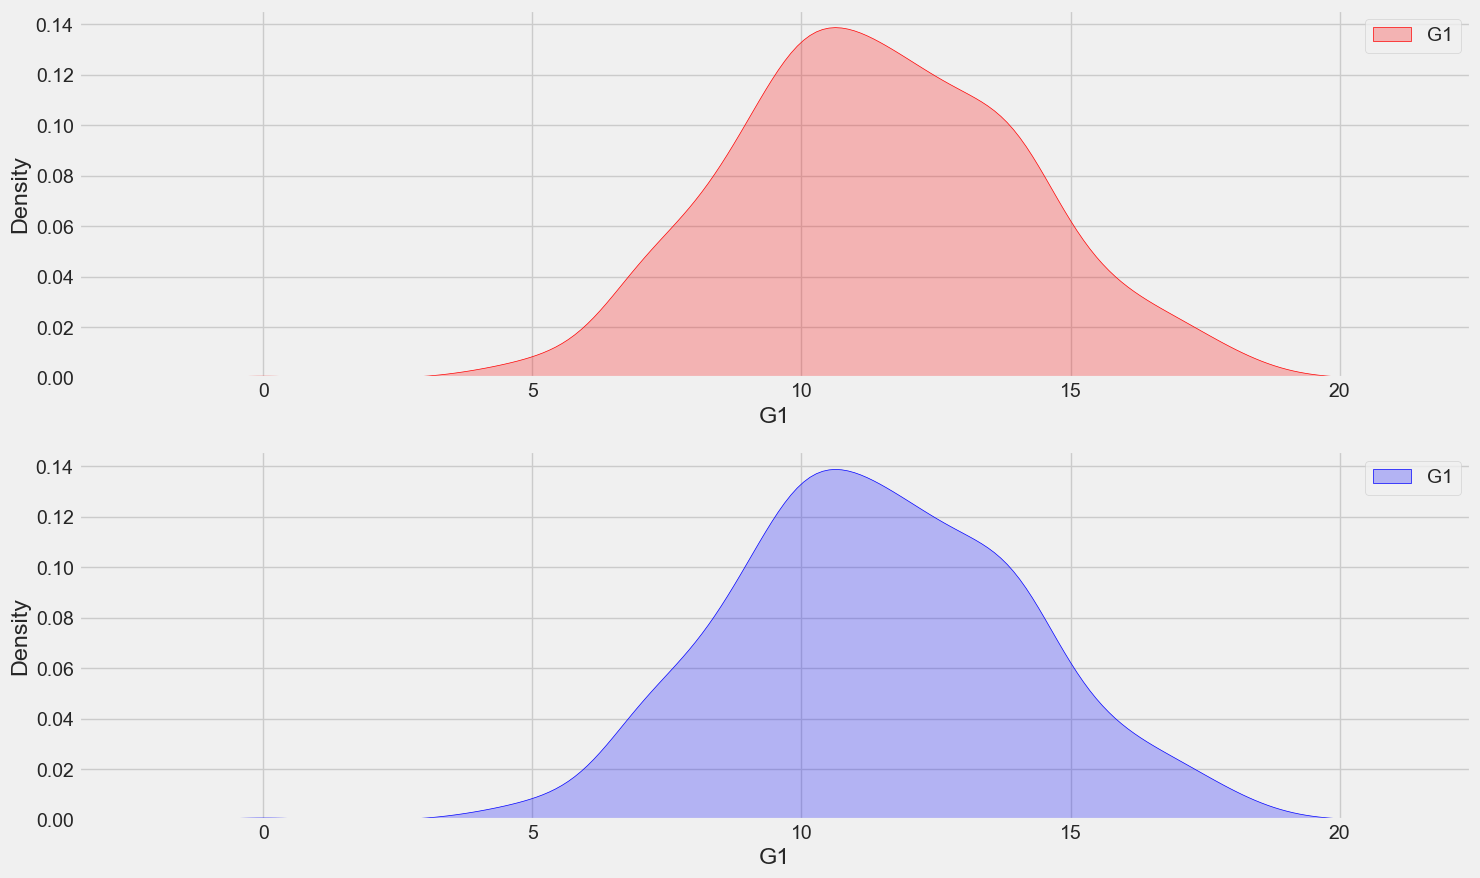

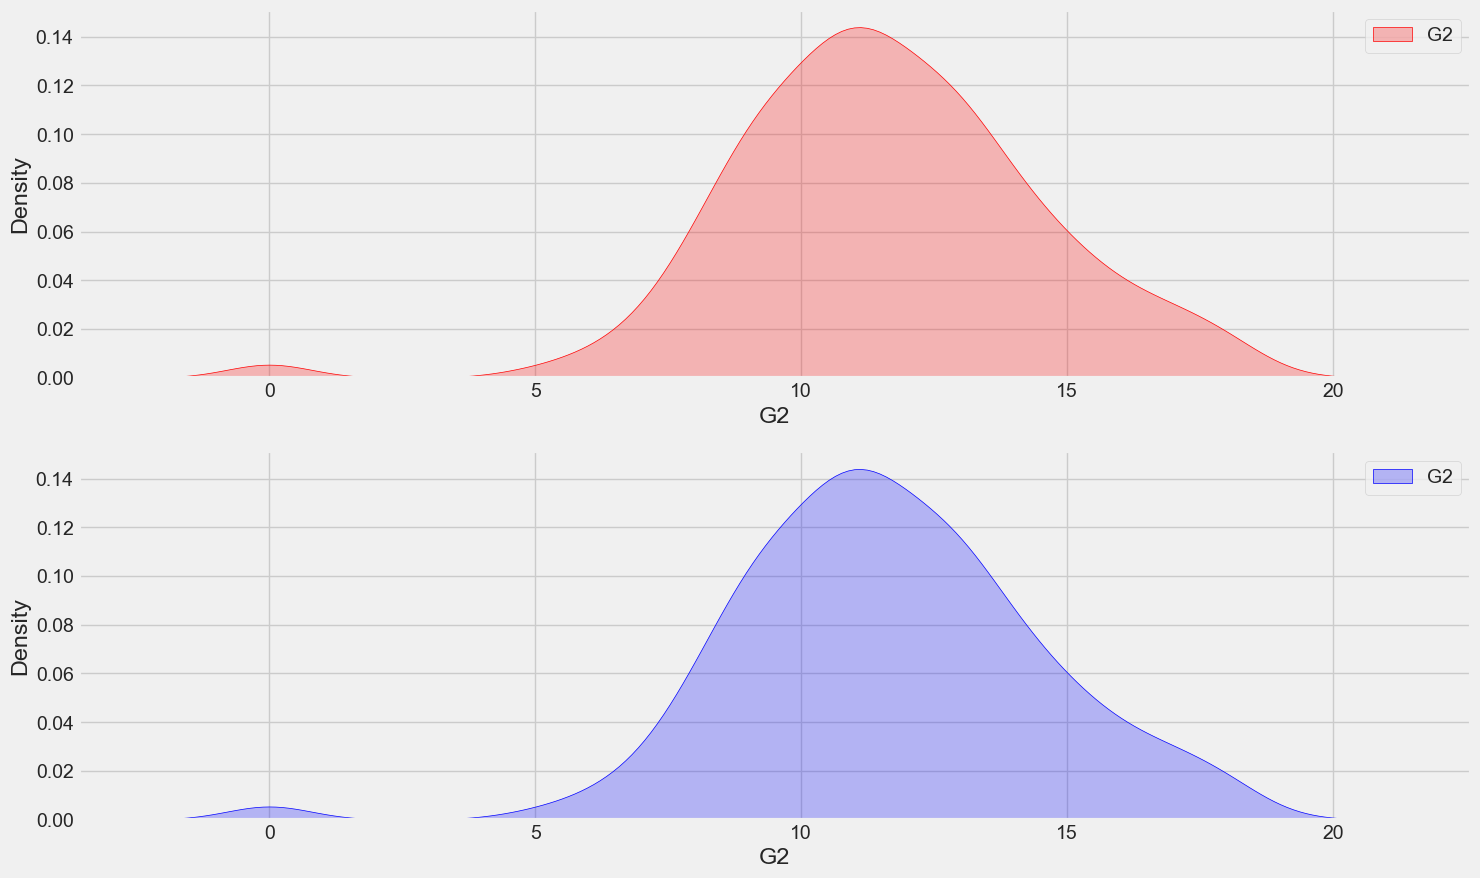

In [61]:
all_columns = df.columns.tolist()

for column in all_columns:
       if df[column].dtype.name == 'category':
        df[column] = df[column].astype('int')


for column in all_columns:
    if column != 'G3':
        ax1 = plt.subplot(211)
        sns.kdeplot(df[column], color = 'r', fill = True)
        plt.xlabel(column)
        plt.legend([column])

        ax2 = plt.subplot(212)
        sns.kdeplot(df[column], color = 'b', fill = True)
        plt.xlabel(column)
        plt.legend([column])

        plt.show()


# <span style="color:BLUE">ΣΥΝΤΕΛΕΣΤΗΣ ΣΥΣΧΕΤΙΣΗΣ

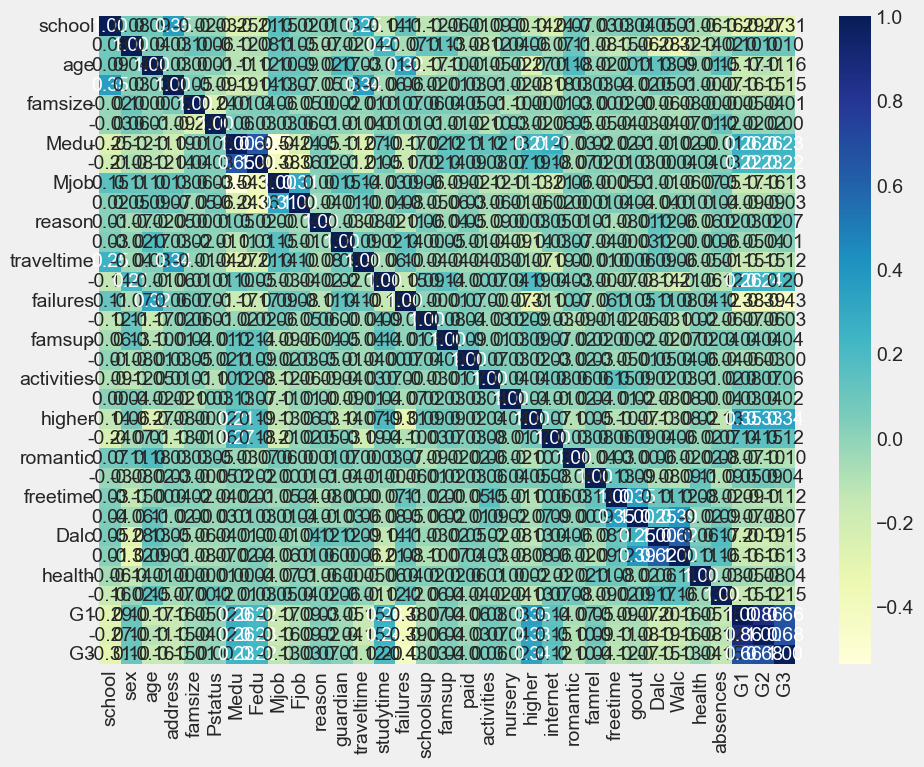

In [62]:
#πίνακας συσχέτισης
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='YlGnBu')

plt.show()

# <span style="color:blue">ΜΕΘΟΔΟΣ ΚΝΝ

<span style="color:blue">K-Nearest Neighbors (KNN) 

In [84]:
df.head(10)

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    1   18        0        1        1     4     4     3     0  ...   
1       0    1   17        0        1        0     1     1     3     4  ...   
2       0    1   15        0        0        0     1     1     3     4  ...   
3       0    1   15        0        1        0     4     2     1     2  ...   
4       0    1   16        0        1        0     3     3     4     4  ...   
5       0    0   16        0        0        0     4     3     2     4  ...   
6       0    0   16        0        0        0     2     2     4     4  ...   
7       0    1   17        0        1        1     4     4     4     0  ...   
8       0    0   15        0        0        1     3     2     2     4  ...   
9       0    0   15        0        1        0     3     4     4     4  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         3      4     1     1       3         4   0  11   1  
1       5         3      3     1     1       3         2   9  11   1  
2       4         3      2     2     3       3         6  12  13   1  
3       3         2      2     1     1       5         0  14  14   1  
4       4         3      2     1     2       5         0  11  13   1  
5       5         4      2     1     2       5         6  12  12   1  
6       4         4      4     1     1       3         0  13  12   1  
7       4         1      4     1     1       1         2  10  13   1  
8       4         2      2     1     1       1         0  15  16   1  
9       5         5      1     1     1       5         0  12  12   1  

[10 rows x 33 columns]

In [85]:
X = df.iloc[:, :-1]

X.sample(5)

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
268       0    0   17        1        0        1     4     4     0     4  ...   
507       1    1   17        0        0        0     1     1     4     2  ...   
607       1    1   17        1        0        1     2     1     2     4  ...   
419       0    0   19        0        1        0     2     1     4     4  ...   
336       0    0   18        0        1        0     4     2     0     4  ...   

     romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  
268         0       3         3      3     2     3       4         0  12  12  
507         1       4         3      3     1     1       3         0  11  11  
607         1       5         3      3     1     2       2         5  11  11  
419         0       5         3      4     1     4       4        10   7  11  
336         1       4         3      2     1     4       5         2  15  16  

[5 rows x 32 columns]

In [86]:
y = df['G3']

y.sample(5)

90     1
216    1
475    1
588    0
319    1
Name: G3, dtype: int64

In [87]:
X = StandardScaler().fit_transform(X.astype(float))
X = MaxAbsScaler().fit_transform(X.astype(float))  
X = MinMaxScaler().fit_transform(X.astype(float))  

print(X[:1])

[[0.         1.         0.42857143 0.         1.         1.
  1.         1.         0.75       0.         0.         0.
  0.33333333 0.33333333 0.         1.         0.         0.
  0.         1.         1.         0.         0.         0.75
  0.5        0.75       0.         0.         0.5        0.125
  0.         0.57894737]]


In [88]:
(X.max() - X.min())

1.0000000000000002

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

In [90]:
knn = KNeighborsClassifier(n_neighbors=5)

In [91]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [92]:
y_pred = knn.predict(X_test)

In [93]:
accuracy = accuracy_score(y_test, y_pred)

In [94]:
print(f"Η ακρίβεια του KNN είναι {accuracy*100:.2f}%")

Η ακρίβεια του KNN είναι 72.65%


<span style="color:blue">Ένταξη μιας νέας παρατήρησης στο KNN για την πρόβλεψη της κλάσης της

In [74]:
df_without_target = df.drop(columns=['G3'])

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

new_row = []
for column in df_without_target.columns:
    min_val = int(df_without_target[column].min())
    max_val = int(df_without_target[column].max())
    new_row.append(np.random.randint(min_val, max_val+1))

new_observation = np.array(new_row).reshape(1, -1)

new_observation = StandardScaler().fit_transform(new_observation)
new_observation = MaxAbsScaler().fit_transform(new_observation)
new_observation = MinMaxScaler().fit_transform(new_observation)

prediction = knn.predict(new_observation)

print(f"Η νέα παρατήρηση είναι {new_row}")
print(f"Η πρόβλεψη για τη νέα παρατήρηση είναι {prediction}")

Η νέα παρατήρηση είναι [0, 0, 21, 0, 1, 1, 1, 0, 3, 0, 2, 1, 4, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 5, 5, 1, 5, 5, 8, 2, 16]
Η πρόβλεψη για τη νέα παρατήρηση είναι [1]


<span style="color:blue">Πιθανότητες κάθε κλάσης για κάθε δείγμα και εισαγωγή σε ένα DataFrame

In [75]:
probabilities = knn.predict_proba(X)

indices = np.where(np.max(probabilities, axis=1) != 1)

for i in indices[0]:
    print(f"Sample {i}:")
    print(X[i])
    print(f"Predicted probabilities: {probabilities[i]}")
    print("\n")

Sample 0:
[0.         1.         0.42857143 0.         1.         1.
 1.         1.         0.75       0.         0.         0.
 0.33333333 0.33333333 0.         1.         0.         0.
 0.         1.         1.         0.         0.         0.75
 0.5        0.75       0.         0.         0.5        0.125
 0.         0.57894737]
Predicted probabilities: [0.2 0.8]


Sample 2:
[0.         1.         0.         0.         0.         0.
 0.25       0.25       0.75       1.         1.         0.
 0.         0.33333333 0.         1.         0.         0.
 0.         1.         1.         1.         0.         0.75
 0.5        0.25       0.25       0.5        0.5        0.1875
 0.63157895 0.68421053]
Predicted probabilities: [0.2 0.8]


Sample 4:
[0.         1.         0.14285714 0.         1.         0.
 0.75       0.75       1.         1.         0.66666667 0.5
 0.         0.33333333 0.         0.         1.         0.
 0.         1.         1.         0.         0.         0.75
 0.5    

<span style="color:blue">Πιθανότητες κάθε κλάσης για κάθε δείγμα

In [77]:
X = df.iloc[:, :-1].values
y = df['G3'].values

probabilities = knn.predict_proba(X)

indices = np.where(np.max(probabilities, axis=1) != 1)

results_df = pd.DataFrame(columns=["Sample"] + list(df.drop(columns=['G3']).columns) + ["Predicted Probabilities"])


for i in indices[0]:
     results_df.loc[len(results_df)] = [i] + list(X[i]) + [probabilities[i]]


print(results_df)

     Sample  school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  \
0         0       0    1   18        0        1        1     4     4     3   
1         1       0    1   17        0        1        0     1     1     3   
2         2       0    1   15        0        0        0     1     1     3   
3         5       0    0   16        0        0        0     4     3     2   
4        11       0    1   15        0        1        0     2     1     2   
..      ...     ...  ...  ...      ...      ...      ...   ...   ...   ...   
497     644       1    1   19        1        1        0     2     3     2   
498     645       1    1   18        0        0        0     3     1     0   
499     646       1    1   18        0        1        0     1     1     4   
500     647       1    0   17        0        0        0     3     1     2   
501     648       1    0   18        1        0        0     3     2     2   

     ...  famrel  freetime  goout  Dalc  Walc  health  absences

<span style="color:BLUE">Υπολογισμός και Εκτύπωση

In [78]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Ακρίβεια: {accuracy*100:.2f}%")

recall = recall_score(y_test, y_pred)
print(f"Ανάκληση: {recall*100:.2f}%")

f1 = f1_score(y_test, y_pred)
print(f"Ακρίβεια F1: {f1*100:.2f}%")

roc_auc = roc_auc_score(y_test, y_pred)
print(f"Περιοχή κάτω από την καμπύλη ROC: {roc_auc*100:.2f}%")

Ακρίβεια: 72.65%
Ανάκληση: 94.33%
Ακρίβεια F1: 82.72%
Περιοχή κάτω από την καμπύλη ROC: 58.90%


<span style="color:BLUE">Βέλτιστη Τιμή K για τον Ταξινομητή KNN μέσω Επαναληπτικής Δοκιμής

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

accuracies = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    accuracies.append(accuracy)

for i, accuracy in enumerate(accuracies, start=1):
    print(f"Ακρίβεια για K={i}: {accuracy*100:.2f}%")

best_k = accuracies.index(max(accuracies)) + 1
print(f"\nΗ καλύτερη τιμή για το K είναι {best_k} με ακρίβεια {max(accuracies)*100:.2f}%")

Ακρίβεια για K=1: 69.23%
Ακρίβεια για K=2: 66.67%
Ακρίβεια για K=3: 72.31%
Ακρίβεια για K=4: 71.97%
Ακρίβεια για K=5: 72.65%
Ακρίβεια για K=6: 72.65%
Ακρίβεια για K=7: 71.11%
Ακρίβεια για K=8: 72.31%
Ακρίβεια για K=9: 71.45%
Ακρίβεια για K=10: 71.79%
Ακρίβεια για K=11: 71.11%
Ακρίβεια για K=12: 71.45%
Ακρίβεια για K=13: 71.28%
Ακρίβεια για K=14: 71.97%
Ακρίβεια για K=15: 70.60%
Ακρίβεια για K=16: 71.11%
Ακρίβεια για K=17: 70.60%
Ακρίβεια για K=18: 70.09%
Ακρίβεια για K=19: 69.74%
Ακρίβεια για K=20: 70.26%

Η καλύτερη τιμή για το K είναι 5 με ακρίβεια 72.65%


# <span style="color:BLUE">ΔΙΑΓΡΑΜΜΑΤΑ ΚΝΝ (test_size=0.9)

 <span style="color:BLUE">Confusion Matrix

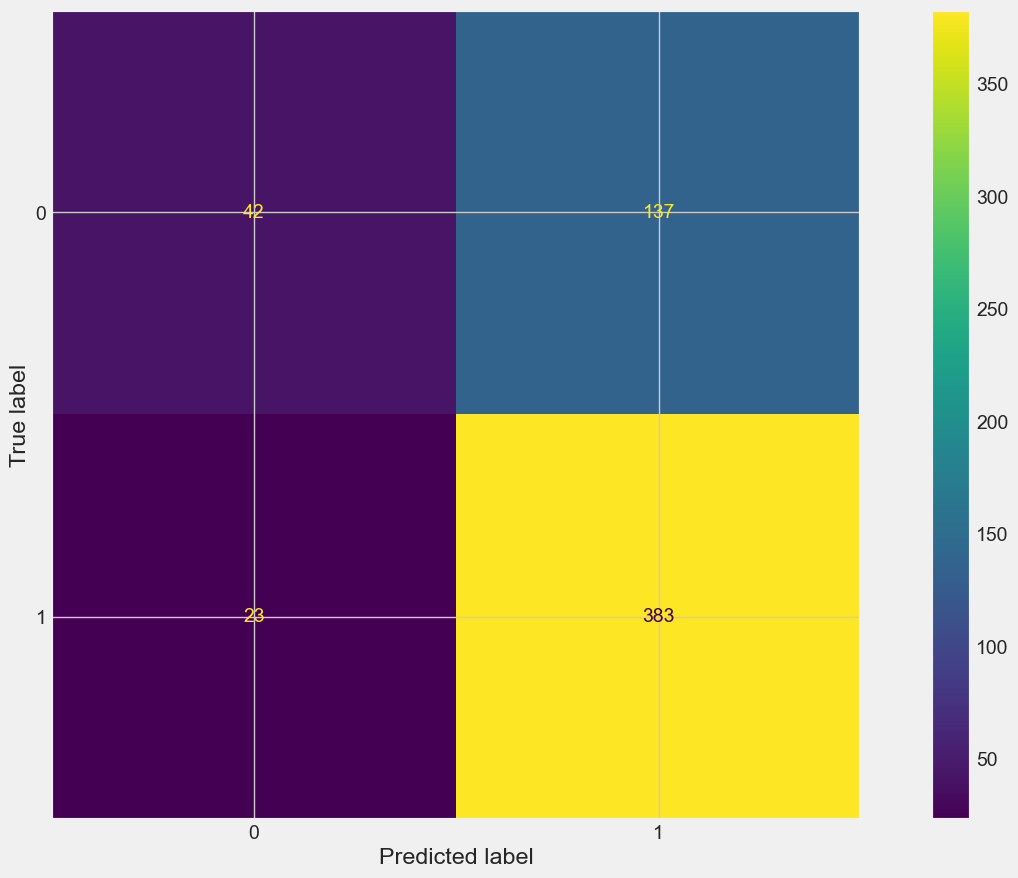

In [80]:
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

<span style="color:BLUE">Οπτικοποίηση Ακρίβειας KNN για Διάφορες Τιμές Κ

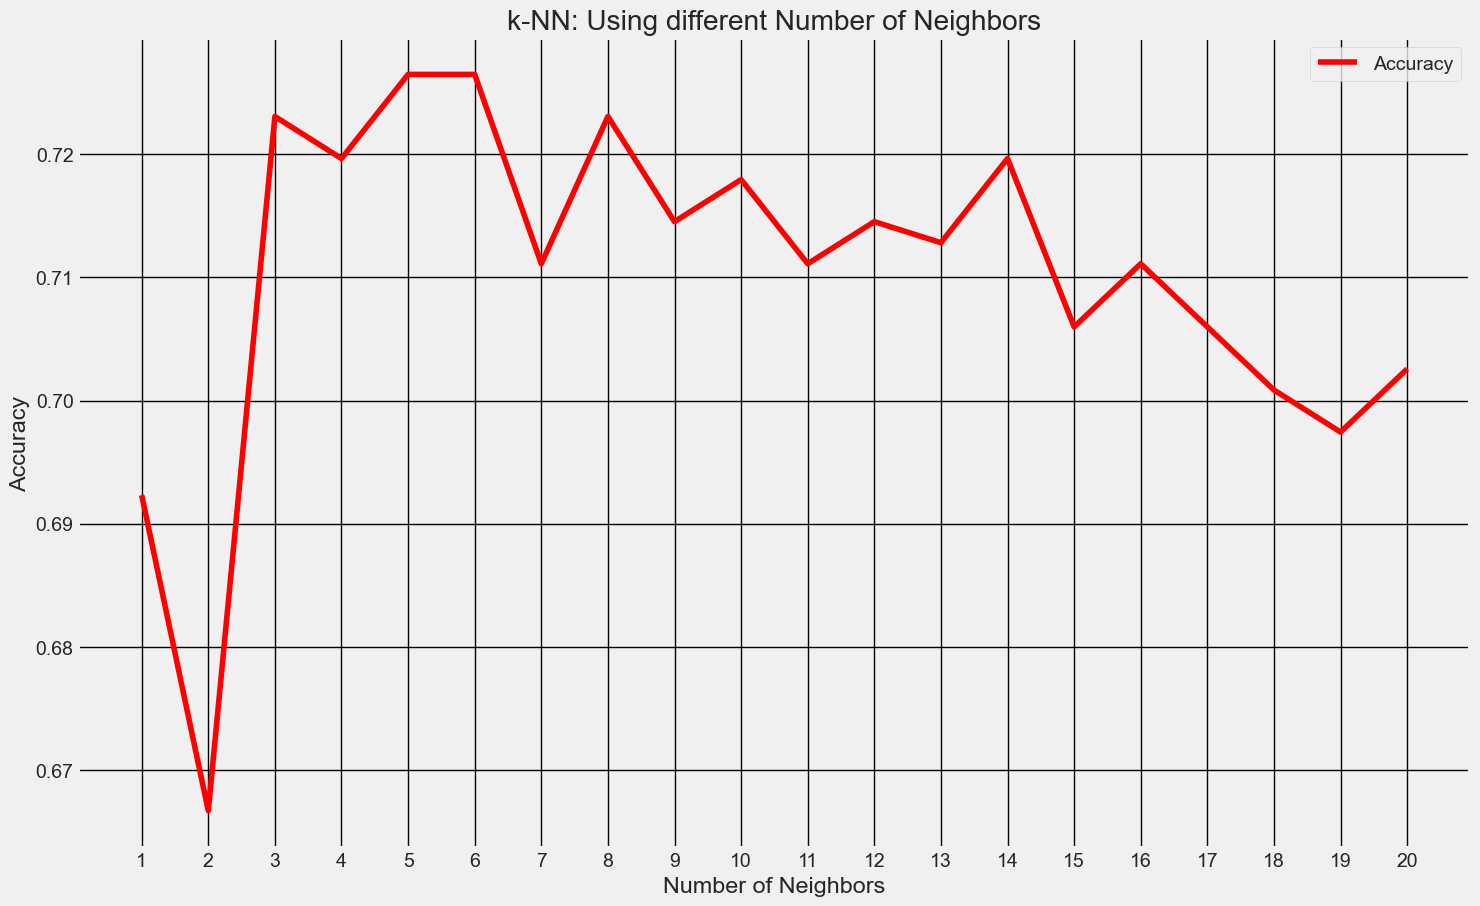

In [99]:
accuracies = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    accuracies.append(accuracy)


neighbors = list(range(1, 21))
accuracies = accuracies  
plt.title('k-NN: Using different Number of Neighbors')
plt.plot(neighbors, accuracies, label='Accuracy', color='red')
plt.xticks(neighbors)
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')


plt.grid(color='black')

plt.show()

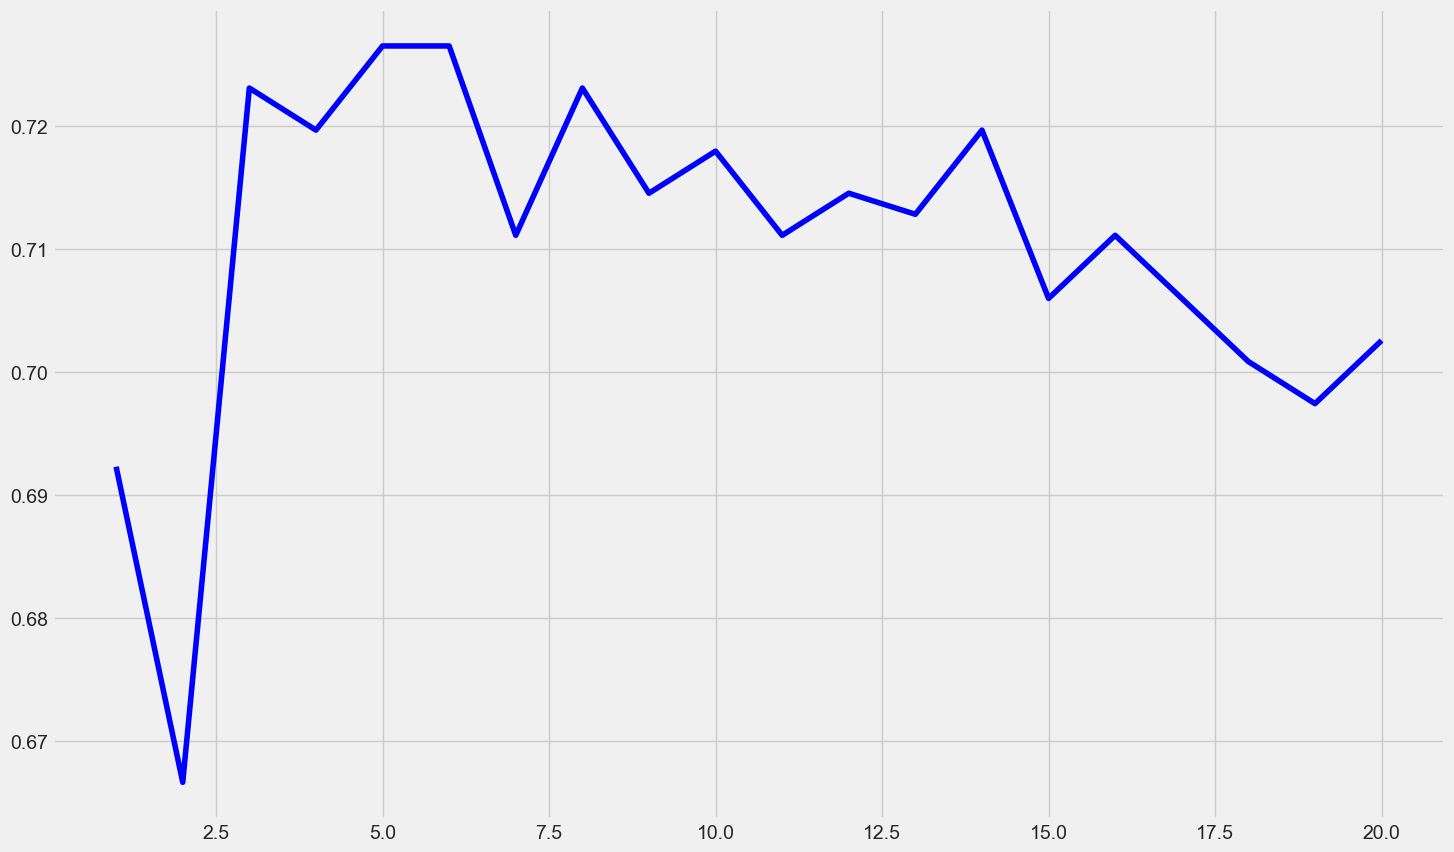

In [100]:
plt.plot(neighbors, accuracies, label='Accuracy', color='blue')
plt.show()

<span style="color:blue">Οπτικοποίηση Ορίων Απόφασης του Ταξινομητή KNN με Τυχαία Χαρακτηριστικά

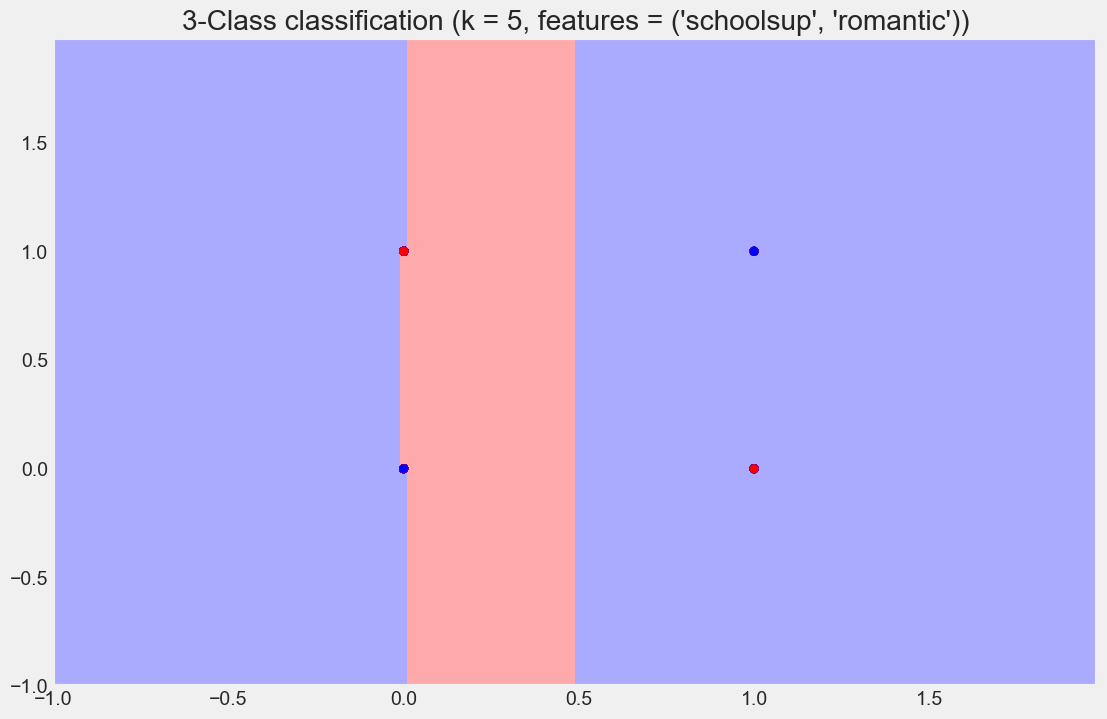

In [101]:
feature_columns = df.columns[:-1].tolist()

feature_combinations = list(combinations(feature_columns, 2))

combination = random.choice(feature_combinations)

X = df[list(combination)].values
y = df['G3'].values

h = .02 

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X, y)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(12, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"3-Class classification (k = 5, features = {combination})")

plt.show()

# <span style="color:BLUE">ΚΝΝ ΓΙΑ ΤΗΝ ΠΡΟΒΛΕΨΗ ΤΗΣ ΠΙΘΑΝΟΤΗΤΑΣ (SCI-KIT LEARN, TEST_SIZE=0.7) 

<span style="color:BLUE">(KNN) 

In [102]:
df.head(10)

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    1   18        0        1        1     4     4     3     0  ...   
1       0    1   17        0        1        0     1     1     3     4  ...   
2       0    1   15        0        0        0     1     1     3     4  ...   
3       0    1   15        0        1        0     4     2     1     2  ...   
4       0    1   16        0        1        0     3     3     4     4  ...   
5       0    0   16        0        0        0     4     3     2     4  ...   
6       0    0   16        0        0        0     2     2     4     4  ...   
7       0    1   17        0        1        1     4     4     4     0  ...   
8       0    0   15        0        0        1     3     2     2     4  ...   
9       0    0   15        0        1        0     3     4     4     4  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         3      4     1     1       3         4   0  11   1  
1       5         3      3     1     1       3         2   9  11   1  
2       4         3      2     2     3       3         6  12  13   1  
3       3         2      2     1     1       5         0  14  14   1  
4       4         3      2     1     2       5         0  11  13   1  
5       5         4      2     1     2       5         6  12  12   1  
6       4         4      4     1     1       3         0  13  12   1  
7       4         1      4     1     1       1         2  10  13   1  
8       4         2      2     1     1       1         0  15  16   1  
9       5         5      1     1     1       5         0  12  12   1  

[10 rows x 33 columns]

In [103]:
X = df.iloc[:, :-1]

X.sample(5)

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
447       1    0   17        1        1        0     2     1     4     4  ...   
15        0    1   16        0        1        0     4     4     1     4  ...   
232       0    1   17        0        1        0     2     3     3     4  ...   
355       0    1   17        0        1        0     2     3     4     4  ...   
175       0    0   17        1        1        0     3     2     4     4  ...   

     romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  
447         1       5         5      5     5     5       3         8   8  10  
15          0       4         4      4     1     2       2         6  17  17  
232         0       3         3      3     1     4       3         4  12  13  
355         1       4         2      1     1     1       3         2  11  12  
175         1       4         4      4     1     4       3         4   7   6  

[5 rows x 32 columns]

In [104]:
y = df['G3']

y.sample(5)

196    1
497    0
31     1
635    0
233    1
Name: G3, dtype: int64

In [105]:
X = StandardScaler().fit_transform(X.astype(float))
X = MaxAbsScaler().fit_transform(X.astype(float))  
X = MinMaxScaler().fit_transform(X.astype(float))  

print(X[:1])

[[0.         1.         0.42857143 0.         1.         1.
  1.         1.         0.75       0.         0.         0.
  0.33333333 0.33333333 0.         1.         0.         0.
  0.         1.         1.         0.         0.         0.75
  0.5        0.75       0.         0.         0.5        0.125
  0.         0.57894737]]


In [106]:
(X.max() - X.min())

1.0000000000000002

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [108]:
knn = KNeighborsClassifier(n_neighbors=5)

In [109]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [110]:
y_pred = knn.predict(X_test)

In [111]:
accuracy = accuracy_score(y_test, y_pred)

In [112]:
print(f"Η ακρίβεια του KNN είναι {accuracy*100:.2f}%")

Η ακρίβεια του KNN είναι 74.29%


<span style="color:BLUE">Ένταξη μιας νέας παρατήρησης στο KNN για την πρόβλεψη της κλάσης της

In [113]:
df_without_target = df.drop(columns=['G3'])

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

new_row = []
for column in df_without_target.columns:
    min_val = int(df_without_target[column].min())
    max_val = int(df_without_target[column].max())
    new_row.append(np.random.randint(min_val, max_val+1))

new_observation = np.array(new_row).reshape(1, -1)

new_observation = StandardScaler().fit_transform(new_observation)
new_observation = MaxAbsScaler().fit_transform(new_observation)
new_observation = MinMaxScaler().fit_transform(new_observation)

prediction = knn.predict(new_observation)

print(f"Η νέα παρατήρηση είναι {new_row}")
print(f"Η πρόβλεψη για τη νέα παρατήρηση είναι {prediction}")

Η νέα παρατήρηση είναι [0, 1, 18, 0, 0, 1, 3, 4, 0, 1, 2, 2, 2, 3, 2, 0, 0, 1, 0, 1, 1, 1, 1, 4, 3, 2, 5, 4, 3, 5, 18, 16]
Η πρόβλεψη για τη νέα παρατήρηση είναι [1]


<span style="color:BLUE">Πιθανότητες κάθε κλάσης για κάθε δείγμα και εισαγωγή σε ένα DataFrame

In [114]:
probabilities = knn.predict_proba(X)

indices = np.where(np.max(probabilities, axis=1) != 1)

for i in indices[0]:
    print(f"Sample {i}:")
    print(X[i])
    print(f"Predicted probabilities: {probabilities[i]}")
    print("\n")

Sample 0:
[0.         1.         0.42857143 0.         1.         1.
 1.         1.         0.75       0.         0.         0.
 0.33333333 0.33333333 0.         1.         0.         0.
 0.         1.         1.         0.         0.         0.75
 0.5        0.75       0.         0.         0.5        0.125
 0.         0.57894737]
Predicted probabilities: [0.2 0.8]


Sample 2:
[0.         1.         0.         0.         0.         0.
 0.25       0.25       0.75       1.         1.         0.
 0.         0.33333333 0.         1.         0.         0.
 0.         1.         1.         1.         0.         0.75
 0.5        0.25       0.25       0.5        0.5        0.1875
 0.63157895 0.68421053]
Predicted probabilities: [0.6 0.4]


Sample 5:
[0.         0.         0.14285714 0.         0.         0.
 1.         0.75       0.5        1.         0.33333333 0.
 0.         0.33333333 0.         0.         1.         0.
 1.         1.         1.         1.         0.         1.
 0.75      

<span style="color:BLUE">Πιθανότητες κάθε κλάσης για κάθε δείγμα

In [115]:
X = df.iloc[:, :-1].values
y = df['G3'].values

probabilities = knn.predict_proba(X)

indices = np.where(np.max(probabilities, axis=1) != 1)

results_df = pd.DataFrame(columns=["Sample"] + list(df.drop(columns=['G3']).columns) + ["Predicted Probabilities"])


for i in indices[0]:
    
    results_df.loc[len(results_df)] = [i] + list(X[i]) + [probabilities[i]]


print(results_df)

     Sample  school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  \
0         0       0    1   18        0        1        1     4     4     3   
1         1       0    1   17        0        1        0     1     1     3   
2         2       0    1   15        0        0        0     1     1     3   
3         5       0    0   16        0        0        0     4     3     2   
4        18       0    0   17        0        1        0     3     2     2   
..      ...     ...  ...  ...      ...      ...      ...   ...   ...   ...   
324     643       1    1   18        1        1        0     4     4     0   
325     644       1    1   19        1        1        0     2     3     2   
326     646       1    1   18        0        1        0     1     1     4   
327     647       1    0   17        0        0        0     3     1     2   
328     648       1    0   18        1        0        0     3     2     2   

     ...  famrel  freetime  goout  Dalc  Walc  health  absences

<span style="color:BLUE">Υπολογισμός και Εκτύπωση KNN

In [116]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Ακρίβεια: {accuracy*100:.2f}%")

recall = recall_score(y_test, y_pred)
print(f"Ανάκληση: {recall*100:.2f}%")

f1 = f1_score(y_test, y_pred)
print(f"Ακρίβεια F1: {f1*100:.2f}%")

roc_auc = roc_auc_score(y_test, y_pred)
print(f"Περιοχή κάτω από την καμπύλη ROC: {roc_auc*100:.2f}%")

Ακρίβεια: 74.29%
Ανάκληση: 93.17%
Ακρίβεια F1: 83.68%
Περιοχή κάτω από την καμπύλη ROC: 60.87%


<span style="color:blue">Confusion Matrix

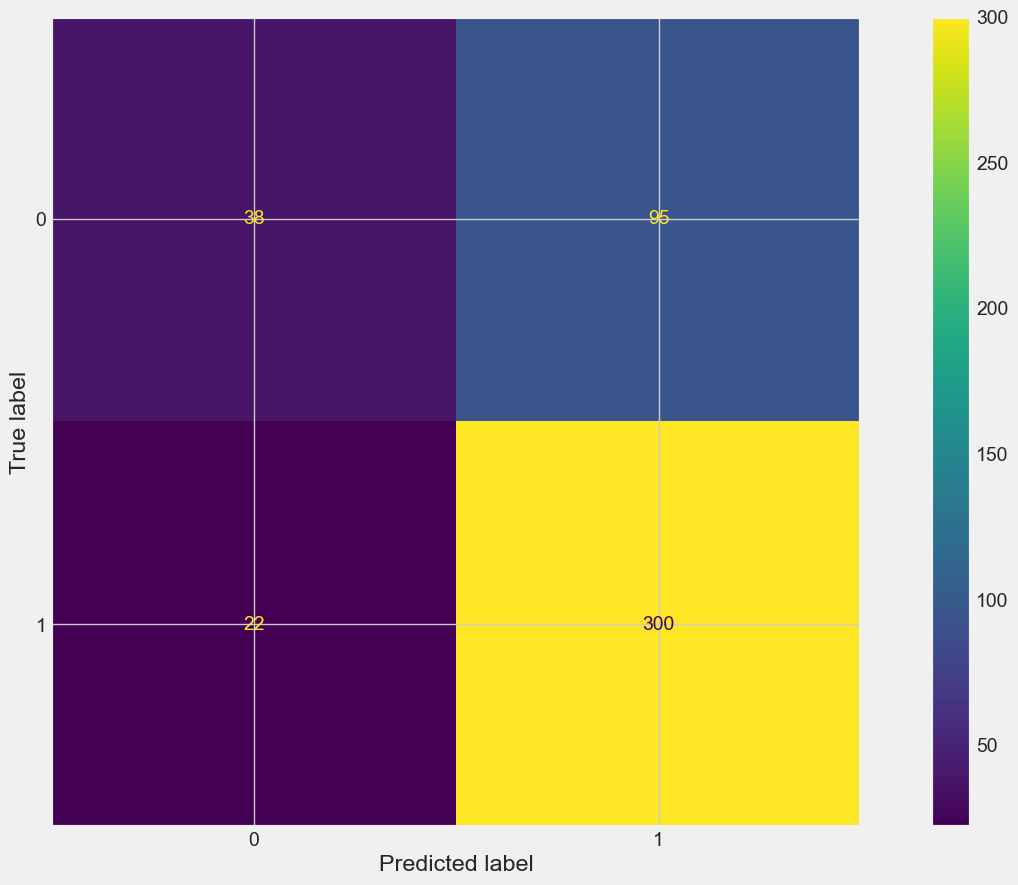

In [117]:
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

<span style="color:BLUE">Βέλτιστη Τιμή K για τον Ταξινομητή KNN μέσω Επαναληπτικής Δοκιμής

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

accuracies = []

for k in range(1, 21):

    knn = KNeighborsClassifier(n_neighbors=k)


    knn.fit(X_train, y_train)


    y_pred = knn.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)


    accuracies.append(accuracy)

# Εμφάνιση όλων των ακριβειών
for i, accuracy in enumerate(accuracies, start=1):
    print(f"Ακρίβεια για K={i}: {accuracy*100:.2f}%")

# Εύρεση της τιμής του K που δίνει την καλύτερη ακρίβεια
best_k = accuracies.index(max(accuracies)) + 1
print(f"\nΗ καλύτερη τιμή για το K είναι {best_k} με ακρίβεια {max(accuracies)*100:.2f}%")

Ακρίβεια για K=1: 83.30%
Ακρίβεια για K=2: 81.98%
Ακρίβεια για K=3: 85.49%
Ακρίβεια για K=4: 85.49%
Ακρίβεια για K=5: 85.93%
Ακρίβεια για K=6: 86.15%
Ακρίβεια για K=7: 86.81%
Ακρίβεια για K=8: 86.81%
Ακρίβεια για K=9: 88.79%
Ακρίβεια για K=10: 87.91%
Ακρίβεια για K=11: 87.69%
Ακρίβεια για K=12: 87.91%
Ακρίβεια για K=13: 87.91%
Ακρίβεια για K=14: 88.35%
Ακρίβεια για K=15: 88.35%
Ακρίβεια για K=16: 88.79%
Ακρίβεια για K=17: 88.35%
Ακρίβεια για K=18: 89.23%
Ακρίβεια για K=19: 88.79%
Ακρίβεια για K=20: 89.01%

Η καλύτερη τιμή για το K είναι 18 με ακρίβεια 89.23%


<span style="color:BLUE">Οπτικοποίηση Ακρίβειας KNN για Διάφορες Τιμές Κ

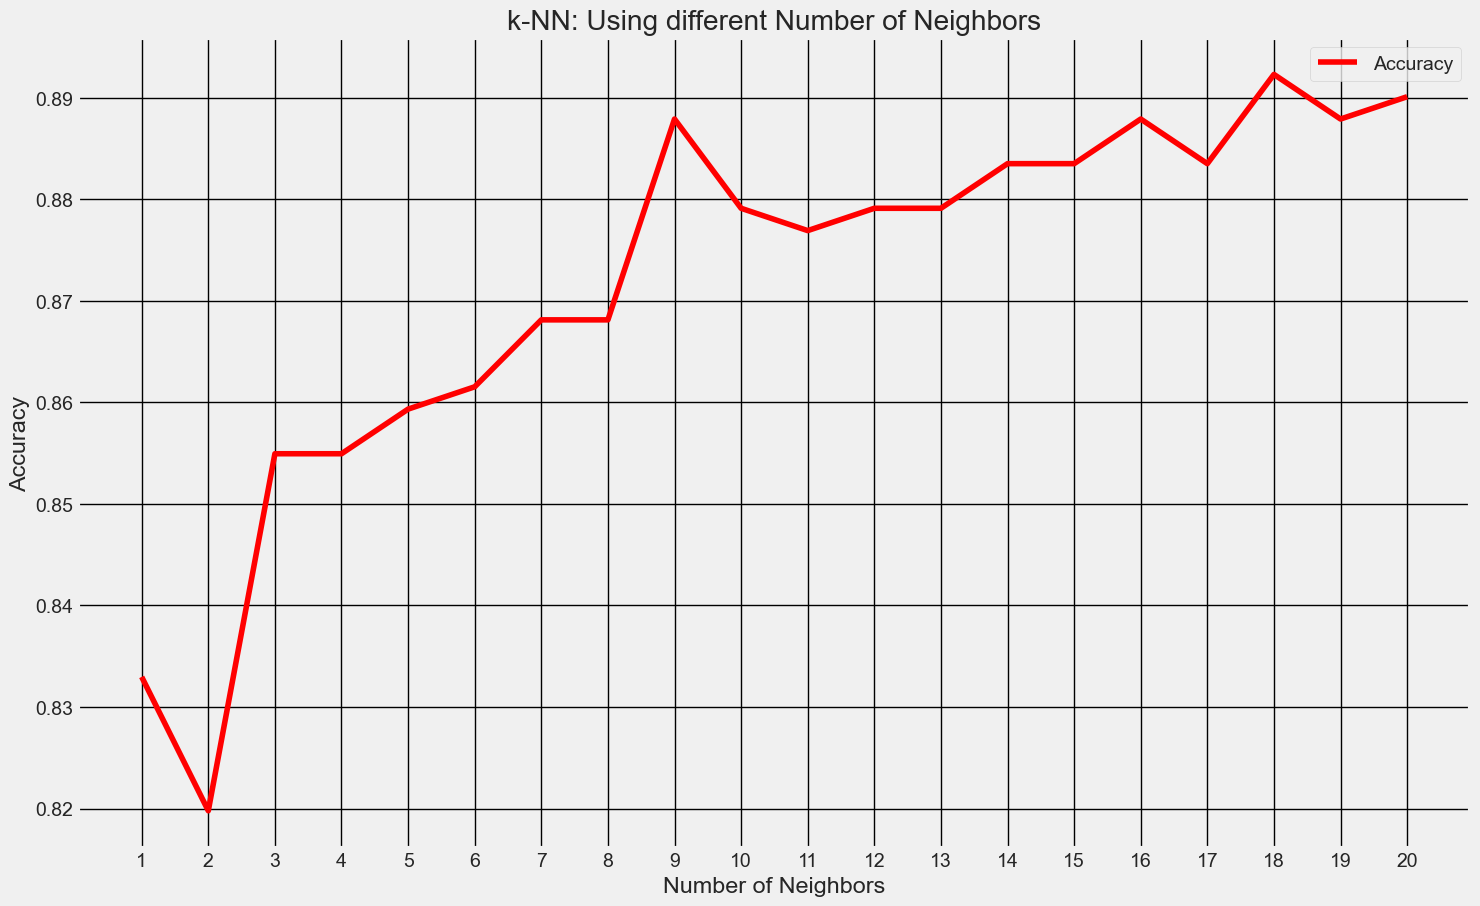

In [120]:
accuracies = []

for k in range(1, 21):
    
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    accuracies.append(accuracy)


neighbors = list(range(1, 21))  
accuracies = accuracies  
plt.title('k-NN: Using different Number of Neighbors')
plt.plot(neighbors, accuracies, label='Accuracy', color='red')
plt.xticks(neighbors)
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

plt.grid(color='black')

plt.show()

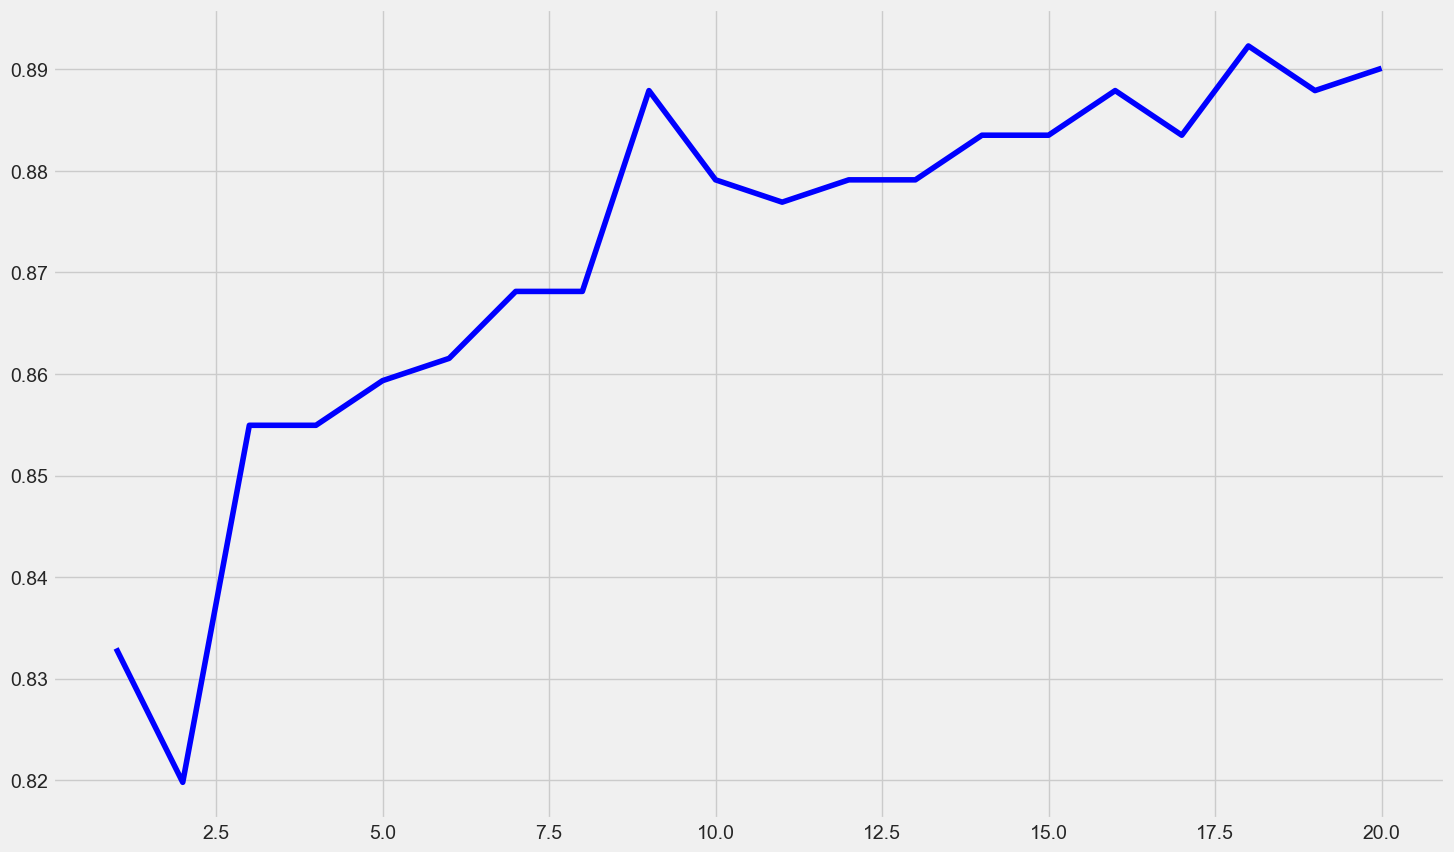

In [121]:
plt.plot(neighbors, accuracies, label='Accuracy', color='BLUE')
plt.show()

<span style="color:orange">Οπτικοποίηση Ορίων Απόφασης του Ταξινομητή KNN με Τυχαία Χαρακτηριστικά

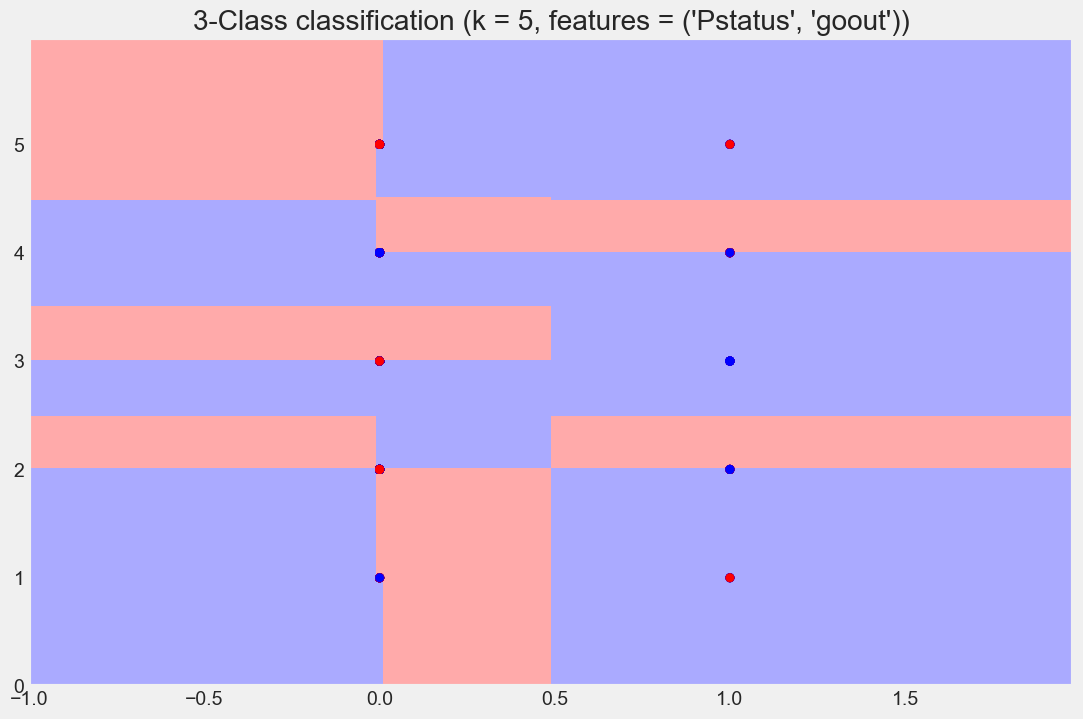

In [122]:
feature_columns = df.columns[:-1].tolist()

feature_combinations = list(combinations(feature_columns, 2))

combination = random.choice(feature_combinations)

# Επιλέξτε τα δύο χαρακτηριστικά
X = df[list(combination)].values
y = df['G3'].values

h = .02

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X, y)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(12, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"3-Class classification (k = 5, features = {combination})")

plt.show()

# <span style="color:BLUE">NBC (Naive Bayes Classifier) (SCI-KIT LEARN, TEST_SIZE=0.9)

In [123]:
df.head(10)

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    1   18        0        1        1     4     4     3     0  ...   
1       0    1   17        0        1        0     1     1     3     4  ...   
2       0    1   15        0        0        0     1     1     3     4  ...   
3       0    1   15        0        1        0     4     2     1     2  ...   
4       0    1   16        0        1        0     3     3     4     4  ...   
5       0    0   16        0        0        0     4     3     2     4  ...   
6       0    0   16        0        0        0     2     2     4     4  ...   
7       0    1   17        0        1        1     4     4     4     0  ...   
8       0    0   15        0        0        1     3     2     2     4  ...   
9       0    0   15        0        1        0     3     4     4     4  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         3      4     1     1       3         4   0  11   1  
1       5         3      3     1     1       3         2   9  11   1  
2       4         3      2     2     3       3         6  12  13   1  
3       3         2      2     1     1       5         0  14  14   1  
4       4         3      2     1     2       5         0  11  13   1  
5       5         4      2     1     2       5         6  12  12   1  
6       4         4      4     1     1       3         0  13  12   1  
7       4         1      4     1     1       1         2  10  13   1  
8       4         2      2     1     1       1         0  15  16   1  
9       5         5      1     1     1       5         0  12  12   1  

[10 rows x 33 columns]

In [124]:
X = df.iloc[:, :-1]
X.sample(5)

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
261       0    1   17        1        1        0     2     1     3     2  ...   
92        0    1   16        0        0        0     3     1     4     4  ...   
499       1    1   16        0        1        0     2     2     2     4  ...   
462       1    1   15        1        1        0     1     1     3     3  ...   
576       1    0   18        1        1        0     3     2     4     4  ...   

     romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  
261         0       2         1      1     1     1       3         2  13  13  
92          0       3         3      3     2     3       2         0  12  13  
499         1       4         2      5     1     2       5         0  17  16  
462         0       4         2      1     1     2       2         0  13  14  
576         0       2         5      5     5     5       5         8   9  10  

[5 rows x 32 columns]

In [125]:
type(X)

pandas.core.frame.DataFrame

In [126]:
y = df['G3']

y.sample(5)

19     1
334    1
229    1
224    1
189    1
Name: G3, dtype: int64

In [127]:
type(y)

pandas.core.series.Series

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

In [129]:
gnb = GaussianNB()

In [130]:
gnb.fit(X_train, y_train)

GaussianNB()

In [131]:
y_pred = gnb.predict(X_test)

In [132]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Ακρίβεια του μοντέλου: {accuracy*100:.2f}%")

Ακρίβεια του μοντέλου: 82.56%


In [133]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 585 points : 102


In [134]:
# Το ποσοστό που δεν εξηγείτε από το μοντέλο
102/585

0.17435897435897435

# <span style="color:blue">ΔΙΑΓΡΑΜΜΑΤΑ NBC 

<span style="color:blue">Confusion Matrix

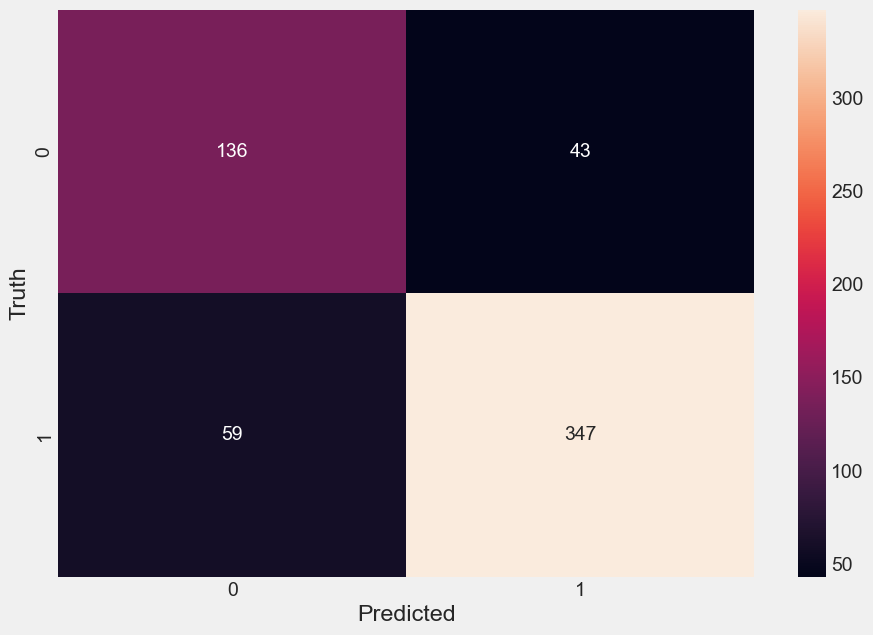

In [135]:
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

<span style="color:blue">ROC Curve (Receiver Operating Characteristic)

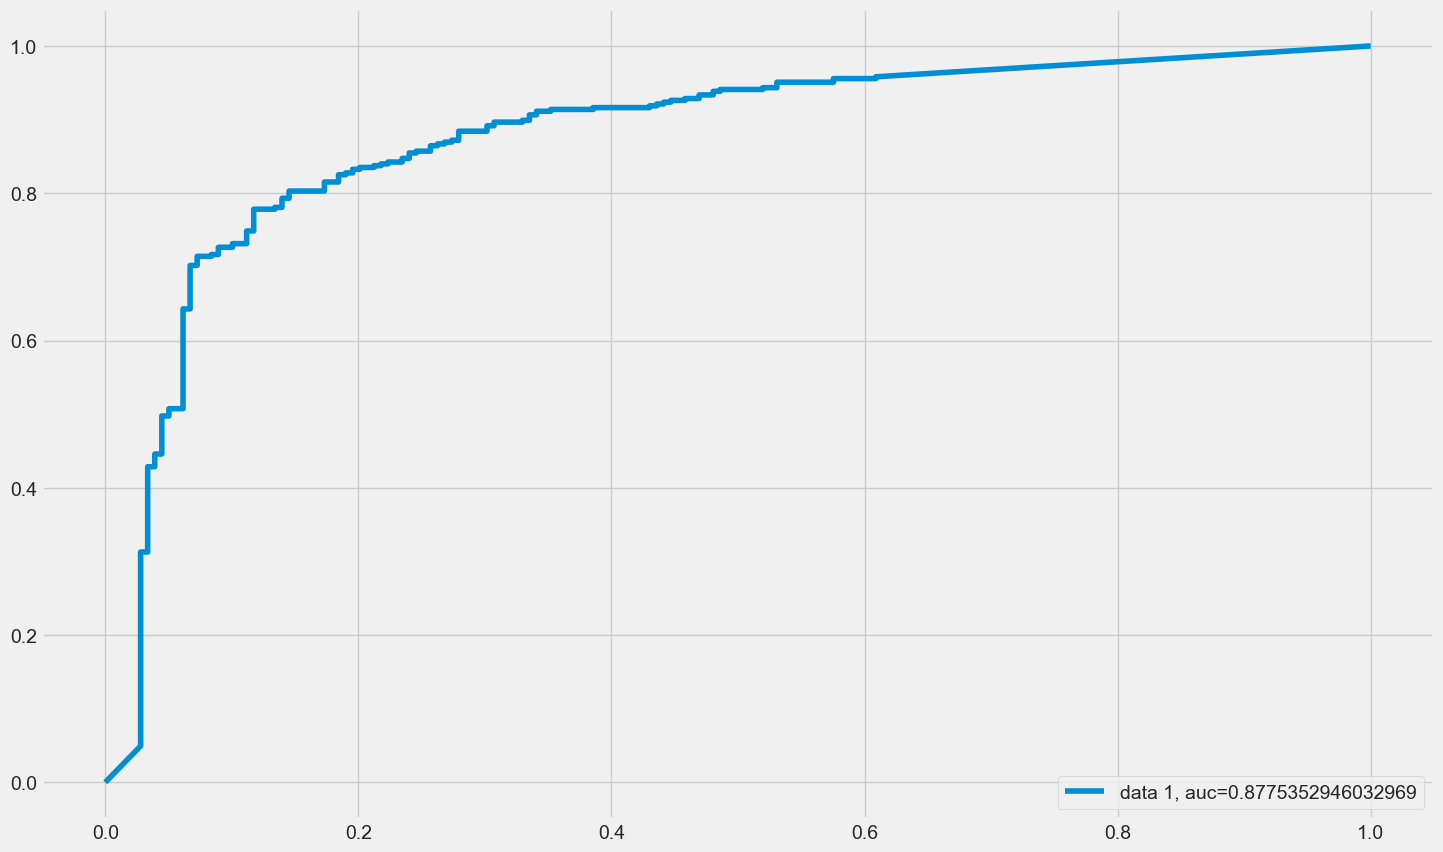

In [136]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,label="data 1, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

<span style="color:blue">Precision-Recall Curve

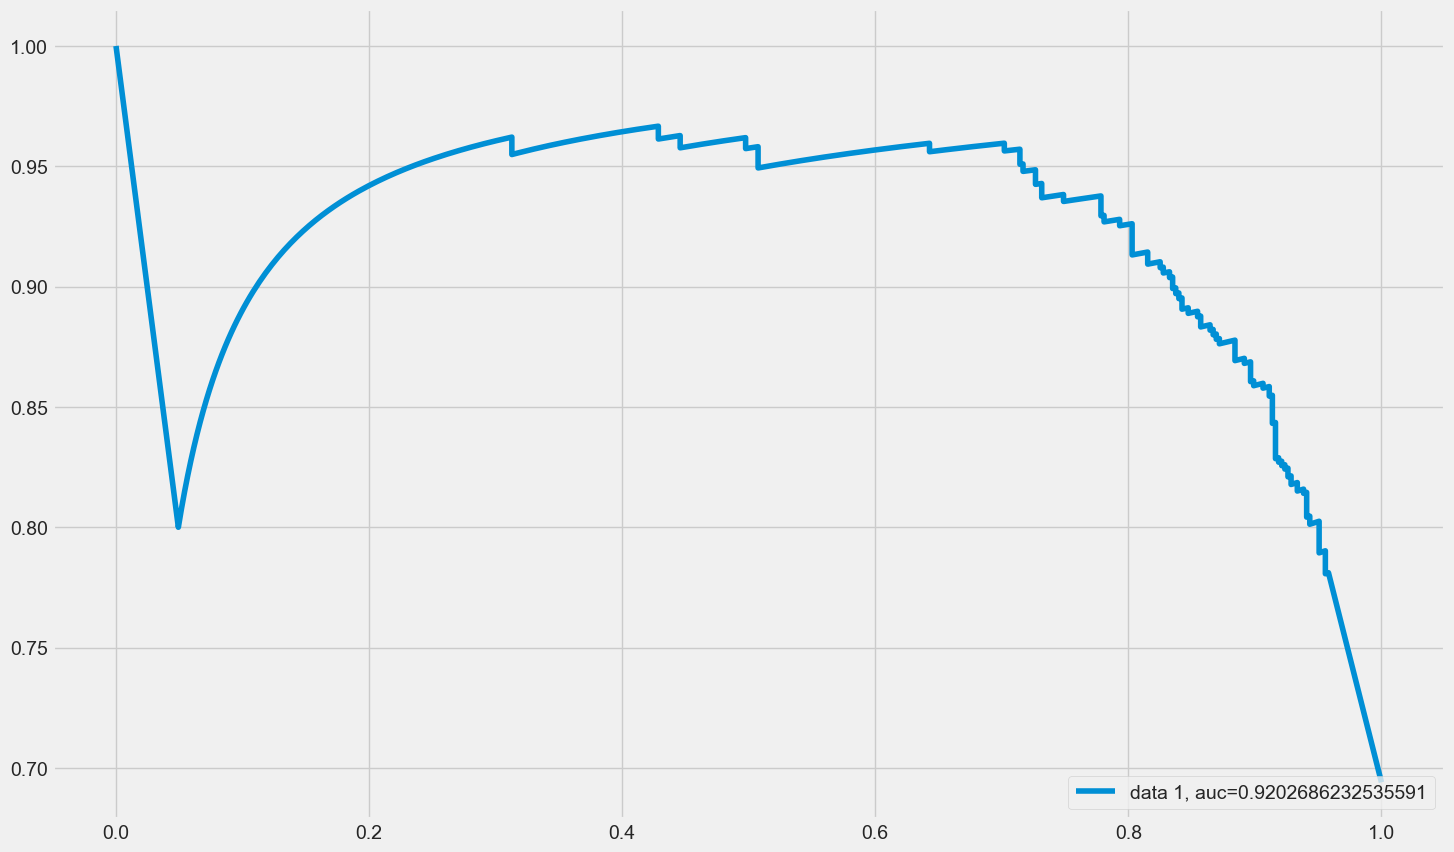

In [137]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]

precision, recall, _ = precision_recall_curve(y_test,  y_pred_proba)

pr_auc = auc(recall, precision)

plt.plot(recall, precision, label="data 1, auc="+str(pr_auc))
plt.legend(loc=4)
plt.show()

# <span style="color:blue">NBC ΓΙΑ ΤΗΝ ΠΡΟΒΛΕΨΗ (SCI-KIT LEARN, TEST_SIZE=0.7)

In [ ]:
df.head(10)

In [138]:
X = df.iloc[:, :-1]

X.sample(5)

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
441       1    0   17        0        1        0     1     1     4     4  ...   
110       0    0   15        0        0        1     4     4     0     0  ...   
447       1    0   17        1        1        0     2     1     4     4  ...   
582       1    1   19        0        0        1     1     1     3     4  ...   
58        0    0   15        0        0        0     1     2     4     3  ...   

     romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  
441         0       4         4      3     2     4       5         4   8   9  
110         0       5         5      3     1     1       4         4  13  14  
447         1       5         5      5     5     5       3         8   8  10  
582         0       1         4      4     1     1       5         0   6   8  
58          0       4         3      2     1     1       5         0  14  13  

[5 rows x 32 columns]

In [139]:
type(X)

pandas.core.frame.DataFrame

In [141]:
y = df['G3']

y.sample(5)

410    1
550    1
551    1
428    0
336    1
Name: G3, dtype: int64

In [142]:
type(y)

pandas.core.series.Series

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [144]:
gnb = GaussianNB()

In [145]:
gnb.fit(X_train, y_train)

GaussianNB()

In [146]:
y_pred = gnb.predict(X_test)

In [147]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Ακρίβεια του μοντέλου: {accuracy*100:.2f}%")

Ακρίβεια του μοντέλου: 87.25%


In [148]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 455 points : 58


In [150]:
58/455

0.12747252747252746

# <span style="color:BLUE">ΔΙΑΓΡΑΜΜΑΤΑ NBC 

<span style="color:BLUE">Confusion Matrix

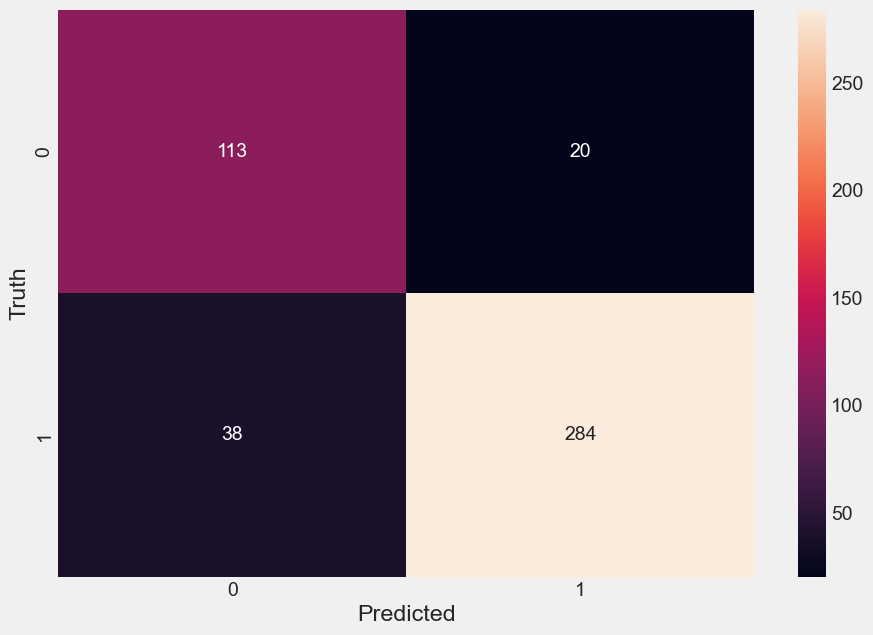

In [151]:
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

<span style="color:BLUE">ROC Curve (Receiver Operating Characteristic)

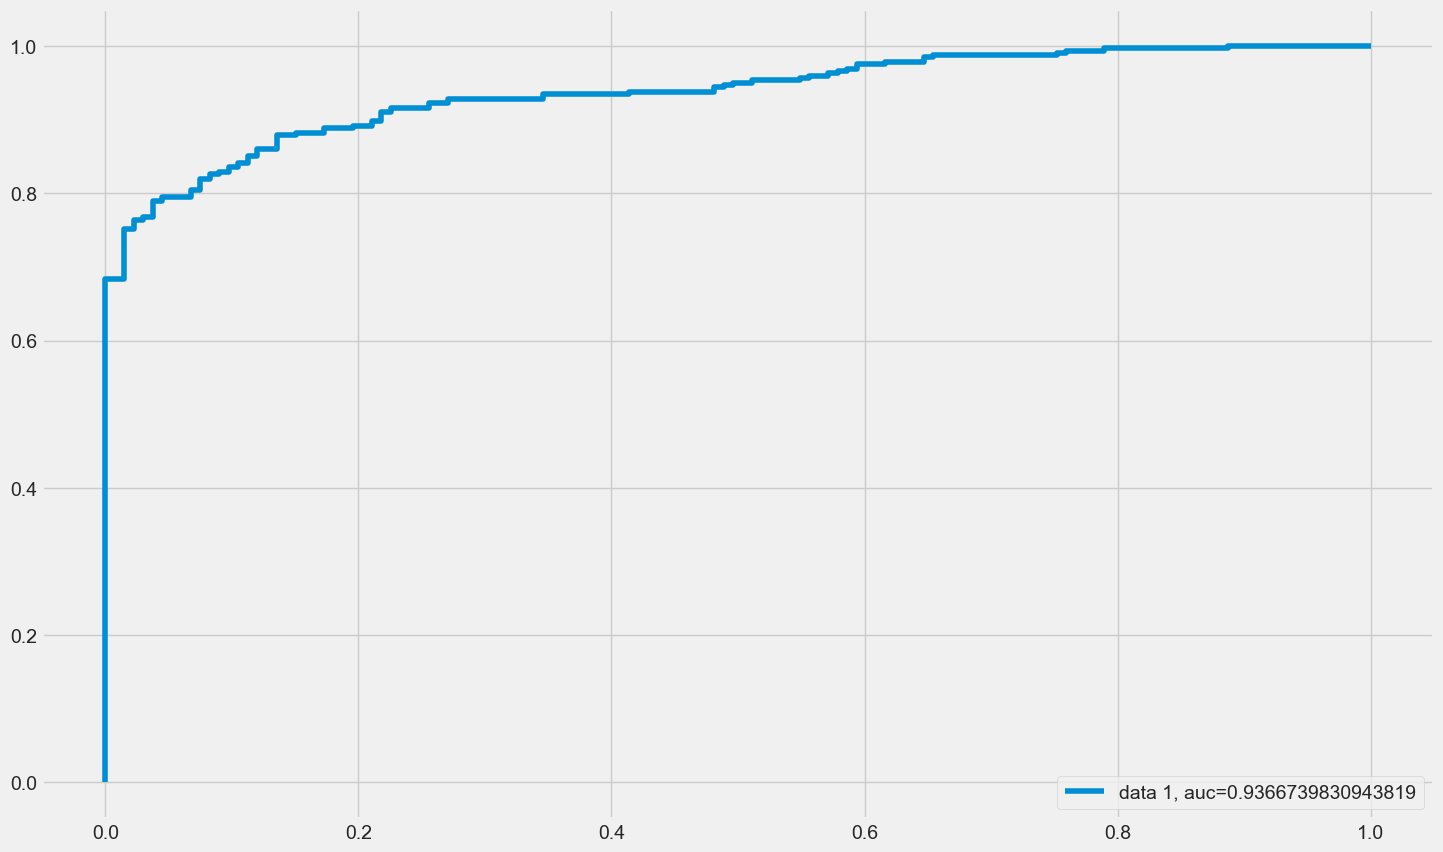

In [152]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,label="data 1, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

<span style="color:BLUE">Precision-Recall Curve

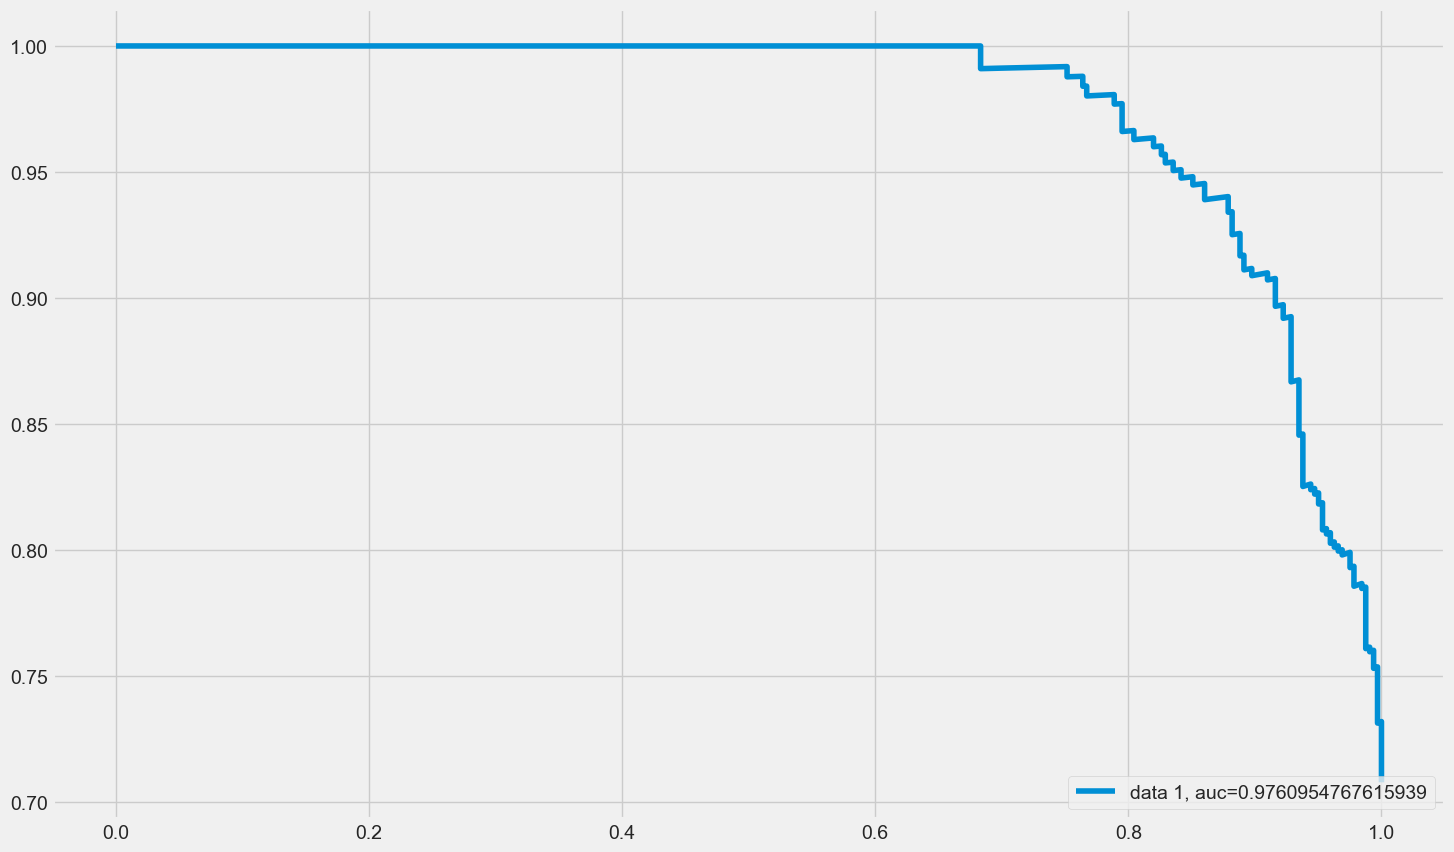

In [153]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]

precision, recall, _ = precision_recall_curve(y_test,  y_pred_proba)

pr_auc = auc(recall, precision)

plt.plot(recall, precision, label="data 1, auc="+str(pr_auc))
plt.legend(loc=4)
plt.show()